In [2]:
pwd

'/home/samuel'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm
from datetime import datetime
import seaborn as sns
pd.set_option('display.max.columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("~/Documents/Books/DataScience/Datasets/stocks/AMZN_2006-01-01_to_2018-01-01.csv" , parse_dates=['Date'])
data.index = data['Date']
data.head()

Date   Open   High    Low  Close   Volume  Name
Date                                                            
2006-01-03 2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
2006-01-04 2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2006-01-05 2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
2006-01-06 2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
2006-01-09 2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

### Exploratory Data Analysis (EDA) & Feature Engineering

In [5]:
data.Name.unique()

array(['AMZN'], dtype=object)

In [6]:
data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

In [7]:
data.drop('Name', axis=1, inplace=True)
Train = data.copy()
data.Timestamp = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.index = data.Timestamp
data.head()

Date   Open   High    Low  Close   Volume
Date                                                      
2006-01-03 2006-01-03  47.47  47.85  46.25  47.58  7582127
2006-01-04 2006-01-04  47.48  47.73  46.69  47.25  7440914
2006-01-05 2006-01-05  47.16  48.20  47.11  47.65  5417258
2006-01-06 2006-01-06  47.97  48.58  47.32  47.87  6154285
2006-01-09 2006-01-09  46.55  47.10  46.40  47.08  8945056

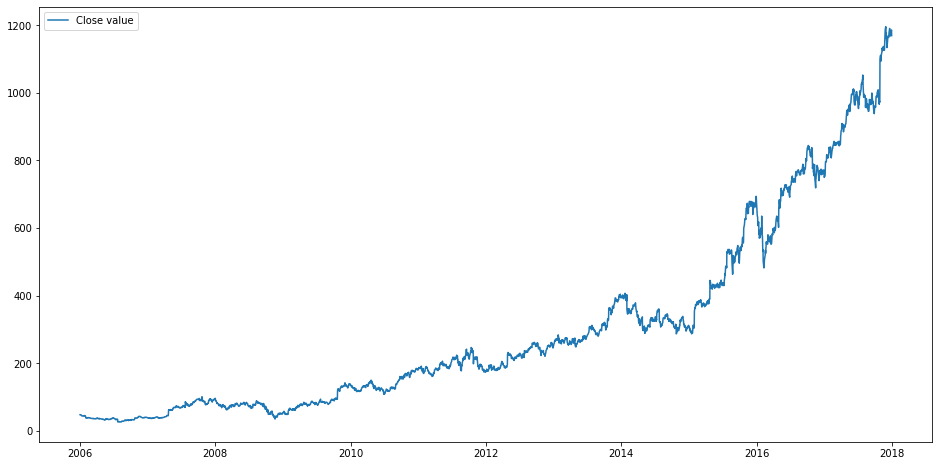

In [8]:
ct = data['Close']
plt.figure(figsize=(16,8))
plt.plot(ct, label='Close value')
plt.legend(loc='best')
plt.show()

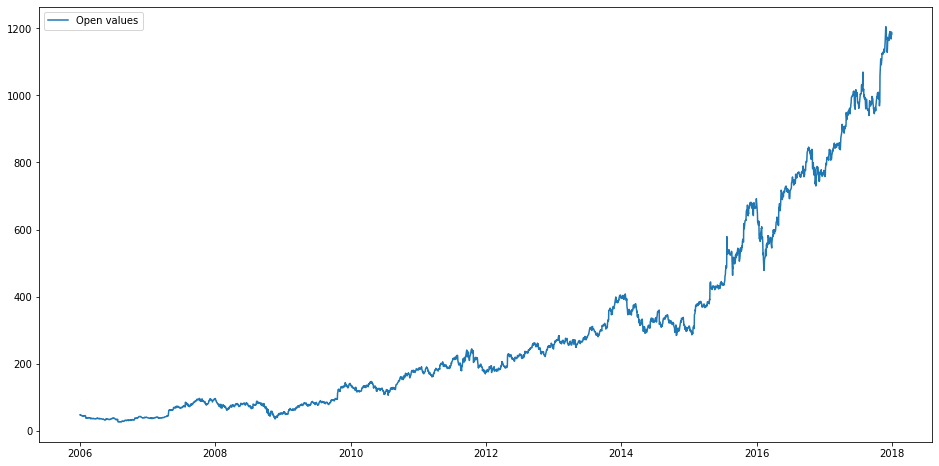

In [9]:
do = data['Open']
plt.figure(figsize=(16,8))
plt.plot(do, label='Open values')
plt.legend(loc='best')
plt.show()

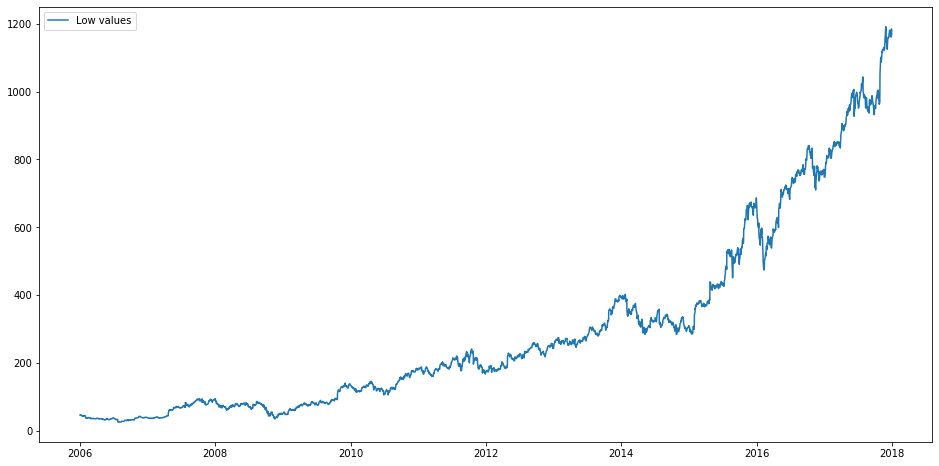

In [10]:
dl = data['Low']
plt.figure(figsize=(16,8))
plt.plot(dl, label='Low values')
plt.legend(loc='best')
plt.show()


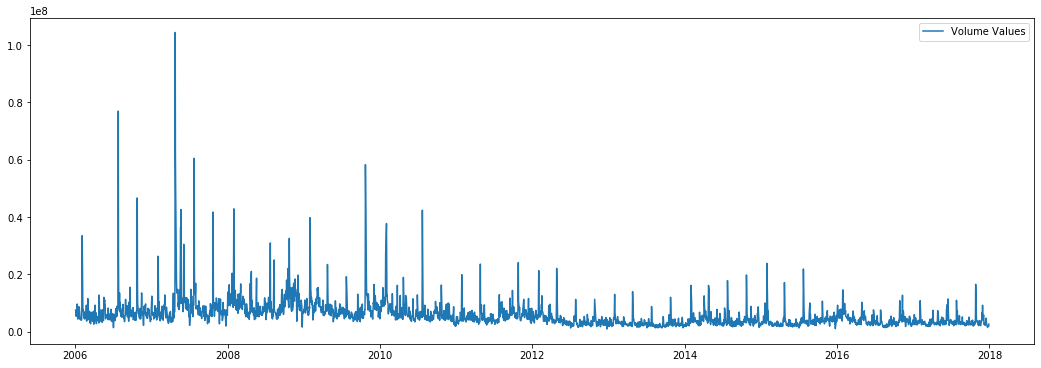

In [11]:
dv = data['Volume']
plt.figure(figsize=(18,6))
plt.plot(dv, label='Volume Values')
plt.legend(loc='best')
plt.show()

In [12]:
data.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [13]:
data.index = data.Timestamp

In [14]:
data['Day'] = data.Date.dt.day
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year
data['Dayofweek'] = data.Date.dt.dayofweek
data.head()

Date   Open   High    Low  Close   Volume  Day  Month  Year  \
Date                                                                           
2006-01-03 2006-01-03  47.47  47.85  46.25  47.58  7582127    3      1  2006   
2006-01-04 2006-01-04  47.48  47.73  46.69  47.25  7440914    4      1  2006   
2006-01-05 2006-01-05  47.16  48.20  47.11  47.65  5417258    5      1  2006   
2006-01-06 2006-01-06  47.97  48.58  47.32  47.87  6154285    6      1  2006   
2006-01-09 2006-01-09  46.55  47.10  46.40  47.08  8945056    9      1  2006   

            Dayofweek  
Date                   
2006-01-03          1  
2006-01-04          2  
2006-01-05          3  
2006-01-06          4  
2006-01-09          0

In [15]:
def applyer(row):
    if row.dayofweek == 0:
        return 1
    else:
        return 0
def applyer1(row):
    if row.dayofweek == 4:
        return 1
    else:
        return 0
data['Week_Start'] = data['Date'].apply(applyer)
data['Week_End'] = data['Date'].apply(applyer1)
data.head(50)

Date   Open   High    Low  Close    Volume  Day  Month  Year  \
Date                                                                            
2006-01-03 2006-01-03  47.47  47.85  46.25  47.58   7582127    3      1  2006   
2006-01-04 2006-01-04  47.48  47.73  46.69  47.25   7440914    4      1  2006   
2006-01-05 2006-01-05  47.16  48.20  47.11  47.65   5417258    5      1  2006   
2006-01-06 2006-01-06  47.97  48.58  47.32  47.87   6154285    6      1  2006   
2006-01-09 2006-01-09  46.55  47.10  46.40  47.08   8945056    9      1  2006   
2006-01-10 2006-01-10  46.41  46.75  45.36  45.65   9686957   10      1  2006   
2006-01-11 2006-01-11  45.65  45.70  44.26  44.93   8497383   11      1  2006   
2006-01-12 2006-01-12  44.79  45.09  44.09  44.36   5818301   12      1  2006   
2006-01-13 2006-01-13  44.48  44.85  44.00  44.40   4432237   13      1  2006   
2006-01-17 2006-01-17  43.95  44.32  43.66  44.00   5635225   17      1  2006   
2006-01-18 2006-01-18  43.19  44.59  43.10  44.32   8744464   18      1  2006   
2006-01-19 2006-01-19  44.50  45.24  44.30  44.45   5156990   19      1  2006   
2006-01-20 2006-01-20  44.23  44.36  43.20  43.92   8344332   20      1  2006   
2006-01-23 2006-01-23  44.18  44.75  43.50  43.73   5752811   23      1  2006   
2006-01-24 2006-01-24  43.66  44.43  43.42  44.02   4342401   24      1  2006   
2006-01-25 2006-01-25  44.05  44.47  43.34  43.60   4287595   25      1  2006   
2006-01-26 2006-01-26  43.95  44.78  43.79  44.68   4890969   26      1  2006   
2006-01-27 2006-01-27  44.55  45.22  44.53  45.22   4174089   27      1  2006   
2006-01-30 2006-01-30  45.41  45.97  44.74  44.96   4099826   30      1  2006   
2006-01-31 2006-01-31  44.76  45.21  44.25  44.82   4056024   31      1  2006   
2006-02-01 2006-02-01  43.92  44.69  43.50  43.98   7501585    1      2  2006   
2006-02-02 2006-02-02  43.84  44.04  39.80  42.74  23739052    2      2  2006   
2006-02-03 2006-02-03  37.70  38.50  37.37  38.33  33532893    3      2  2006   
2006-02-06 2006-02-06  38.34  38.34  37.77  37.95   8503296    6      2  2006   
2006-02-07 2006-02-07  38.08  38.20  37.20  37.52   7404668    7      2  2006   
2006-02-08 2006-02-08  37.70  38.39  37.11  38.17   7544646    8      2  2006   
2006-02-09 2006-02-09  38.61  39.00  37.93  37.99   6932766    9      2  2006   
2006-02-10 2006-02-10  37.98  38.52  37.37  38.52   5011791   10      2  2006   
2006-02-13 2006-02-13  38.25  38.42  37.53  37.86   4750381   13      2  2006   
2006-02-14 2006-02-14  38.04  38.49  37.38  38.25   4514262   14      2  2006   
2006-02-15 2006-02-15  38.24  39.28  38.10  39.26   6902712   15      2  2006   
2006-02-16 2006-02-16  39.37  40.00  38.83  39.15   5685345   16      2  2006   
2006-02-17 2006-02-17  38.93  39.38  38.91  39.19   4581764   17      2  2006   
2006-02-21 2006-02-21  39.01  39.11  38.26  38.29   5056134   21      2  2006   
2006-02-22 2006-02-22  38.31  39.10  37.71  38.72   7357544   22      2  2006   
2006-02-23 2006-02-23  38.62  38.75  37.87  37.90   9287561   23      2  2006   
2006-02-24 2006-02-24  38.25  38.41  37.86  38.35   3720719   24      2  2006   
2006-02-27 2006-02-27  38.40  38.78  37.93  38.01   4449169   27      2  2006   
2006-02-28 2006-02-28  37.79  38.09  37.05  37.44   9151537   28      2  2006   
2006-03-01 2006-03-01  37.45  37.69  36.85  37.12   6982125    1      3  2006   
2006-03-02 2006-03-02  35.64  37.00  35.37  36.88  11584724    2      3  2006   
2006-03-03 2006-03-03  36.89  37.83  36.67  37.21   6044967    3      3  2006   
2006-03-06 2006-03-06  37.32  37.58  36.77  36.86   4258307    6      3  2006   
2006-03-07 2006-03-07  36.71  37.42  36.70  36.93   4722841    7      3  2006   
2006-03-08 2006-03-08  36.72  37.47  36.61  36.81   6237141    8      3  2006   
2006-03-09 2006-03-09  36.80  36.96  35.90  36.12   7200162    9      3  2006   
2006-03-10 2006-03-10  36.24  36.50  35.74  36.22   4973080   10      3  2006   
2006-03-13 2006-03-13  36.31  36.63  35.97  36.1

In [16]:
data.drop('Date', axis=1, inplace=True)
data.head()

Open   High    Low  Close   Volume  Day  Month  Year  Dayofweek  \
Date                                                                           
2006-01-03  47.47  47.85  46.25  47.58  7582127    3      1  2006          1   
2006-01-04  47.48  47.73  46.69  47.25  7440914    4      1  2006          2   
2006-01-05  47.16  48.20  47.11  47.65  5417258    5      1  2006          3   
2006-01-06  47.97  48.58  47.32  47.87  6154285    6      1  2006          4   
2006-01-09  46.55  47.10  46.40  47.08  8945056    9      1  2006          0   

            Week_Start  Week_End  
Date                              
2006-01-03           0         0  
2006-01-04           0         0  
2006-01-05           0         0  
2006-01-06           0         1  
2006-01-09           1         0

In [17]:
data.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Day             int64
Month           int64
Year            int64
Dayofweek       int64
Week_Start      int64
Week_End        int64
dtype: object

Week_Start
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Close, dtype: object

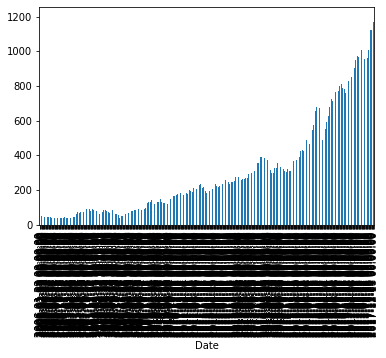

In [18]:
wv = data.groupby('Week_Start')
wv['Close'].plot.bar()

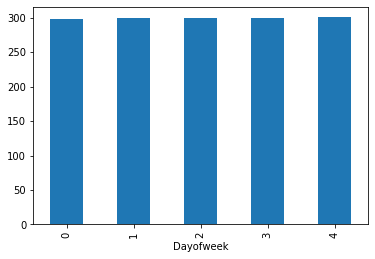

In [19]:
wd = data.groupby('Dayofweek')
wd['Close'].mean().plot.bar()

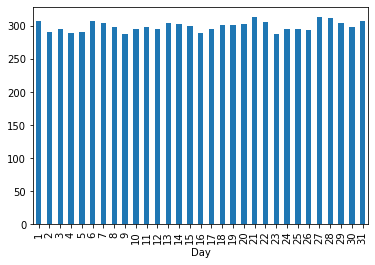

In [20]:
dd = data.groupby('Day')
dd['Close'].mean().plot.bar()

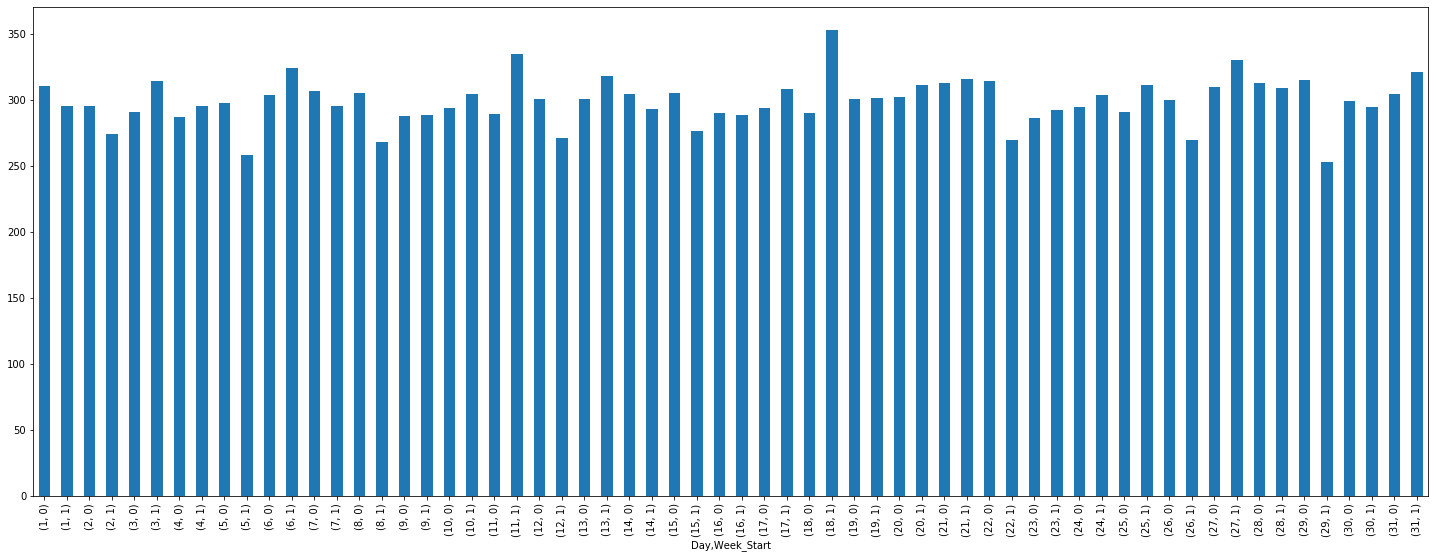

In [21]:
wy = data.groupby(['Day','Week_Start'])
wy['Close'].mean().plot.bar(figsize=(25,9))

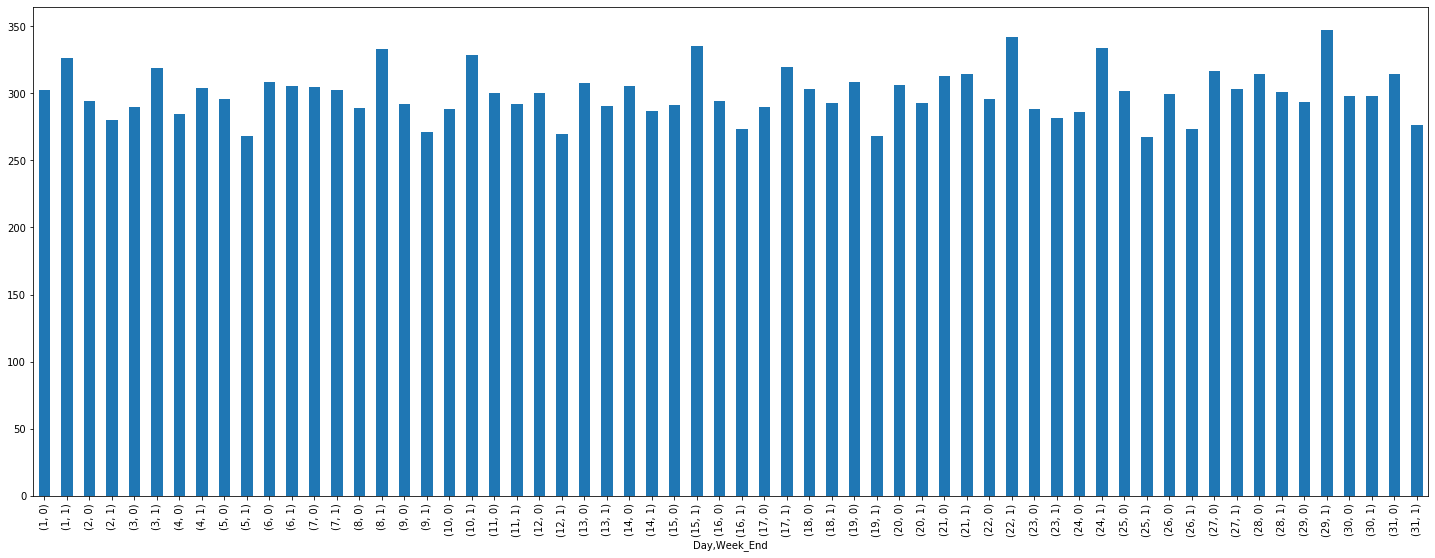

In [22]:
wc = data.groupby(['Day', 'Week_End'])
wc['Close'].mean().plot.bar(figsize=(25,9))

In [23]:
Train.drop('Volume', axis=1, inplace=True)
Train.head()

Date   Open   High    Low  Close
Date                                             
2006-01-03 2006-01-03  47.47  47.85  46.25  47.58
2006-01-04 2006-01-04  47.48  47.73  46.69  47.25
2006-01-05 2006-01-05  47.16  48.20  47.11  47.65
2006-01-06 2006-01-06  47.97  48.58  47.32  47.87
2006-01-09 2006-01-09  46.55  47.10  46.40  47.08

In [24]:
len(data)

3019

In [25]:
test = pd.DataFrame({'ID': range(0, 59)})
test['Date'] = pd.date_range(start='1/1/2018', periods=len(test), freq='D')
test['Dayofweek'] = test.Date.dt.dayofweek
test.head(60)

ID       Date  Dayofweek
0    0 2018-01-01          0
1    1 2018-01-02          1
2    2 2018-01-03          2
3    3 2018-01-04          3
4    4 2018-01-05          4
5    5 2018-01-06          5
6    6 2018-01-07          6
7    7 2018-01-08          0
8    8 2018-01-09          1
9    9 2018-01-10          2
10  10 2018-01-11          3
11  11 2018-01-12          4
12  12 2018-01-13          5
13  13 2018-01-14          6
14  14 2018-01-15          0
15  15 2018-01-16          1
16  16 2018-01-17          2
17  17 2018-01-18          3
18  18 2018-01-19          4
19  19 2018-01-20          5
20  20 2018-01-21          6
21  21 2018-01-22          0
22  22 2018-01-23          1
23  23 2018-01-24          2
24  24 2018-01-25          3
25  25 2018-01-26          4
26  26 2018-01-27          5
27  27 2018-01-28          6
28  28 2018-01-29          0
29  29 2018-01-30          1
30  30 2018-01-31          2
31  31 2018-02-01          3
32  32 2018-02-02          4
33  33 2018-02-03          5
34  34 2018-02-04          6
35  35 2018-02-05          0
36  36 2018-02-06          1
37  37 2018-02-07          2
38  38 2018-02-08          3
39  39 2018-02-09          4
40  40 2018-02-10          5
41  41 2018-02-11          6
42  42 2018-02-12          0
43  43 2018-02-13          1
44  44 2018-02-14          2
45  45 2018-02-15          3
46  46 2018-02-16          4
47  47 2018-02-17          5
48  48 2018-02-18          6
49  49 2018-02-19          0
50  50 2018-02-20          1
51  51 2018-02-21          2
52  52 2018-02-22          3
53  53 2018-02-23          4
54  54 2018-02-24          5
55  55 2018-02-25          6
56  56 2018-02-26          0
57  57 2018-02-27          1
58  58 2018-02-28          2

In [26]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
test['weekend'] = test['Date'].apply(applyer)
test.head(10)

ID       Date  Dayofweek  weekend
0   0 2018-01-01          0        0
1   1 2018-01-02          1        0
2   2 2018-01-03          2        0
3   3 2018-01-04          3        0
4   4 2018-01-05          4        0
5   5 2018-01-06          5        1
6   6 2018-01-07          6        1
7   7 2018-01-08          0        0
8   8 2018-01-09          1        0
9   9 2018-01-10          2        0

In [27]:
test = test[test.weekend != 1]
test.drop(['weekend','Dayofweek'], axis=1, inplace=True)
test.head()

ID       Date
0   0 2018-01-01
1   1 2018-01-02
2   2 2018-01-03
3   3 2018-01-04
4   4 2018-01-05

In [28]:
len(test)

43

In [29]:
data.tail()

Open     High      Low    Close   Volume  Day  Month  Year  \
Date                                                                        
2017-12-22  1172.08  1174.62  1167.83  1168.36  1585054   22     12  2017   
2017-12-26  1168.36  1178.32  1160.55  1176.76  2005187   26     12  2017   
2017-12-27  1179.91  1187.29  1175.61  1182.26  1867208   27     12  2017   
2017-12-28  1189.00  1190.10  1184.38  1186.10  1841676   28     12  2017   
2017-12-29  1182.35  1184.00  1167.50  1169.47  2688391   29     12  2017   

            Dayofweek  Week_Start  Week_End  
Date                                         
2017-12-22          4           0         1  
2017-12-26          1           0         0  
2017-12-27          2           0         0  
2017-12-28          3           0         0  
2017-12-29          4           0         1

In [30]:
Train = data[:int(0.8*(len(data)))]
Valid = data[int(0.8*(len(data))):]
data.shape, Train.shape, Valid.shape, test.shape

((3019, 11), (2415, 11), (604, 11), (43, 2))

<function matplotlib.pyplot.show(*args, **kw)>

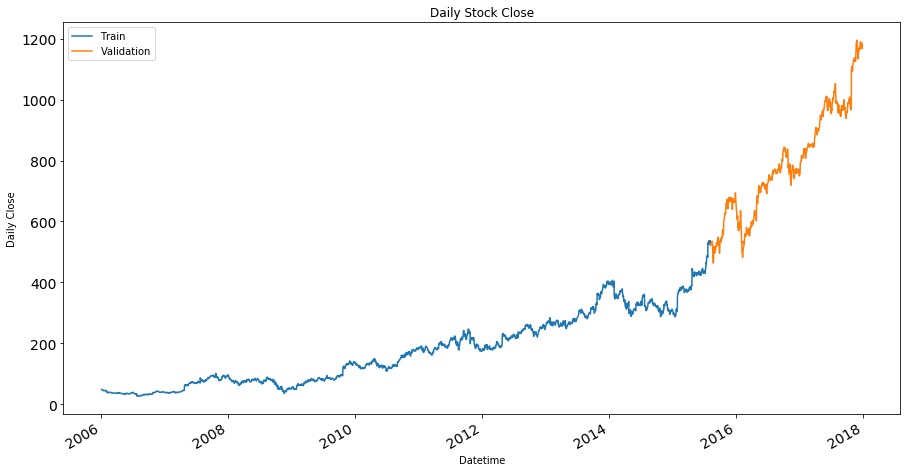

In [31]:
Train.Close.plot(figsize=(15,8), title= 'Daily Stock Close', fontsize=14, label='Train')
Valid.Close.plot(figsize=(15,8), title='Daily Stock Close', fontsize=14, label='Validation')
plt.xlabel('Datetime')
plt.ylabel('Daily Close')
plt.legend(loc='best')
plt.show

In [32]:
data.Close.mean(), data.Close.median()

(299.3762305399136, 205.44)

In [33]:
Train.head()

Open   High    Low  Close   Volume  Day  Month  Year  Dayofweek  \
Date                                                                           
2006-01-03  47.47  47.85  46.25  47.58  7582127    3      1  2006          1   
2006-01-04  47.48  47.73  46.69  47.25  7440914    4      1  2006          2   
2006-01-05  47.16  48.20  47.11  47.65  5417258    5      1  2006          3   
2006-01-06  47.97  48.58  47.32  47.87  6154285    6      1  2006          4   
2006-01-09  46.55  47.10  46.40  47.08  8945056    9      1  2006          0   

            Week_Start  Week_End  
Date                              
2006-01-03           0         0  
2006-01-04           0         0  
2006-01-05           0         0  
2006-01-06           0         1  
2006-01-09           1         0

### Time Series Forcasting
>**Using Time Series Models**
- Moving Average
- Exponential Smoothing
- Double Exponential Smoothing or Holt Linear Model
- Triple Exponential Smoothing or Holt Winter Model
- ARIMA
- SARIMA
- Prophet

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.tsa as smt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
import statsmodels.api as sm

### Moving Average

In [35]:
def moving_average(sereis, n):
    """ Calculaating average of last n observation
    """
    return np.average(series[-n:])

In [36]:
def moving_avg(series, train, window):
    y_avg = series.copy()
    y_avg['moving_avg_forcast'] = train['Close'].rolling(window=window).mean().iloc[-2]
    
    plt.figure(figsize=(20,10))
    plt.plot(train['Close'], label='Train')
    plt.plot(series['Close'], label='Validation')
    plt.plot(y_avg['moving_avg_forcast'], label='Moving Average Forcast using ' + str(window) + ' observations')
    plt.legend(loc='best')
    plt.show()

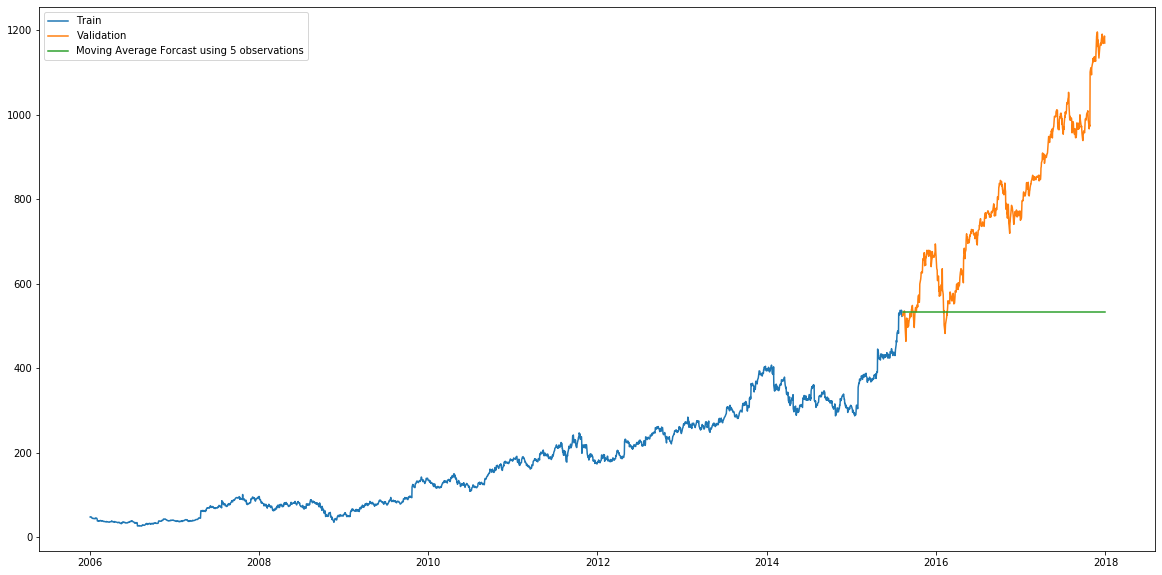

In [37]:
moving_avg(Valid, Train, 5)

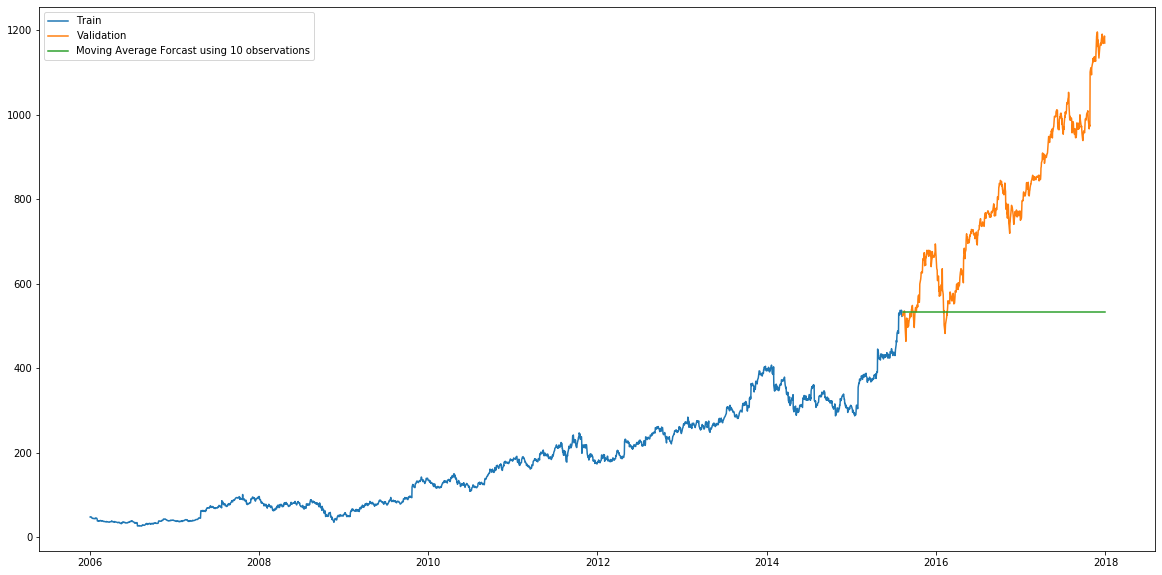

In [38]:
moving_avg(Valid, Train, 10)

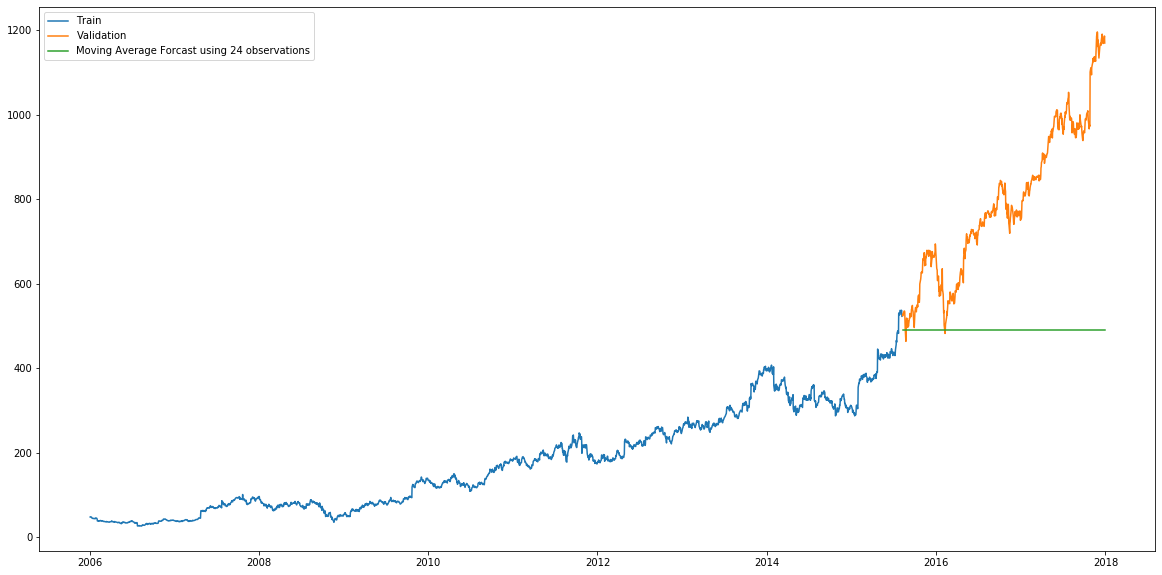

In [39]:
moving_avg(Valid, Train, 24)

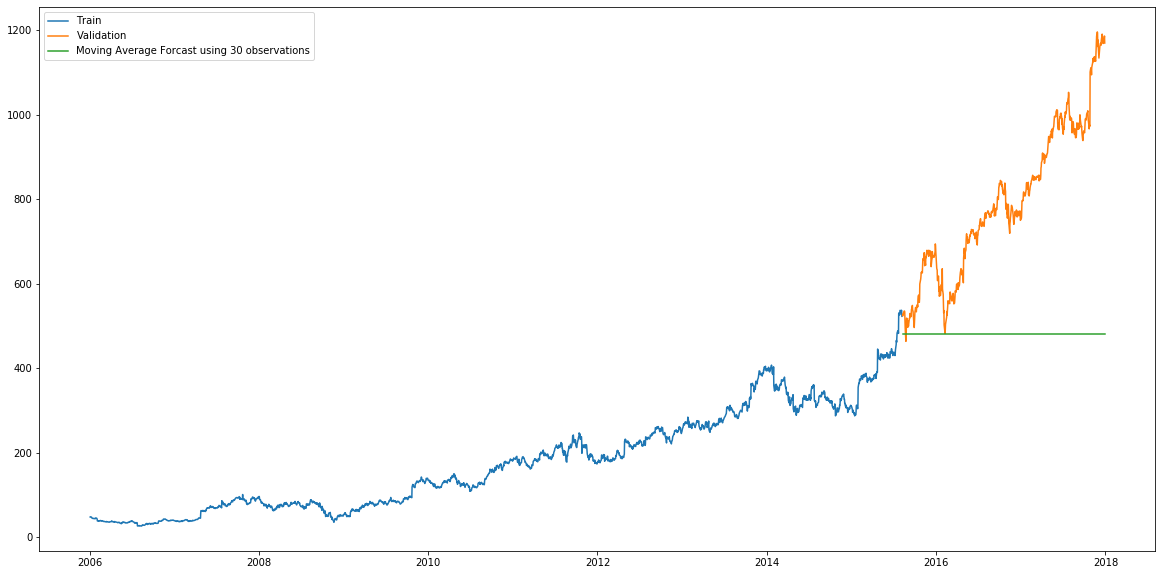

In [40]:
moving_avg(Valid, Train, 30)

In [41]:
y_avg = Valid.copy()
y_avg['moving_avg_forecast'] = Train['Close'].rolling(5).mean().iloc[-2]
pred = np.sqrt(mean_squared_error(Valid.Close, y_avg.moving_avg_forecast))
pred

315.2086649219645

In [42]:
y_avg.head()

Open    High     Low   Close   Volume  Day  Month  Year  \
Date                                                                    
2015-08-10  528.52  532.28  523.00  524.00  2615926   10      8  2015   
2015-08-11  523.65  528.98  522.00  527.46  2676600   11      8  2015   
2015-08-12  523.75  527.50  513.06  525.91  4014684   12      8  2015   
2015-08-13  527.37  534.66  525.48  529.66  2895238   13      8  2015   
2015-08-14  528.25  534.11  528.25  531.52  1994799   14      8  2015   

            Dayofweek  Week_Start  Week_End  moving_avg_forecast  
Date                                                              
2015-08-10          0           1         0               533.91  
2015-08-11          1           0         0               533.91  
2015-08-12          2           0         0               533.91  
2015-08-13          3           0         0               533.91  
2015-08-14          4           0         1               533.91

In [43]:
moving_avg = pd.DataFrame({'Actual':Valid.Close,
                           'Predicted':y_avg.moving_avg_forecast})
moving_avg.head()

Actual  Predicted
Date                         
2015-08-10  524.00     533.91
2015-08-11  527.46     533.91
2015-08-12  525.91     533.91
2015-08-13  529.66     533.91
2015-08-14  531.52     533.91

### Simple Exponential Smoothing

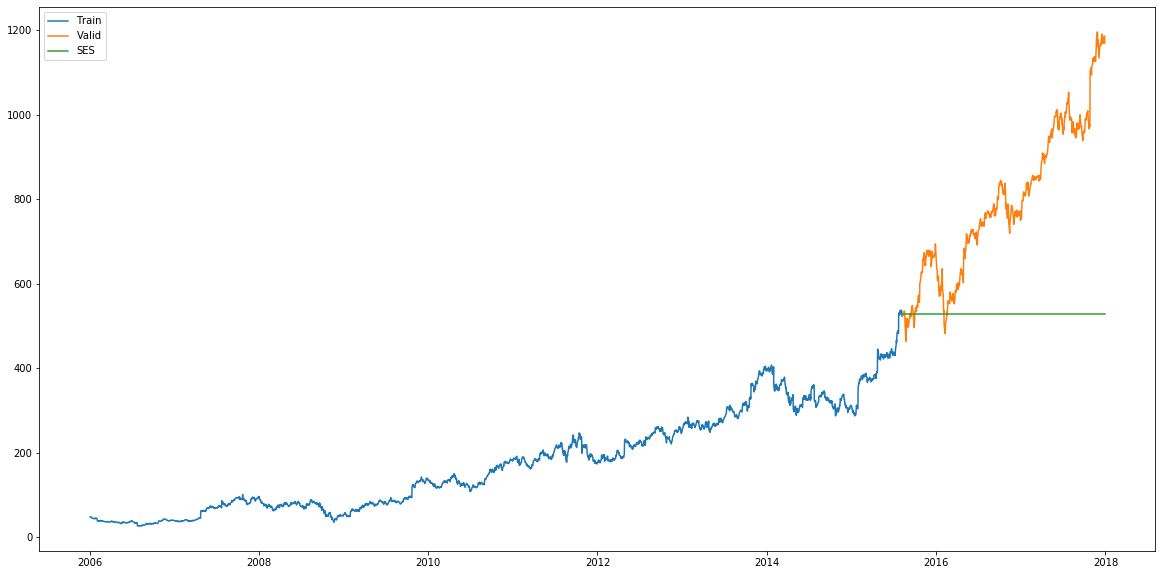

In [44]:
y_sim = Valid.copy()
fit_sim = SimpleExpSmoothing(np.asarray(Train['Close'])).fit(smoothing_level=.3, optimized = False)
y_sim['SES'] = fit_sim.forecast(len(Valid))
  
plt.figure(figsize=(20,10))
plt.plot(Train['Close'], label='Train')
plt.plot(Valid['Close'], label='Valid')
plt.plot(y_sim['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [45]:
rmse1 = np.sqrt(mean_squared_error(Valid.Close, y_sim.SES))
rmse1

319.4477419771709

In [46]:
SES = pd.DataFrame({'Actual': Valid.Close,
                    'Predicted': y_sim.SES})
SES.head(10)

Actual   Predicted
Date                          
2015-08-10  524.00  528.763766
2015-08-11  527.46  528.763766
2015-08-12  525.91  528.763766
2015-08-13  529.66  528.763766
2015-08-14  531.52  528.763766
2015-08-17  535.22  528.763766
2015-08-18  535.02  528.763766
2015-08-19  532.92  528.763766
2015-08-20  515.78  528.763766
2015-08-21  494.47  528.763766

In [47]:
predict1 = fit_sim.forecast(len(test))
test['SES Values'] = predict1
test.head(59)

ID       Date  SES Values
0    0 2018-01-01  528.763766
1    1 2018-01-02  528.763766
2    2 2018-01-03  528.763766
3    3 2018-01-04  528.763766
4    4 2018-01-05  528.763766
7    7 2018-01-08  528.763766
8    8 2018-01-09  528.763766
9    9 2018-01-10  528.763766
10  10 2018-01-11  528.763766
11  11 2018-01-12  528.763766
14  14 2018-01-15  528.763766
15  15 2018-01-16  528.763766
16  16 2018-01-17  528.763766
17  17 2018-01-18  528.763766
18  18 2018-01-19  528.763766
21  21 2018-01-22  528.763766
22  22 2018-01-23  528.763766
23  23 2018-01-24  528.763766
24  24 2018-01-25  528.763766
25  25 2018-01-26  528.763766
28  28 2018-01-29  528.763766
29  29 2018-01-30  528.763766
30  30 2018-01-31  528.763766
31  31 2018-02-01  528.763766
32  32 2018-02-02  528.763766
35  35 2018-02-05  528.763766
36  36 2018-02-06  528.763766
37  37 2018-02-07  528.763766
38  38 2018-02-08  528.763766
39  39 2018-02-09  528.763766
42  42 2018-02-12  528.763766
43  43 2018-02-13  528.763766
44  44 2018-02-14  528.763766
45  45 2018-02-15  528.763766
46  46 2018-02-16  528.763766
49  49 2018-02-19  528.763766
50  50 2018-02-20  528.763766
51  51 2018-02-21  528.763766
52  52 2018-02-22  528.763766
53  53 2018-02-23  528.763766
56  56 2018-02-26  528.763766
57  57 2018-02-27  528.763766
58  58 2018-02-28  528.763766

### Double Exponential Smoothing or Holt Linear Model

In [48]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    

In [49]:
sm.tsa.seasonal_decompose(Train.Close).plot()
result = sm.tsa.stattools.adfuller(data.Close)
plt.figure(figsize=(20,10))
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

### Holt Winter Model or Triple Exponential Smoothing

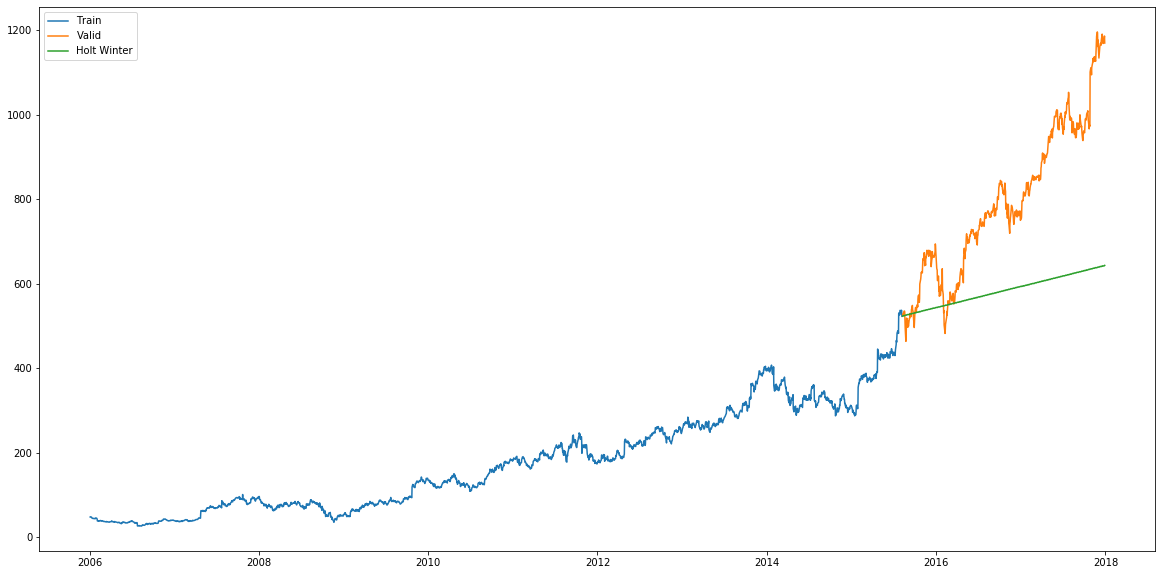

In [50]:
y_tes = Valid.copy()
fit_tes =  ExponentialSmoothing(np.asarray(Train['Close']), seasonal_periods = 7, trend='add', seasonal='add').fit()
y_tes['Holt_Winter'] = fit_tes.forecast(len(Valid))
plt.figure(figsize=(20,10))
plt.plot(Train['Close'], label='Train')
plt.plot(Valid['Close'], label='Valid')
plt.plot(y_tes['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.show()

In [51]:
rmse3 = np.sqrt(mean_squared_error(Valid.Close, y_tes.Holt_Winter))
rmse3

256.16670921533006

In [52]:
TES = pd.DataFrame({'Actual':Valid.Close,
                    'Predicted':y_tes['Holt_Winter']})
TES.head()

Actual   Predicted
Date                          
2015-08-10  524.00  523.178393
2015-08-11  527.46  523.826796
2015-08-12  525.91  523.930124
2015-08-13  529.66  524.322714
2015-08-14  531.52  523.937379

In [53]:
predict3 = fit_tes.forecast(len(test))
test['TES Values'] = predict3
test.head(58)

ID       Date  SES Values  TES Values
0    0 2018-01-01  528.763766  523.178393
1    1 2018-01-02  528.763766  523.826796
2    2 2018-01-03  528.763766  523.930124
3    3 2018-01-04  528.763766  524.322714
4    4 2018-01-05  528.763766  523.937379
7    7 2018-01-08  528.763766  523.783906
8    8 2018-01-09  528.763766  524.197632
9    9 2018-01-10  528.763766  524.566221
10  10 2018-01-11  528.763766  525.214624
11  11 2018-01-12  528.763766  525.317952
14  14 2018-01-15  528.763766  525.710542
15  15 2018-01-16  528.763766  525.325207
16  16 2018-01-17  528.763766  525.171733
17  17 2018-01-18  528.763766  525.585459
18  18 2018-01-19  528.763766  525.954049
21  21 2018-01-22  528.763766  526.602452
22  22 2018-01-23  528.763766  526.705779
23  23 2018-01-24  528.763766  527.098370
24  24 2018-01-25  528.763766  526.713035
25  25 2018-01-26  528.763766  526.559561
28  28 2018-01-29  528.763766  526.973287
29  29 2018-01-30  528.763766  527.341877
30  30 2018-01-31  528.763766  527.990280
31  31 2018-02-01  528.763766  528.093607
32  32 2018-02-02  528.763766  528.486197
35  35 2018-02-05  528.763766  528.100863
36  36 2018-02-06  528.763766  527.947389
37  37 2018-02-07  528.763766  528.361115
38  38 2018-02-08  528.763766  528.729704
39  39 2018-02-09  528.763766  529.378107
42  42 2018-02-12  528.763766  529.481435
43  43 2018-02-13  528.763766  529.874025
44  44 2018-02-14  528.763766  529.488691
45  45 2018-02-15  528.763766  529.335217
46  46 2018-02-16  528.763766  529.748943
49  49 2018-02-19  528.763766  530.117532
50  50 2018-02-20  528.763766  530.765935
51  51 2018-02-21  528.763766  530.869263
52  52 2018-02-22  528.763766  531.261853
53  53 2018-02-23  528.763766  530.876518
56  56 2018-02-26  528.763766  530.723045
57  57 2018-02-27  528.763766  531.136771
58  58 2018-02-28  528.763766  531.505360

### *AutoRegressionIntegratedMovingAverge* ARIMA

> **EDA with Dicky Fuller Test**

In [54]:
Train.Close.mean(), Valid.Close.mean(), Train.Close.var(), Valid.Close.var()

(175.98726708074545, 792.7277980132445, 13772.683651517316, 32423.531216536194)

In [55]:
np.log(Train['Close']).mean(), np.log(Valid['Close']).mean(),np.log(Train['Close']).var(),np.log(Valid['Close']).var()

(4.902570072285456, 6.64930402246891, 0.6089888445949545, 0.053162893476594406)

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
# creating a function to calculate the result of dickey-fuller test
def stationary_test(series):
    """
        Dicky Fuller test is used to check the stationary of the series.
        The calculation behind teh test is to determine how strongly a
        a time series is defined by its trend.
        Procedure to cheeck for stationary in a series:
        a. determine the rolling statistics
        b. plot rolling statistics
        c. perform Dickey-Fuller test
    
    """
    # determine rolling statistics
    # 24 hours window for each day
    rollmean = pd.Series(series).rolling(window=24).mean()
    rollstd = pd.Series(series).rolling(window=24).std()
    
    # ploting rolling statistics
    original = plt.plot(series, color='blue', label='Original Sereis')
    mean = plt.plot(rollmean, color='red', label= 'Rolling Mean')
    std = plt.plot(rollstd, color='black', label= 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # perform Dickey-Fuller test
    print("Result of Dickey Fuller Test: ")
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=["Test Staistics", "p-values", "#Lag", "Number of Observation Used"])
    for key, value in dftest[4].items():
        dfoutput['Critical Values(%s)'%key] = value
    print(dfoutput)
    
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

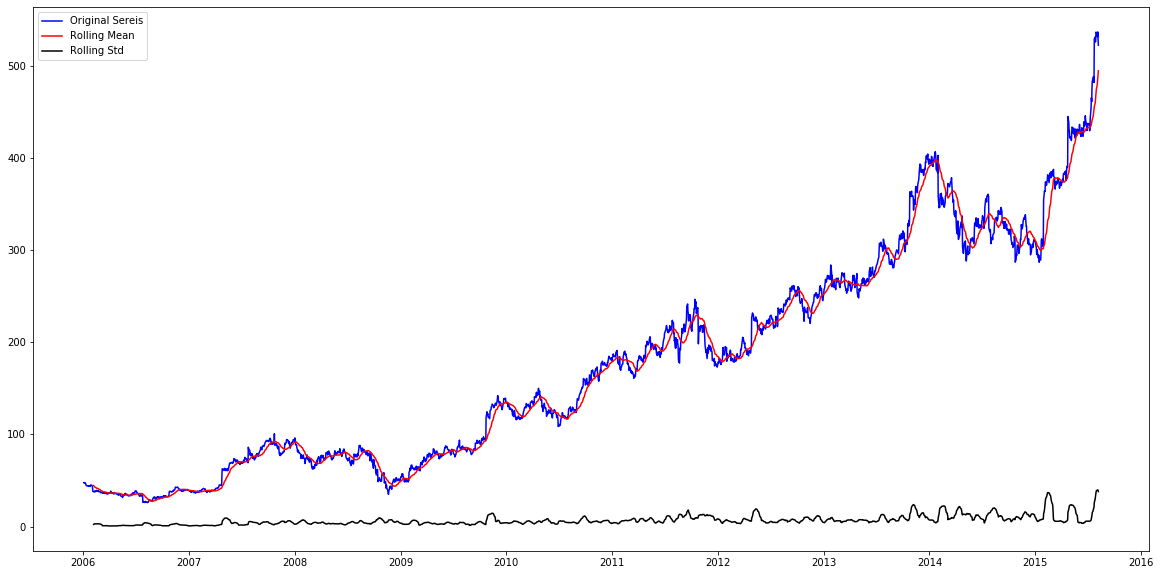

Result of Dickey Fuller Test: 
Test Staistics                   1.341261
p-values                         0.996830
#Lag                             2.000000
Number of Observation Used    2412.000000
Critical Values(1%)             -3.433064
Critical Values(5%)             -2.862739
Critical Values(10%)            -2.567408
dtype: float64


In [58]:
stationary_test(Train['Close'])

>> **Making the series stationary**:
>> There are various methods to to make a time series stationary:
- Difference Transform
-

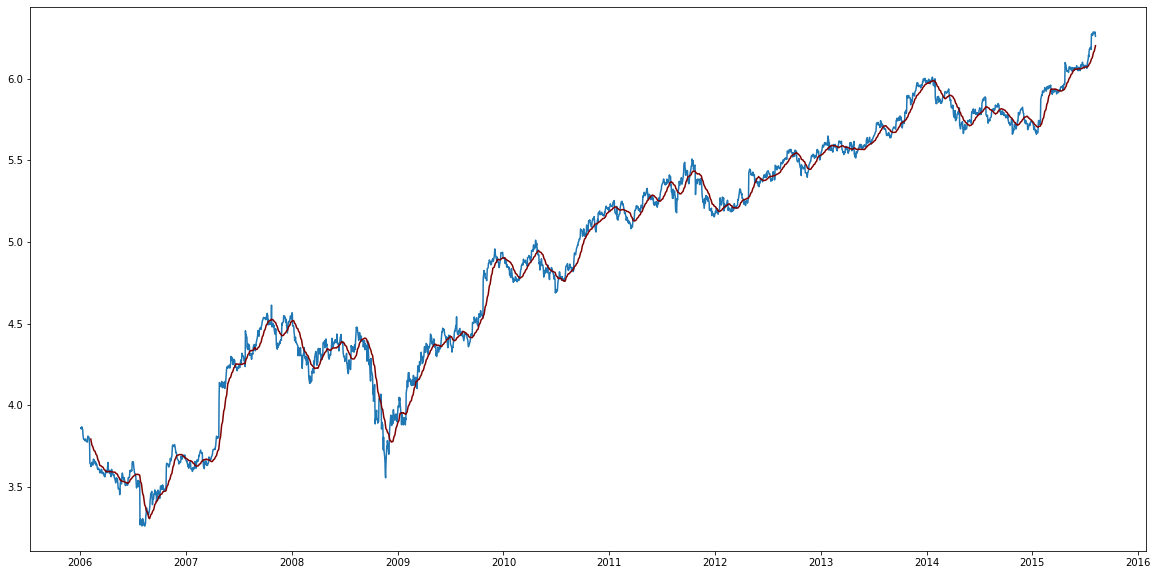

In [59]:
train_log = np.log(Train['Close'])
valid_log = np.log(Valid['Close'])
moving_avg = pd.Series(train_log).rolling(window=24).mean()
plt.plot(train_log)
plt.plot(moving_avg, color='maroon')

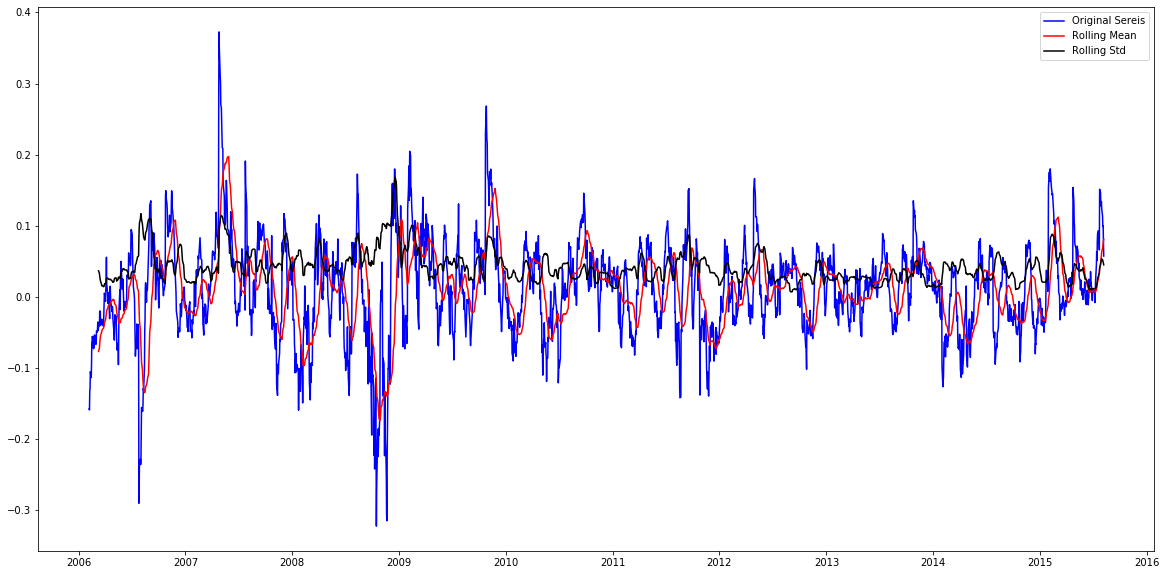

Result of Dickey Fuller Test: 
Test Staistics               -1.007350e+01
p-values                      1.241068e-17
#Lag                          1.000000e+01
Number of Observation Used    2.381000e+03
Critical Values(1%)          -3.433099e+00
Critical Values(5%)          -2.862755e+00
Critical Values(10%)         -2.567417e+00
dtype: float64


In [60]:
train_log_moving_avg_diff = train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace=True)
stationary_test(train_log_moving_avg_diff)

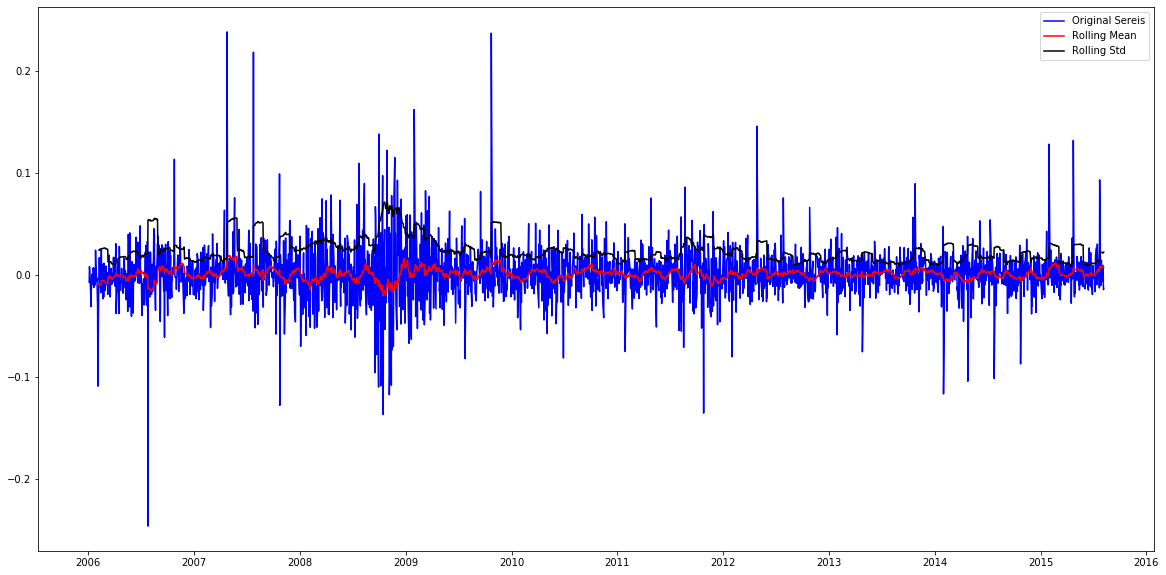

Result of Dickey Fuller Test: 
Test Staistics                 -37.417193
p-values                         0.000000
#Lag                             1.000000
Number of Observation Used    2412.000000
Critical Values(1%)             -3.433064
Critical Values(5%)             -2.862739
Critical Values(10%)            -2.567408
dtype: float64


In [61]:
train_log_diff = train_log - train_log.shift(1)
stationary_test(train_log_diff.dropna())


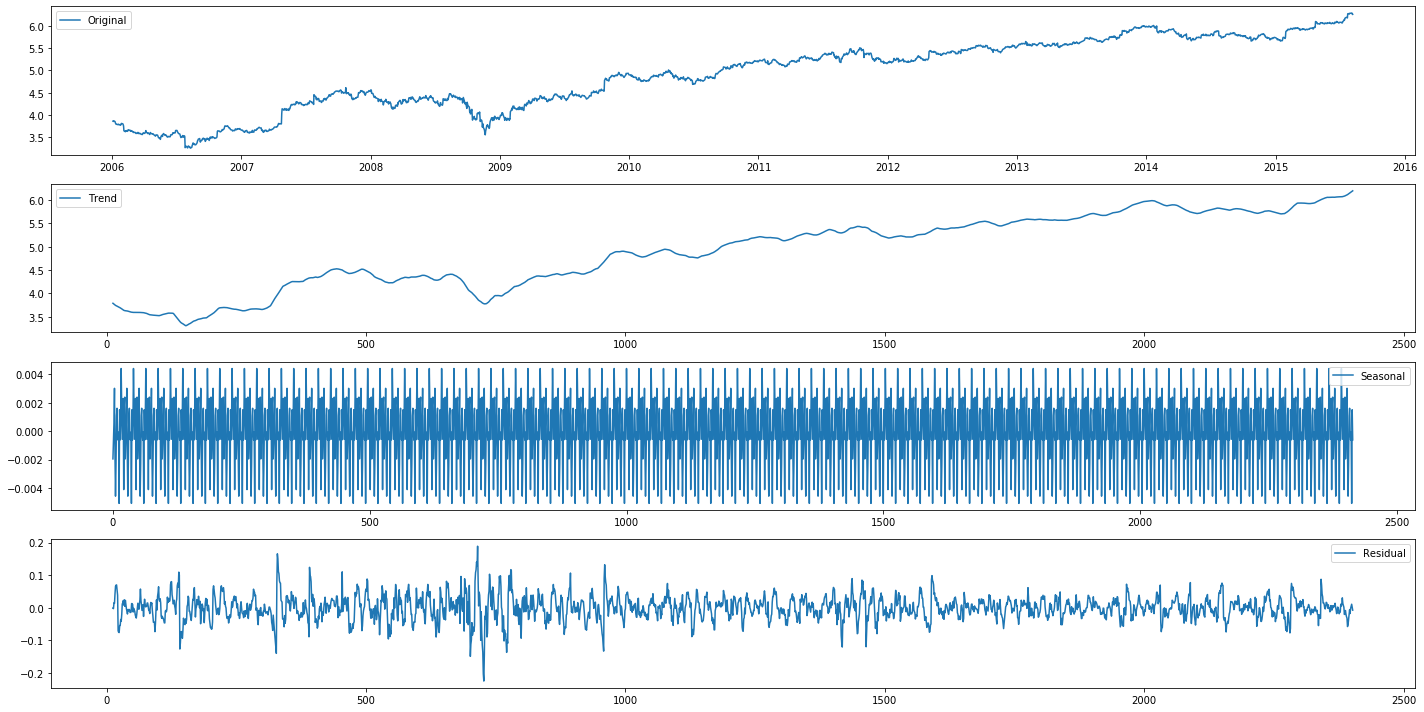

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

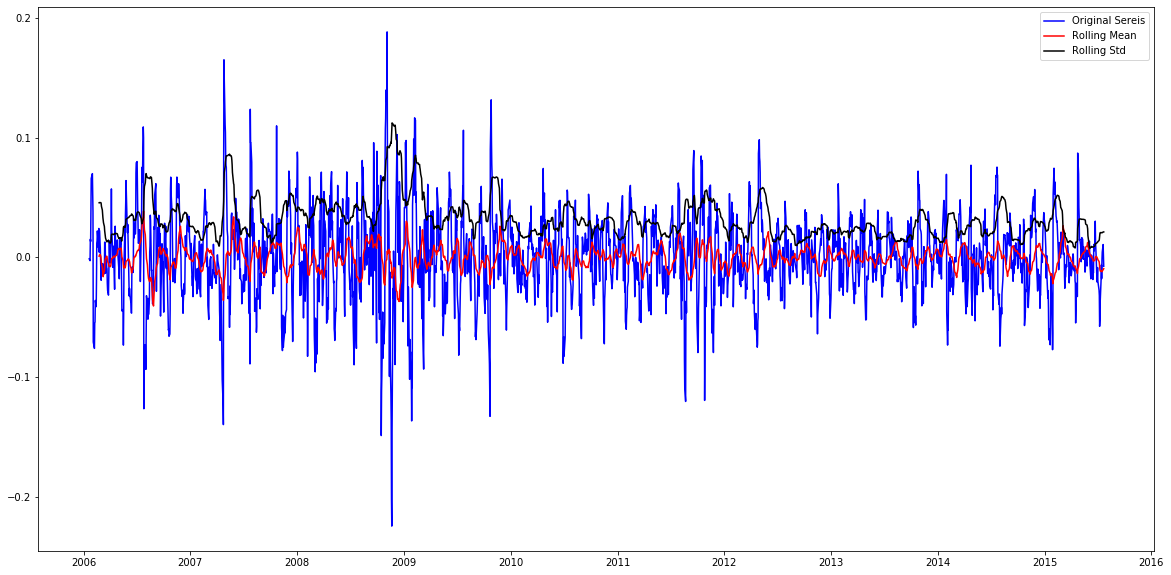

Result of Dickey Fuller Test: 
Test Staistics               -1.304778e+01
p-values                      2.173601e-24
#Lag                          2.700000e+01
Number of Observation Used    2.363000e+03
Critical Values(1%)          -3.433120e+00
Critical Values(5%)          -2.862764e+00
Critical Values(10%)         -2.567422e+00
dtype: float64


In [63]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = train_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)
stationary_test(train_log_decompose[0])

> **Forcasting the series using ARIMA** 

In [64]:
from statsmodels.tsa.stattools import acf, pacf

def optimized_value(series, nlags):  
    lag_acf = acf(series.dropna(), nlags=nlags)
    lag_pacf = pacf(series.dropna(), nlags=nlags,method='ols')
    
    # ploting lag_acf
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='maroon')
    plt.axhline(y=-1.96/np.sqrt(len(series.dropna())),linestyle='--',color='maroon')
    plt.axhline(y=1.96/np.sqrt(len(series.dropna())),linestyle='--',color='maroon')
    plt.title('Autocorrelation Funciont Plot')
    plt.show()
    
    # potting lac_pacf
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--',color='maroon')
    plt.axhline(y=-1.96/np.sqrt(len(series.dropna())),linestyle='--',color='maroon')
    plt.axhline(y=1.96/np.sqrt(len(series.dropna())),linestyle='--',color='maroon')
    plt.title('Partial Autocorrelation Function Plot')
    plt.show()

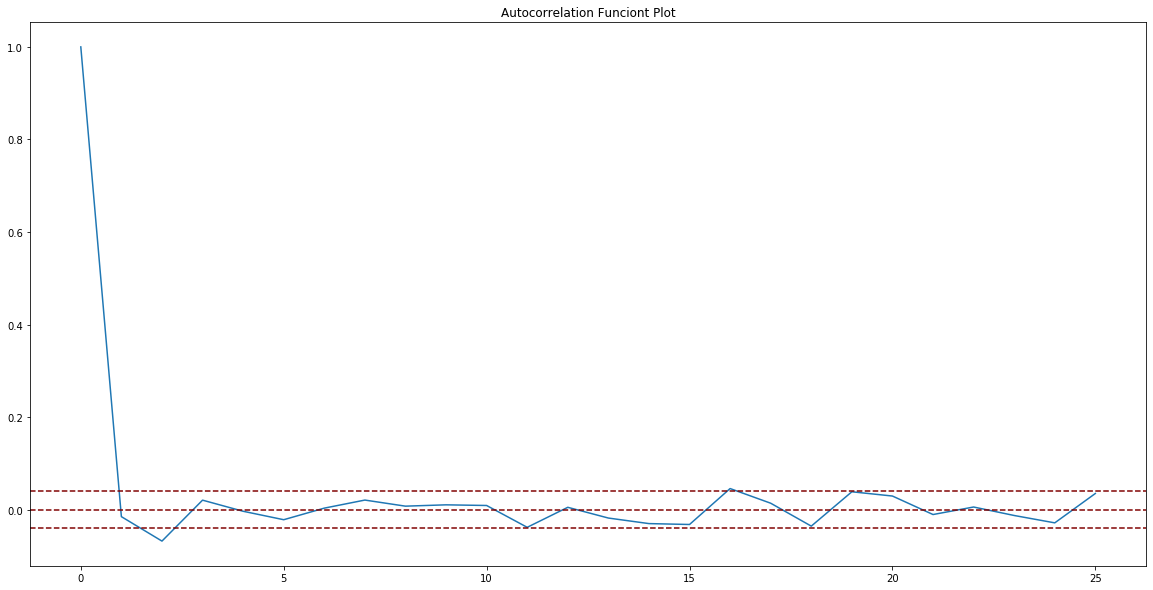

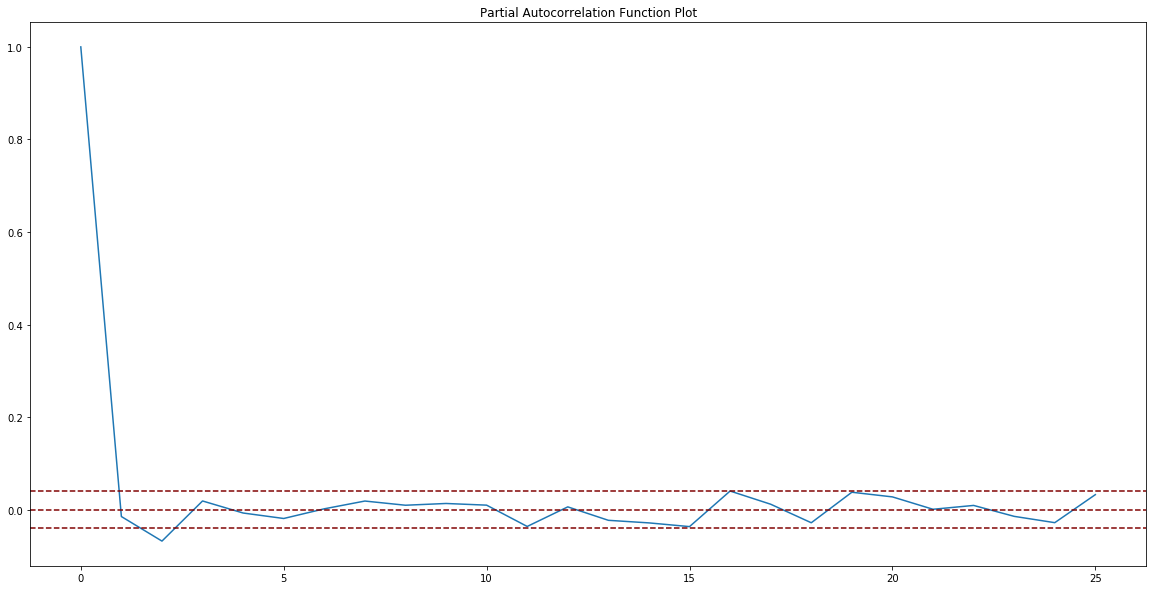

In [65]:
optimized_value(train_log_diff, 25)

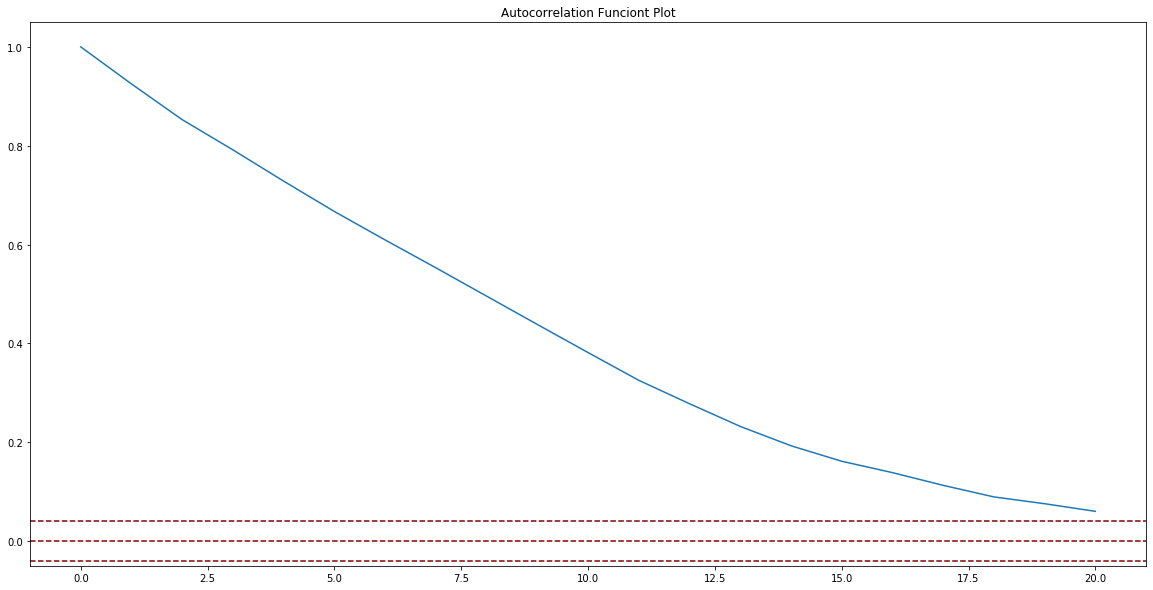

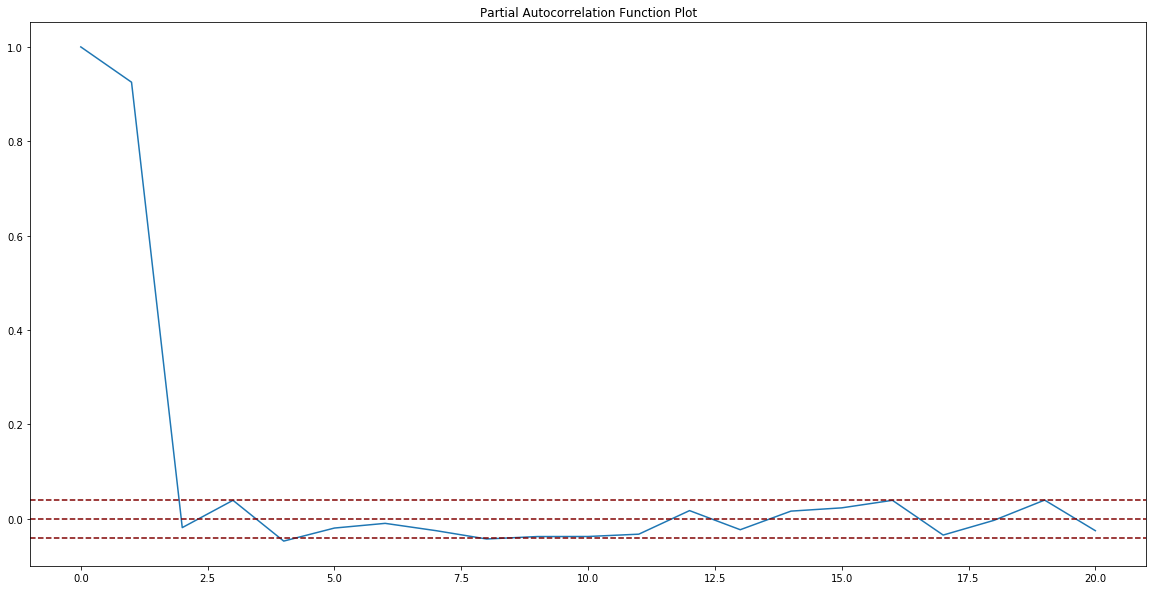

In [66]:
optimized_value(train_log_moving_avg_diff, 20)

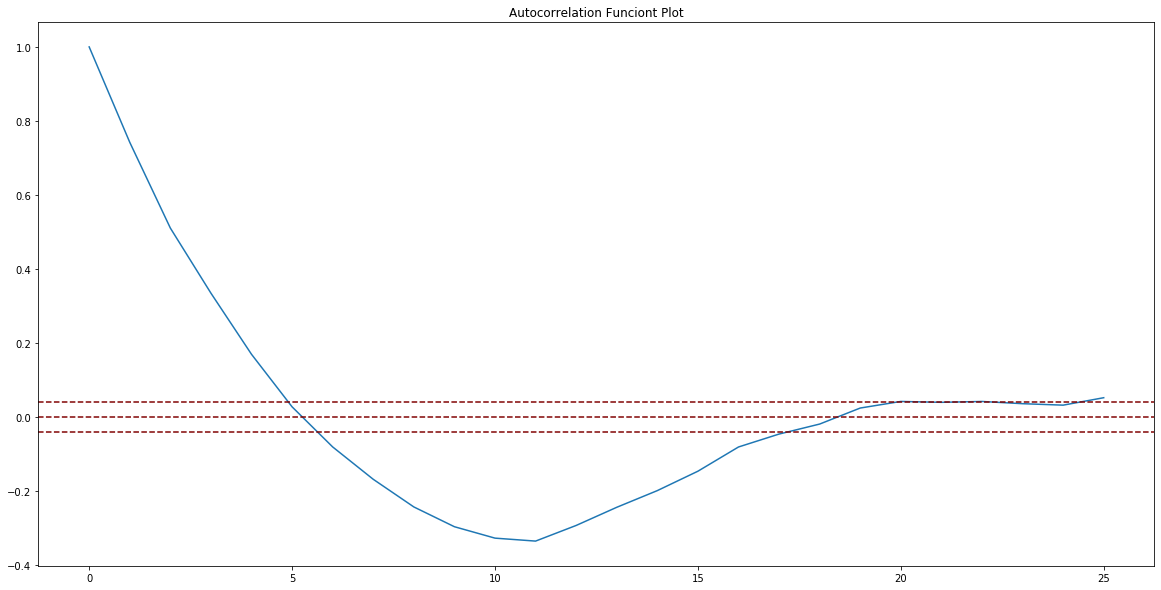

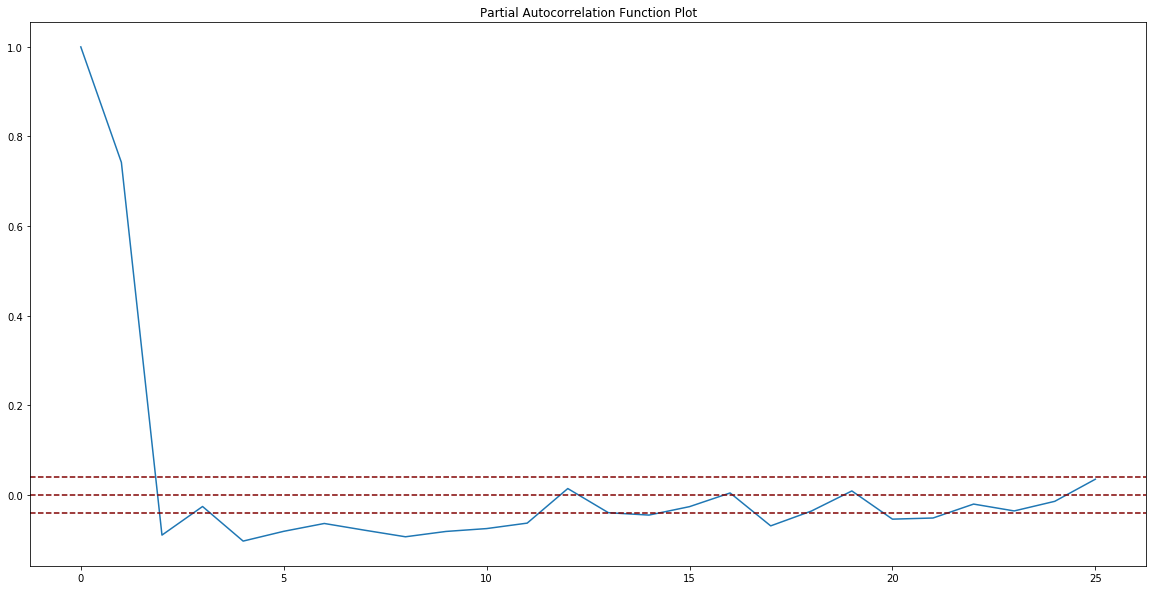

In [67]:
optimized_value(train_log_decompose, 25)

In [68]:
from statsmodels.tsa.arima_model import ARIMA
def model_arima(series, order, valid):
    model = ARIMA(series, order=order)
    result_AR = model.fit(disp=-1)
    plt.plot(series, label='origianl')
    plt.plot(result_AR.fittedvalues,color='maroon',label='Predicted')
    plt.legend(loc='best')
    plt.show()
    
    AR_predict = result_AR.predict(start='2015-08-10',end='2017-12-29')
    AR_predict = AR_predict.cumsum().shift().fillna(0)
    AR_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid['Close'])[0], index=valid.index)
    AR_predict1 = AR_predict1.add(AR_predict, fill_value=0)
    AR_predict = np.exp(AR_predict)
    plt.plot(valid['Close'], label='Valid')
    plt.plot(AR_predict, color='purple',label='Predict')
    plt.legend(loc='best')
    rmse_plot = plt.title('RMSE: %.4f'%(np.sqrt(np.dot(AR_predict, valid['Colse']))/valid.shape[0]))
    plt.show(rmse_plot)
    rmse_plot

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


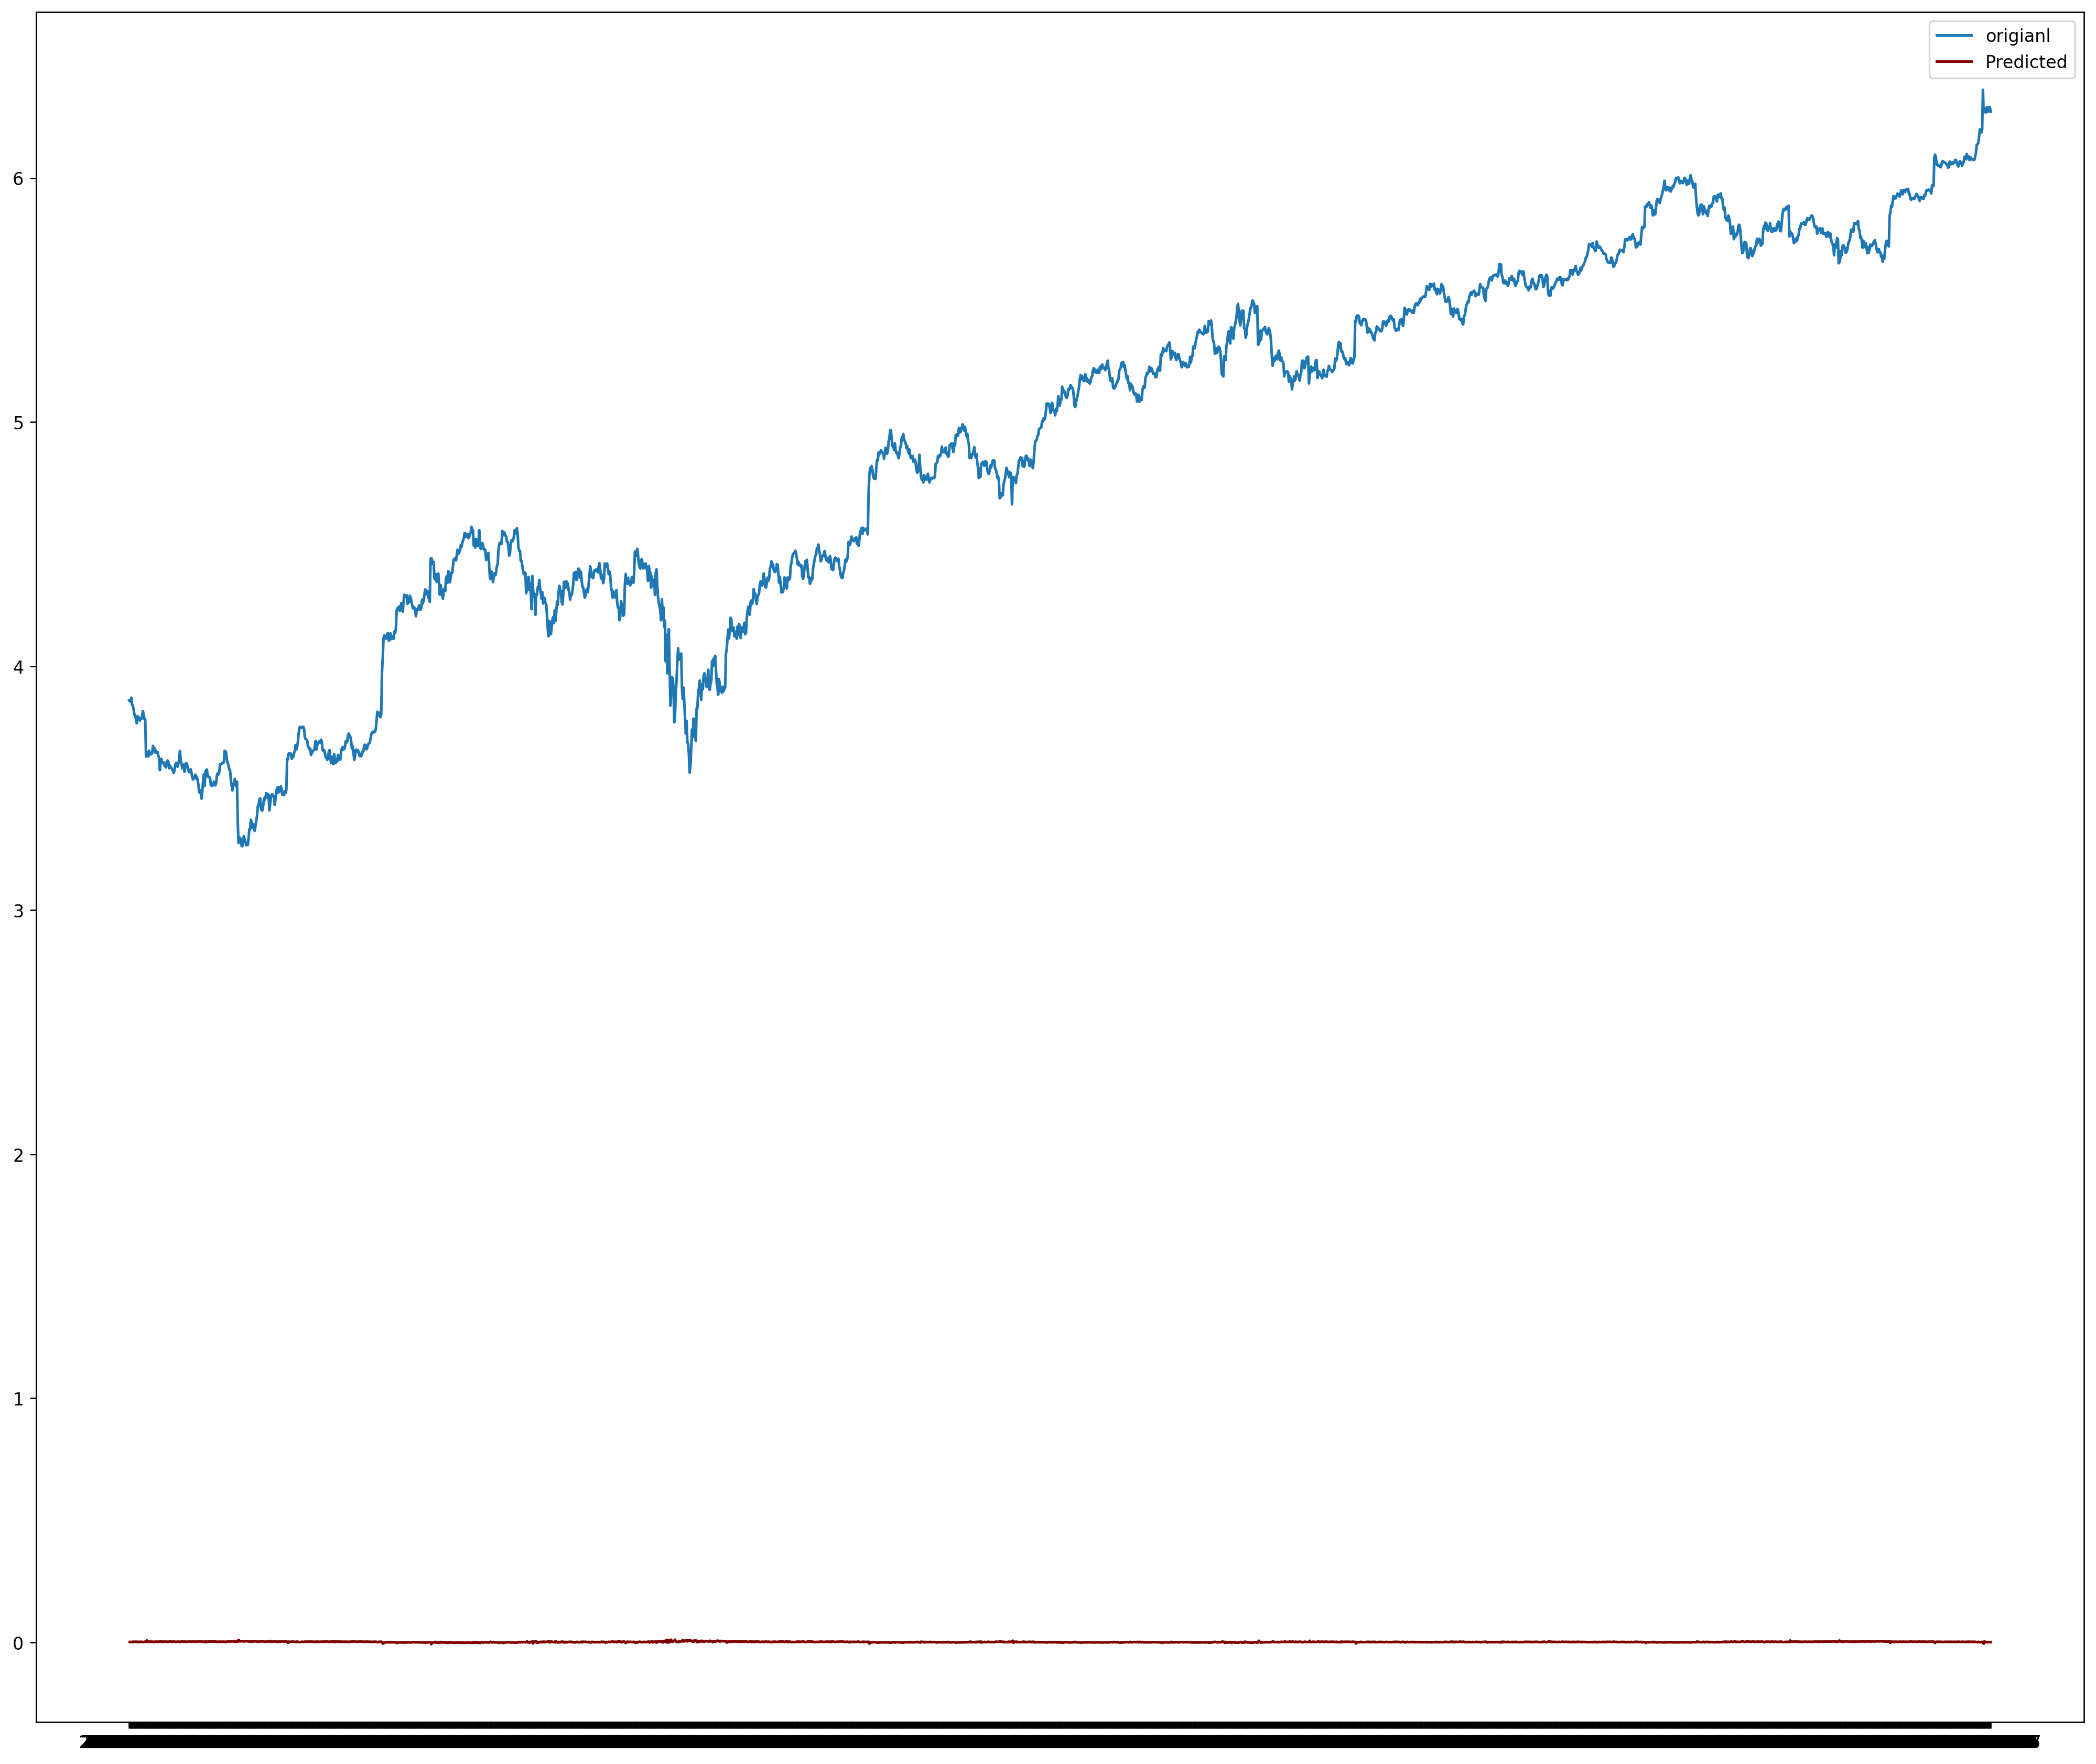

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

In [119]:
model_arima(train_log, (2,1,1), valid_log)

In [70]:
result_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2413
Model:                 ARIMA(2, 1, 0)   Log Likelihood                4971.902
Method:                       css-mle   S.D. of innovations              0.031
Date:                Mon, 03 Aug 2020   AIC                          -9935.804
Time:                        00:29:27   BIC                          -9912.649
Sample:                             1   HQIC                         -9927.383
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.866e-06      0.000     -0.013      0.990      -0.001       0.001
ar.L1.D.Close    -0.6536      0.019    -34.710      0.000      -0.691      -0.617
ar.L2.D.Close    -0.3792      0.019    -20.142      0.000      -0.416      -0.342
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8618           -1.3763j            1.6239           -0.3390
AR.2           -0.8618           +1.3763j            1.6239            0.3390
-----------------------------------------------------------------------------
"""

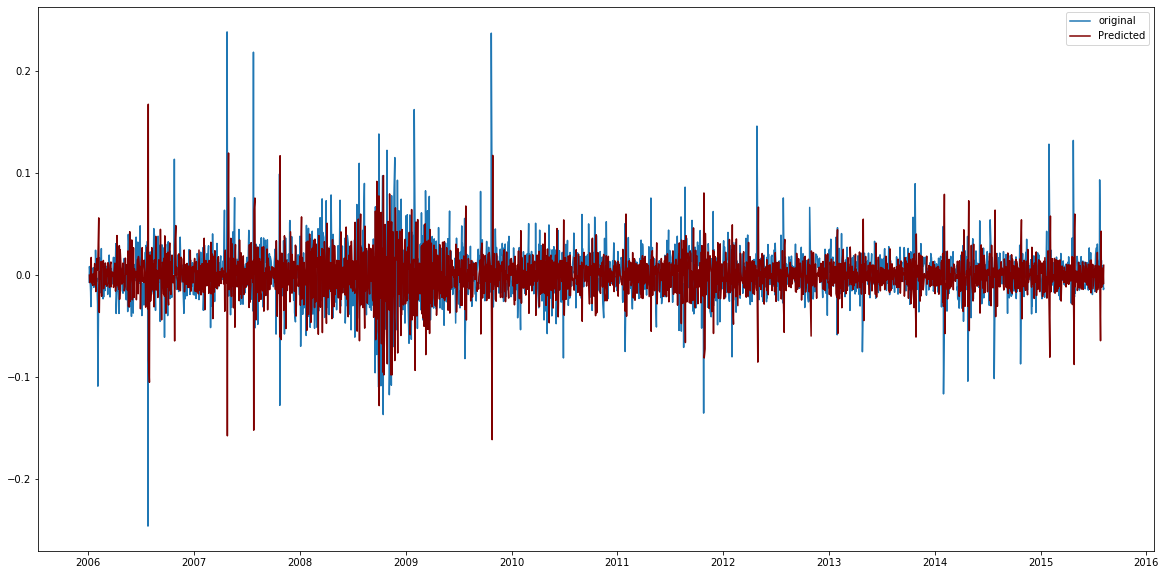

In [71]:
model = ARIMA(train_log.dropna(), order=(2,1,0))
result_tAR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = 'original')
plt.plot(result_AR.fittedvalues,color='maroon',label='Predicted')
plt.legend(loc='best')
plt.show()

RESTARTING ARIMA

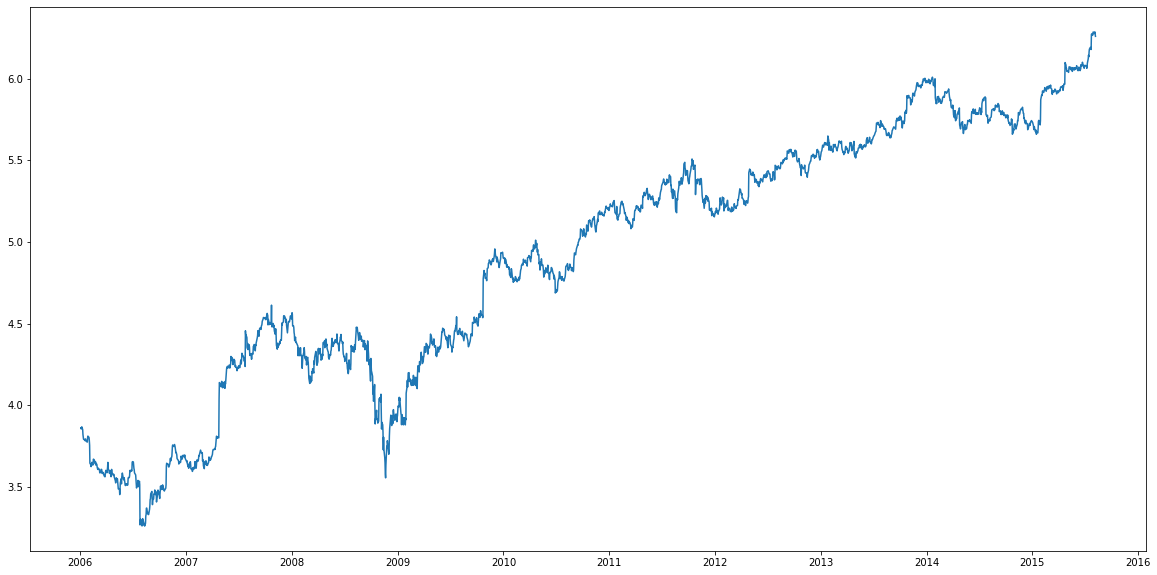

In [72]:
plt.plot(train_log)

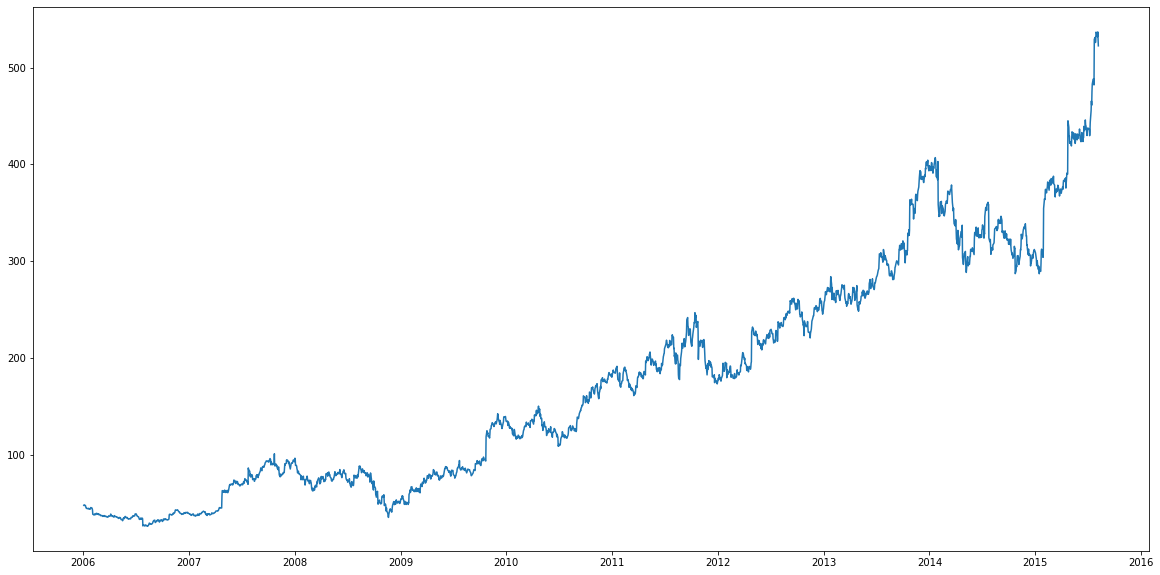

In [73]:
plt.plot(Train.Close)

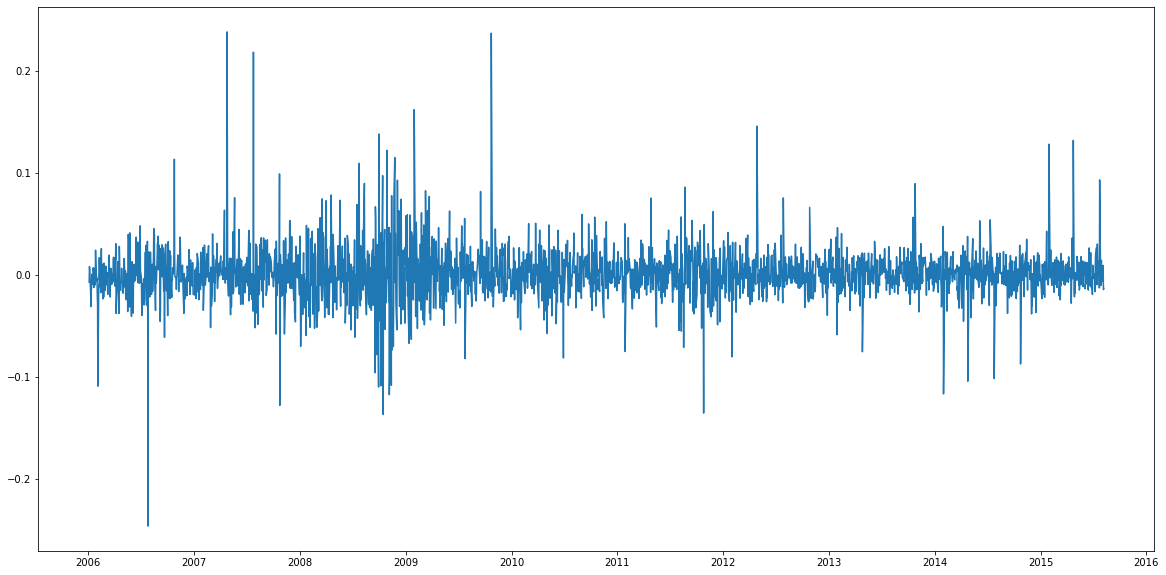

In [74]:
plt.plot(train_log_diff)

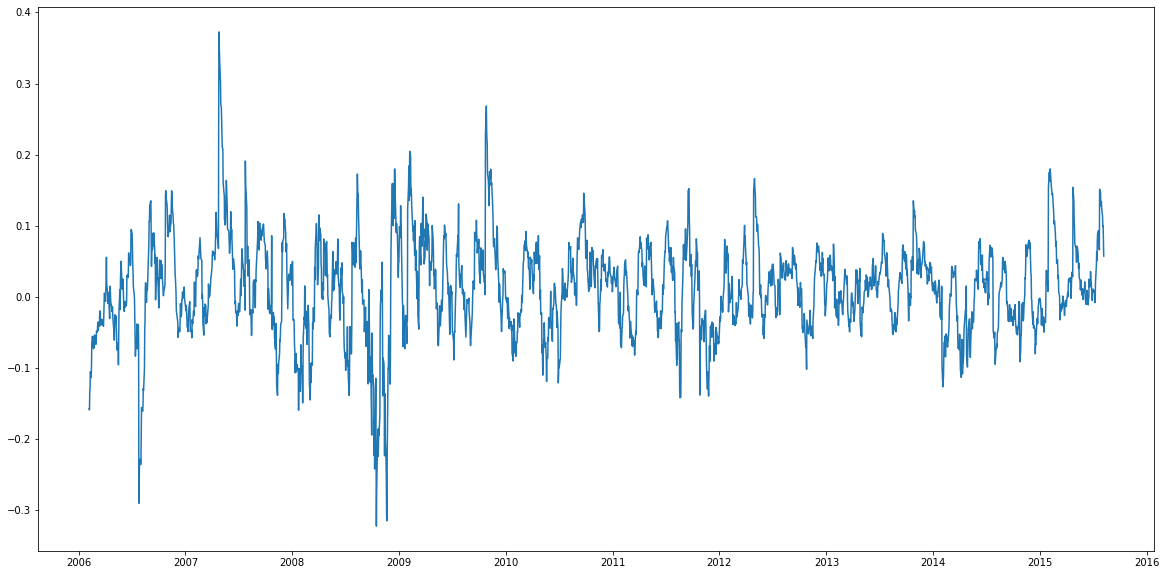

In [75]:
plt.plot(train_log_moving_avg_diff)

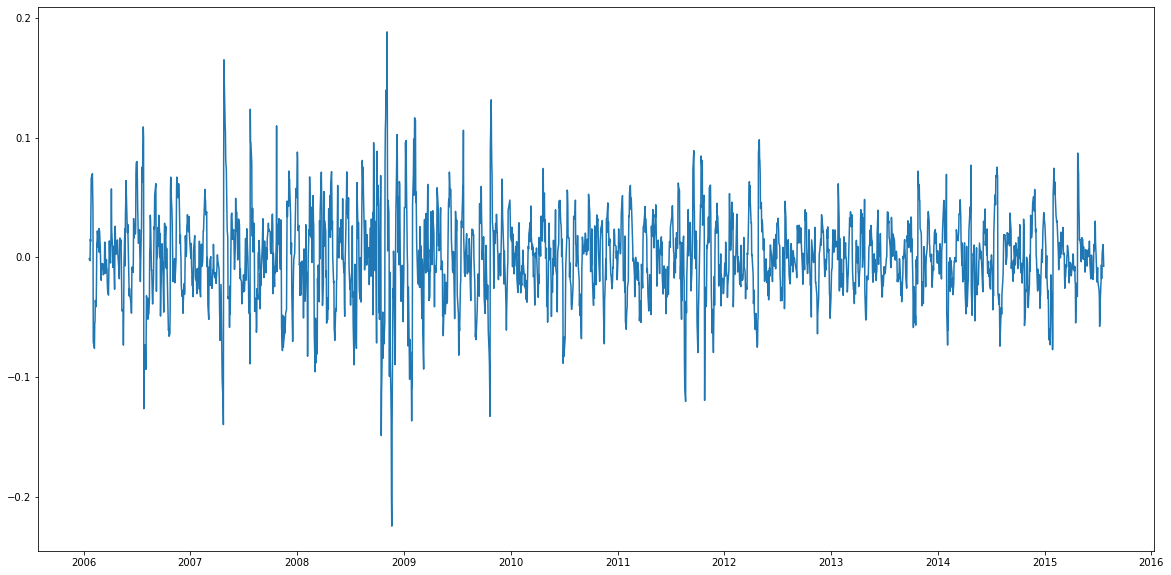

In [76]:
plt.plot(train_log_decompose)

diffrencing order (d)
The purpose of differencing it to make the time series stationary.

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(21,18),'figure.dpi':120})

In [82]:
close = pd.read_csv("~/Documents/Books/DataScience/Datasets/stocks/New.csv" ,names=['Close'], header=0)
close.head()

Close
2006-01-03  47.47
2006-01-04  47.48
2006-01-05  47.16
2006-01-06  47.97
2006-01-09  46.55

In [83]:
tc = close[:int(0.8*(len(close)))]
vc = close[int(0.8*(len(close))):]
data.shape, Train.shape, Valid.shape, test.shape, vc.shape, tc.shape

((3019, 11), (2415, 11), (604, 11), (43, 4), (604, 1), (2415, 1))

In [84]:
tc_log = np.log(tc)
vc_log = np.log(vc)

Getting the value of d

1. use Subplots for the individual plots below
2. all code from here to the end of sarimax should be reviewd for palgerism

TypeError: 'Text' object is not subscriptable

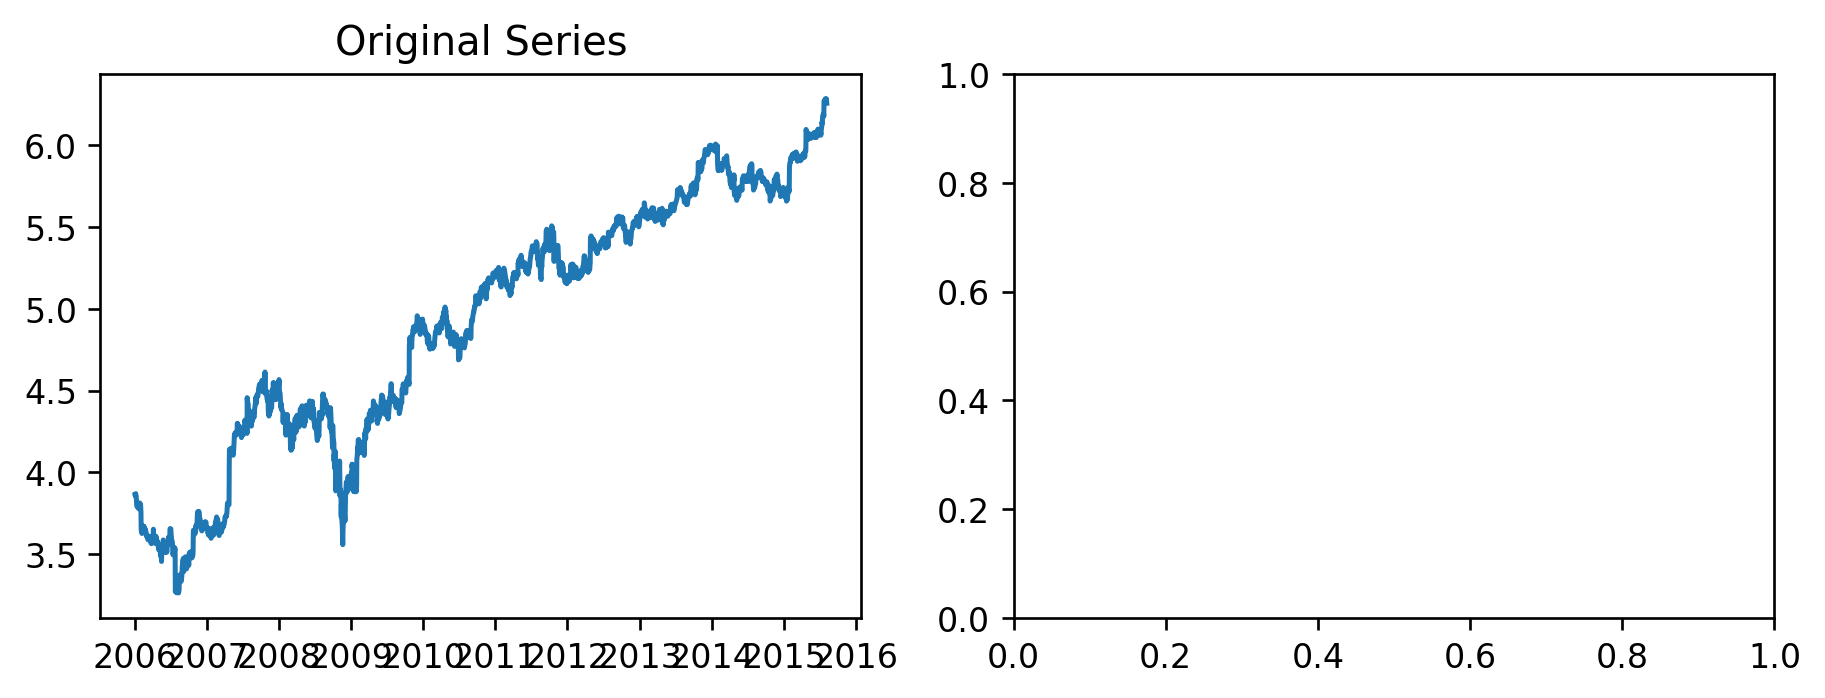

In [153]:
# Original Series
fig, ax = plt.subplots(1,2)
plt.plot(train_log, title="Original Series", ax=ax[0])
plot_acf(train_log, title='Original ACF', ax=ax[1])
plt.show()

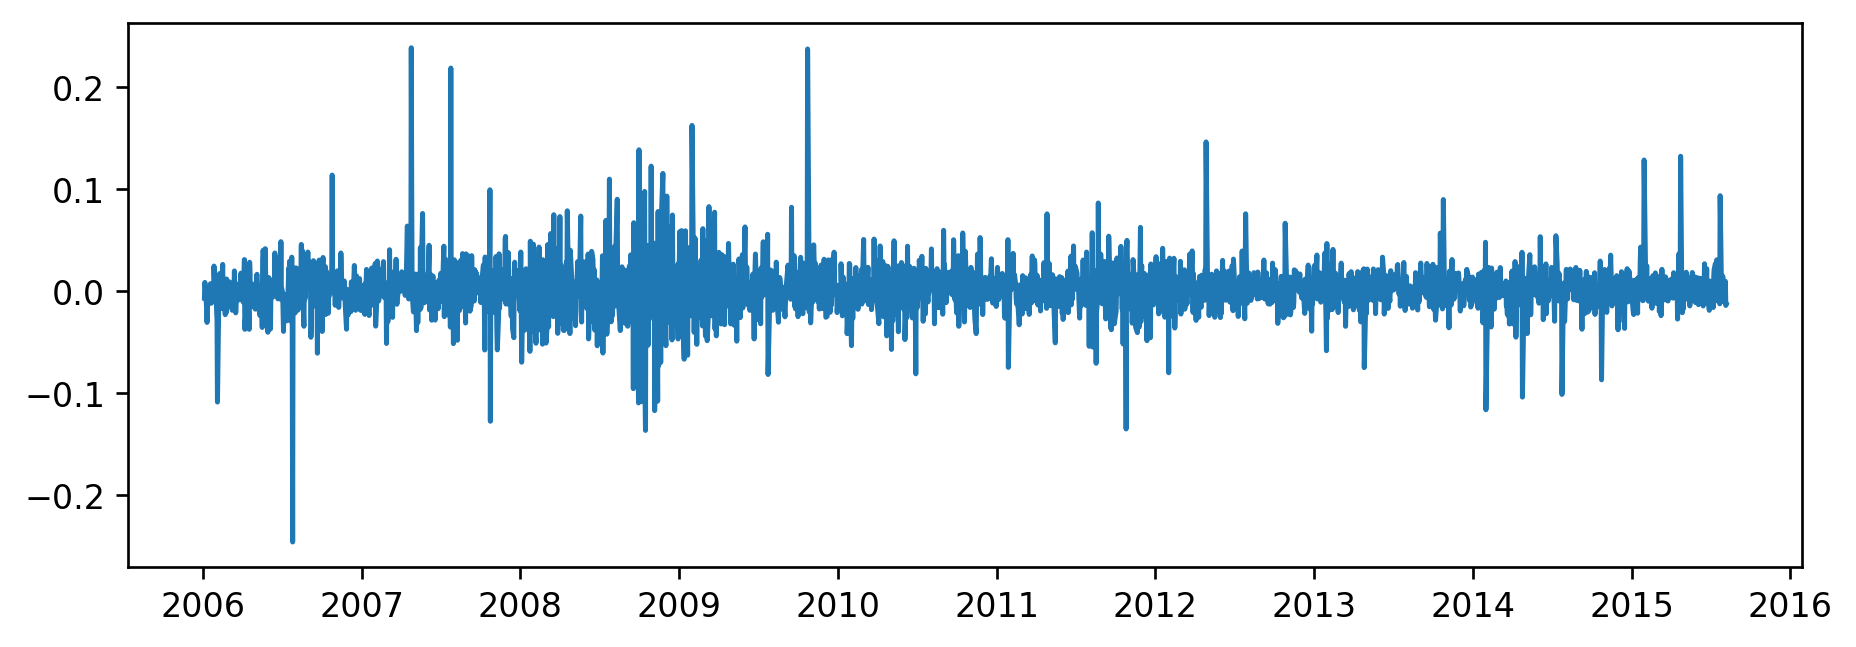

In [134]:
plt.plot(train_log.diff())

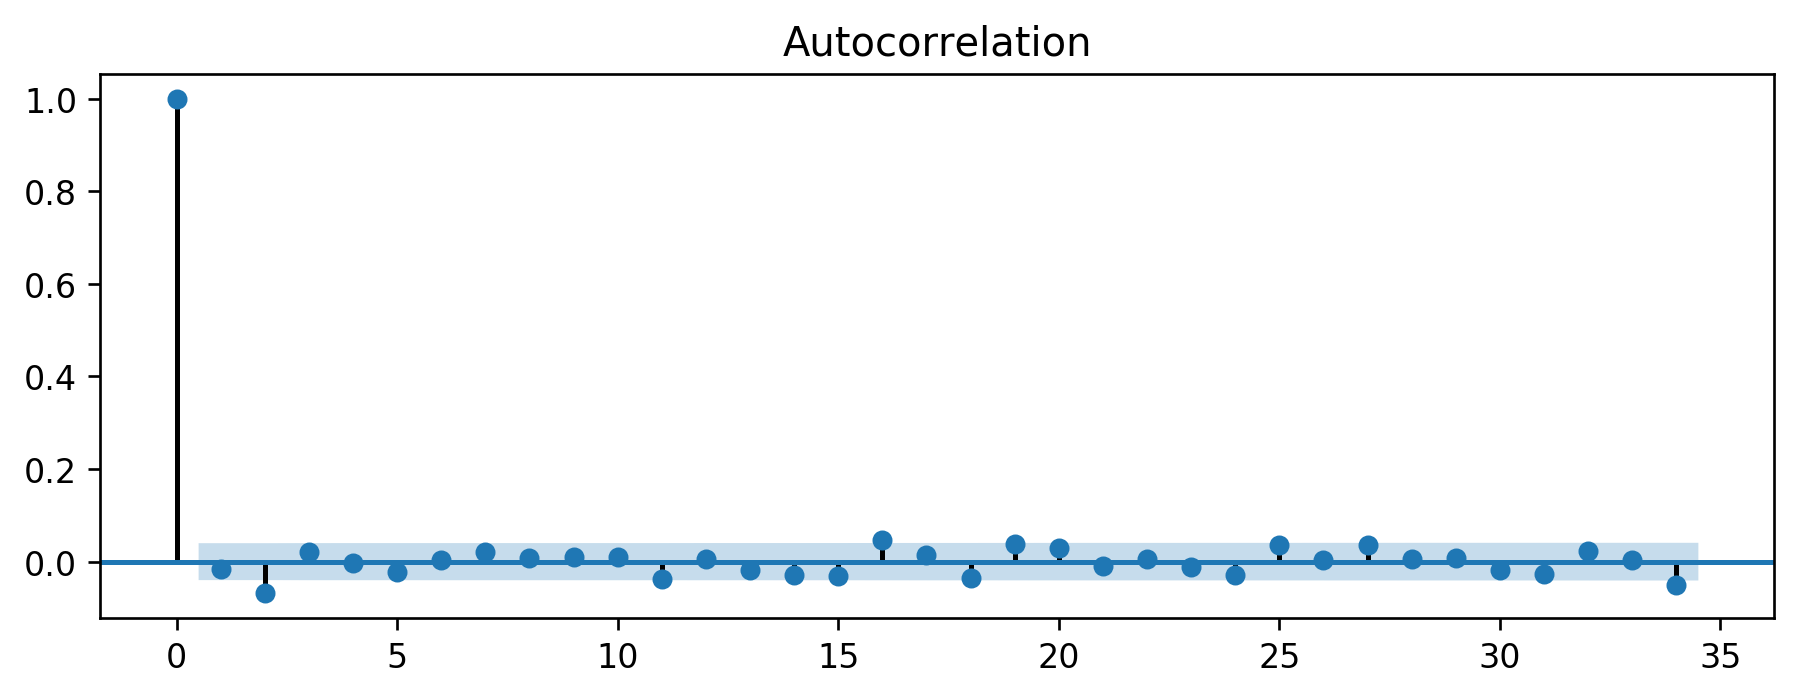

In [128]:
# 1st Order ACF Differencing
acf = plot_acf(train_log.diff().dropna())

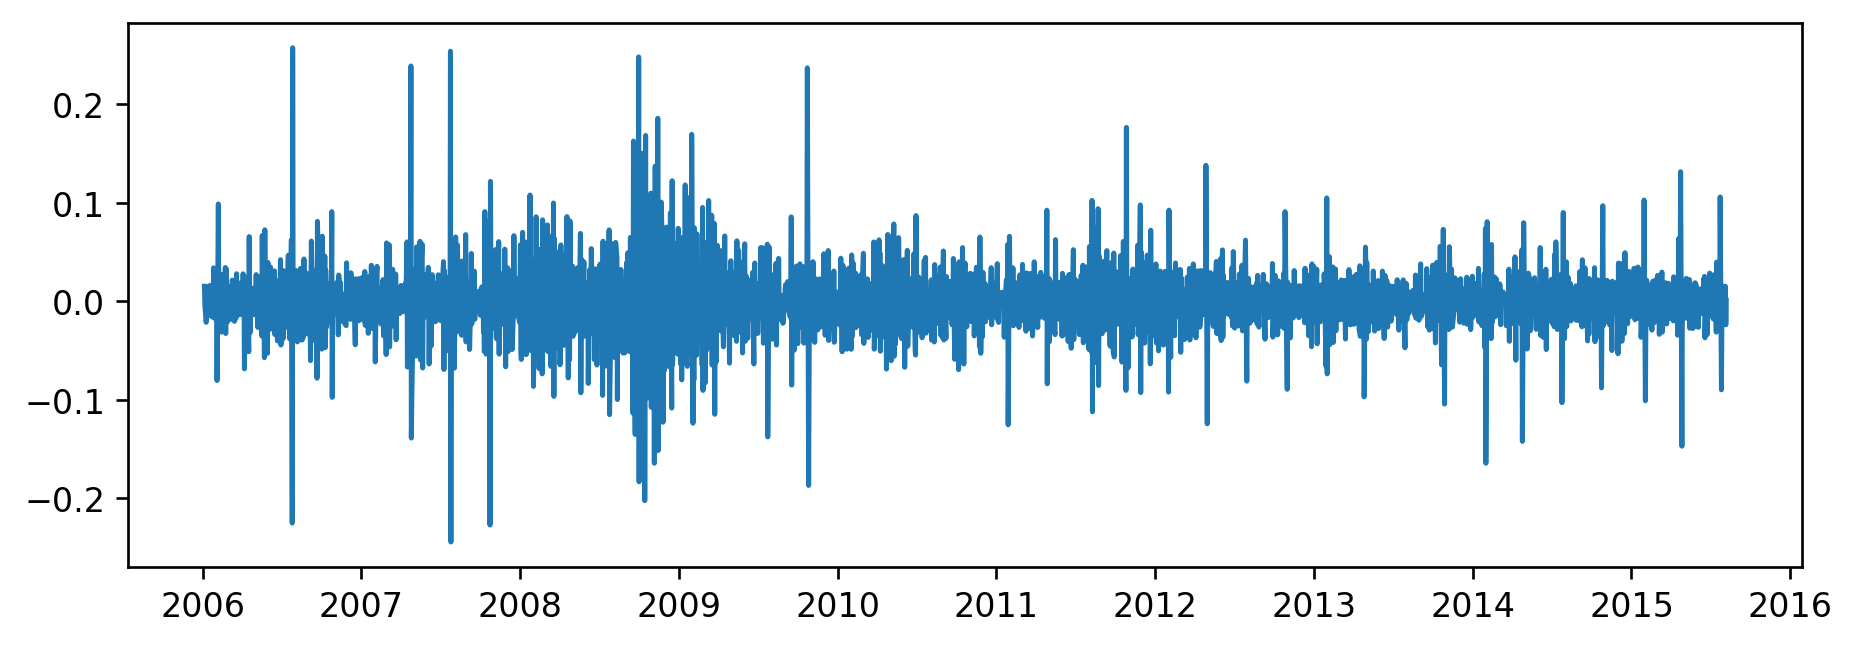

In [135]:
plt.plot(train_log.diff().diff())

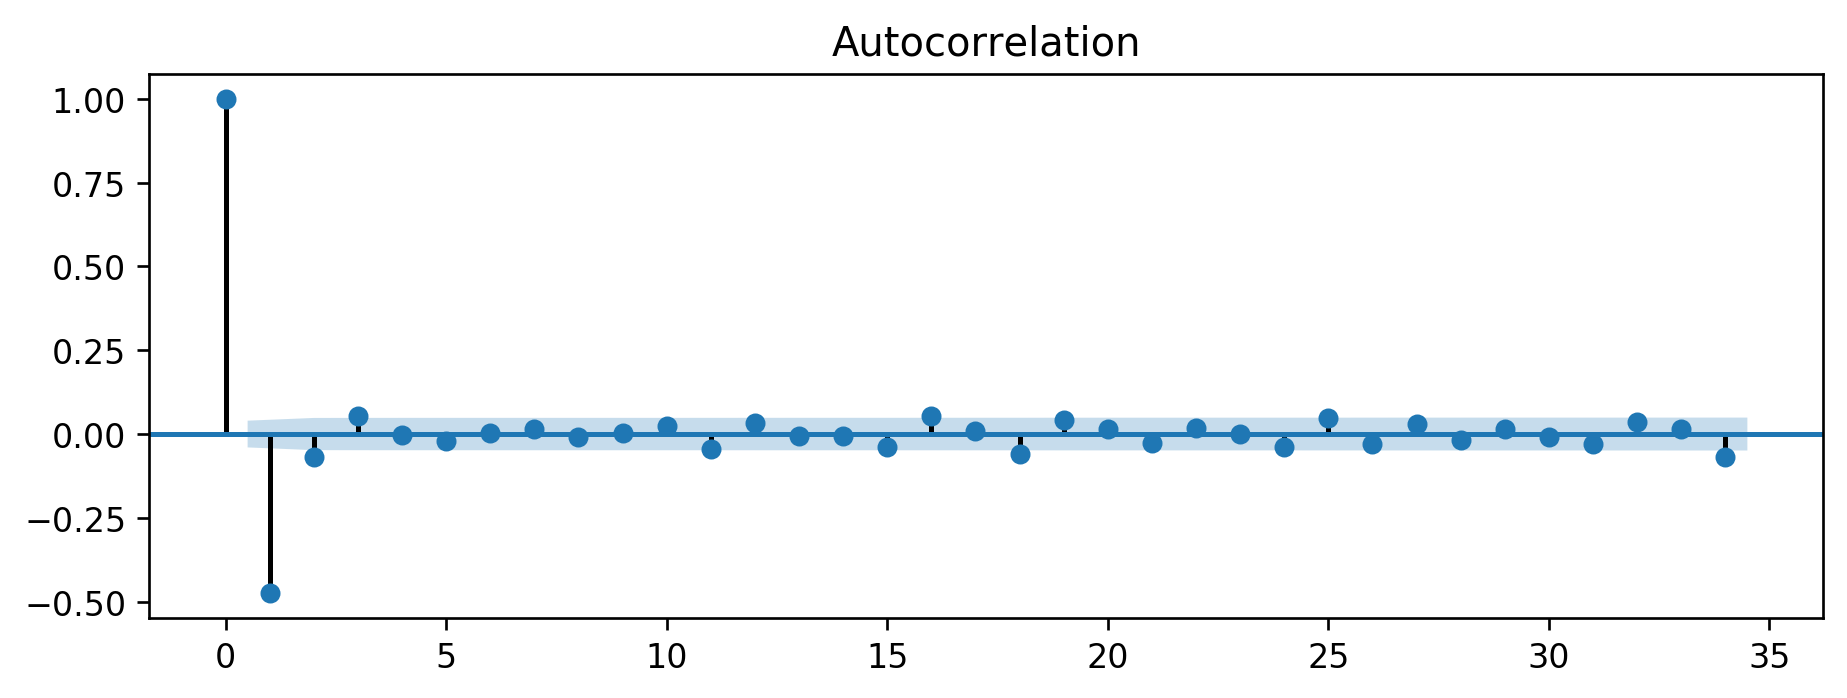

In [129]:
# 2nd Order ACF Diffrencing
acf2 = plot_acf(train_log.diff().diff().dropna())

From the above the time series reaches stationary at both the first order diffrencing and tehe second order diffrencing.

Getting teh value of p

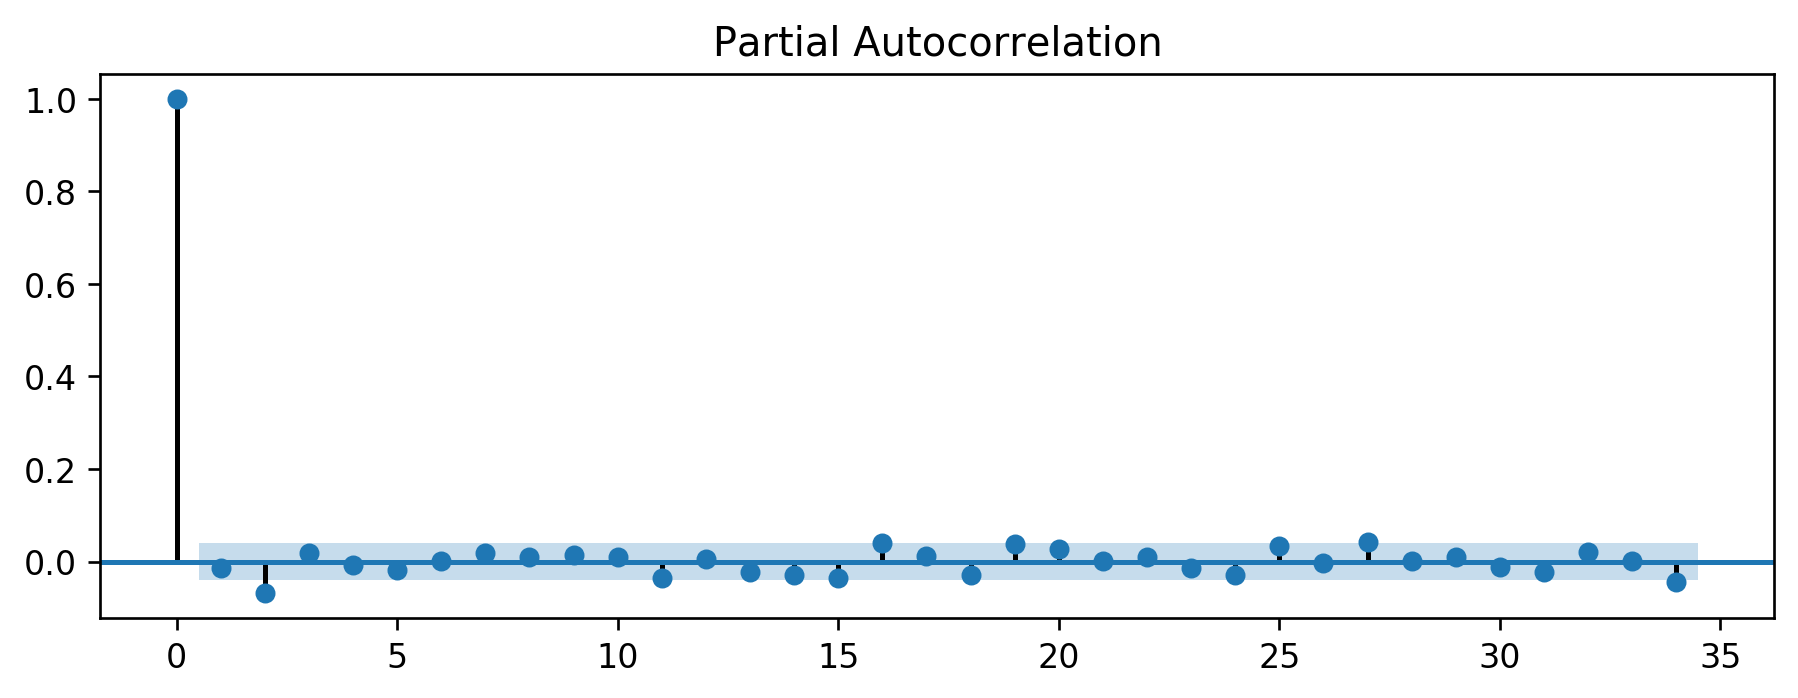

In [131]:
# 1st Order PACF Diffrencing
pacf1 = plot_pacf(train_log.diff().dropna())

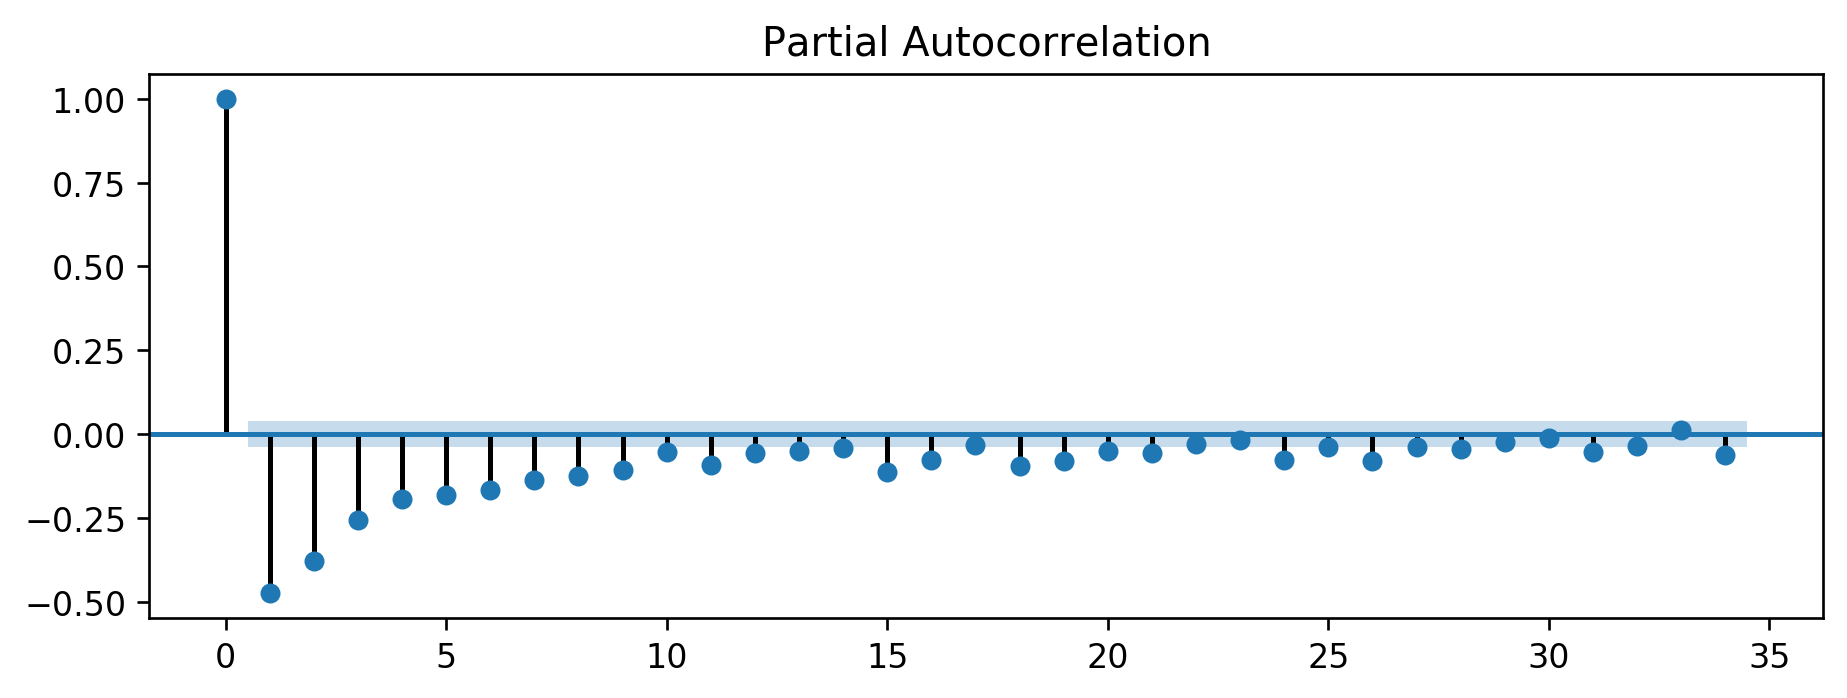

In [132]:
# 2nd Order PACF
pacf2 = plot_pacf(train_log.diff().diff().dropna())

we'ld take p as 1

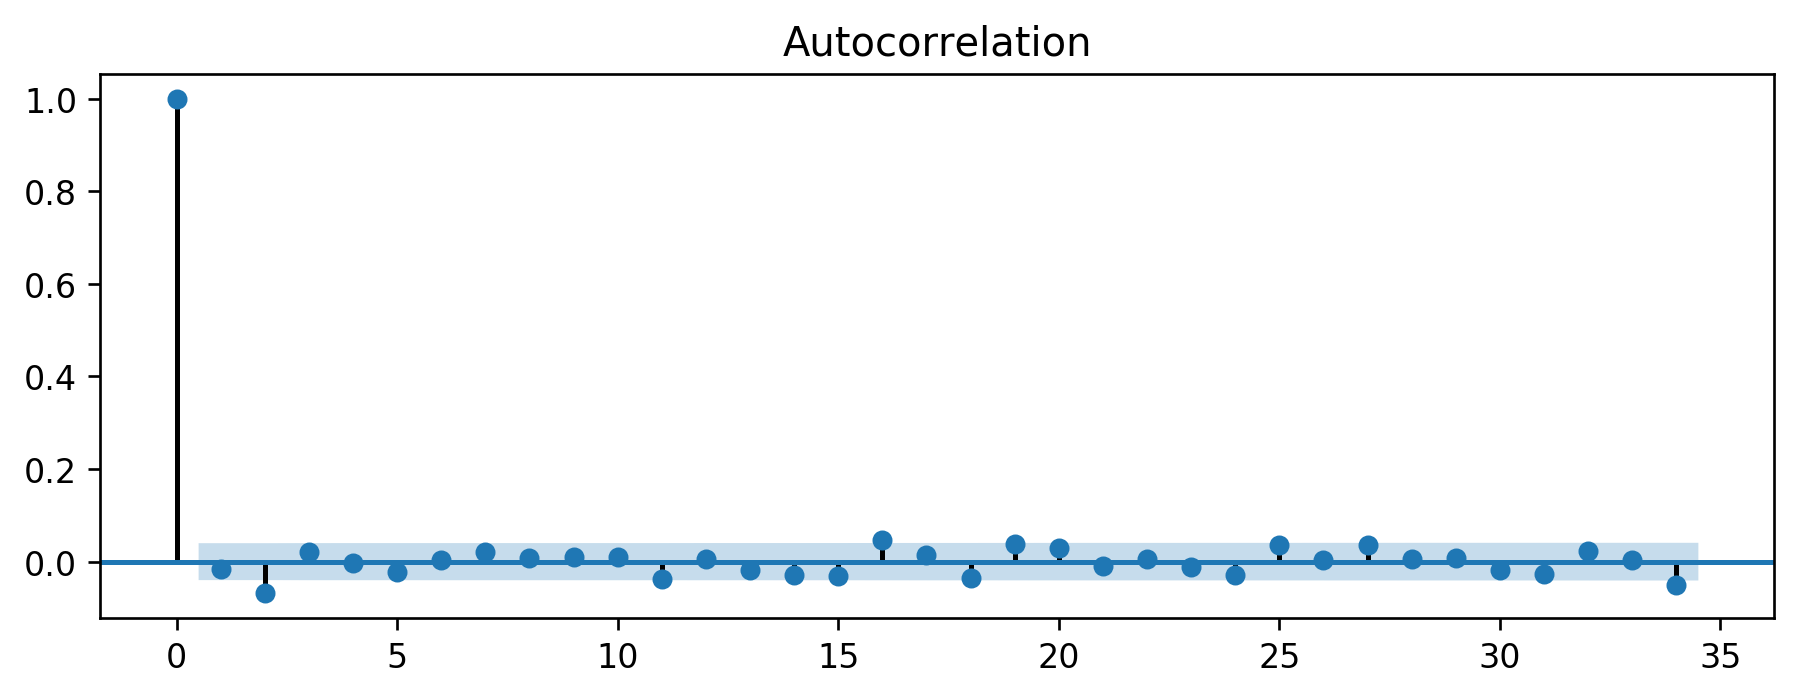

In [138]:
acf = plot_acf(train_log.diff().dropna())

take q as 0

In [140]:
nmodel = ARIMA(train_log, order=(2,1,0))
nmodel_fit = nmodel.fit(disp=0)
print(nmodel_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2414
Model:                 ARIMA(2, 1, 0)   Log Likelihood                5340.074
Method:                       css-mle   S.D. of innovations              0.026
Date:                Mon, 03 Aug 2020   AIC                         -10672.149
Time:                        01:52:35   BIC                         -10648.992
Sample:                             1   HQIC                        -10663.727
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.000      1.997      0.046    1.85e-05       0.002
ar.L1.D.Close    -0.0159      0.020     -0.781      0.435      -0.056       0.024
ar.L2.D.Close    -0.0679      0.020     

Note you have to tune p>|z| to be less than o.o5 to get an ideal statioinarity

In [170]:
nmodel = ARIMA(train_log, order=(1,1,1))
nmodel_fit = nmodel.fit(disp=-1)
print(nmodel_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2414
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5336.302
Method:                       css-mle   S.D. of innovations              0.027
Date:                Mon, 03 Aug 2020   AIC                         -10664.604
Time:                        02:30:11   BIC                         -10641.448
Sample:                             1   HQIC                        -10656.182
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.000      2.007      0.045    2.34e-05       0.002
ar.L1.D.Close     0.6022      0.224      2.683      0.007       0.162       1.042
ma.L1.D.Close    -0.6352      0.217     

voila!!! great our p-value is now less than 0.5 tbh you only need the value of ar.l11.d.close and ma.l1.d.close to be less than 0.05

plot residual to see if there are no patterns i.e check for constant mean and variance

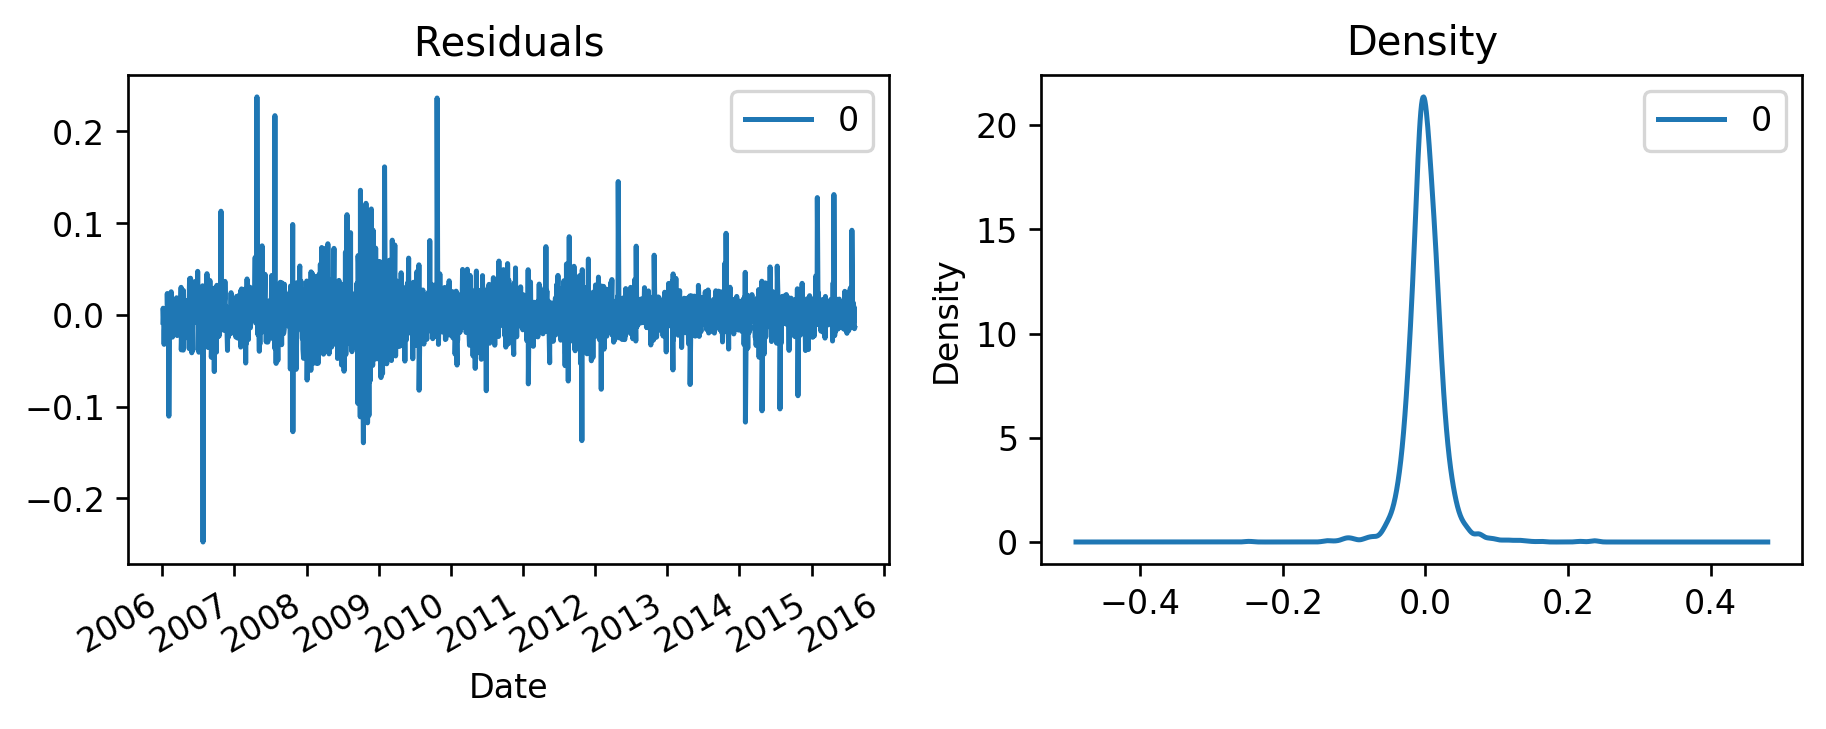

In [143]:
residuals = pd.DataFrame(nmodel_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Great. Now we can predict our model

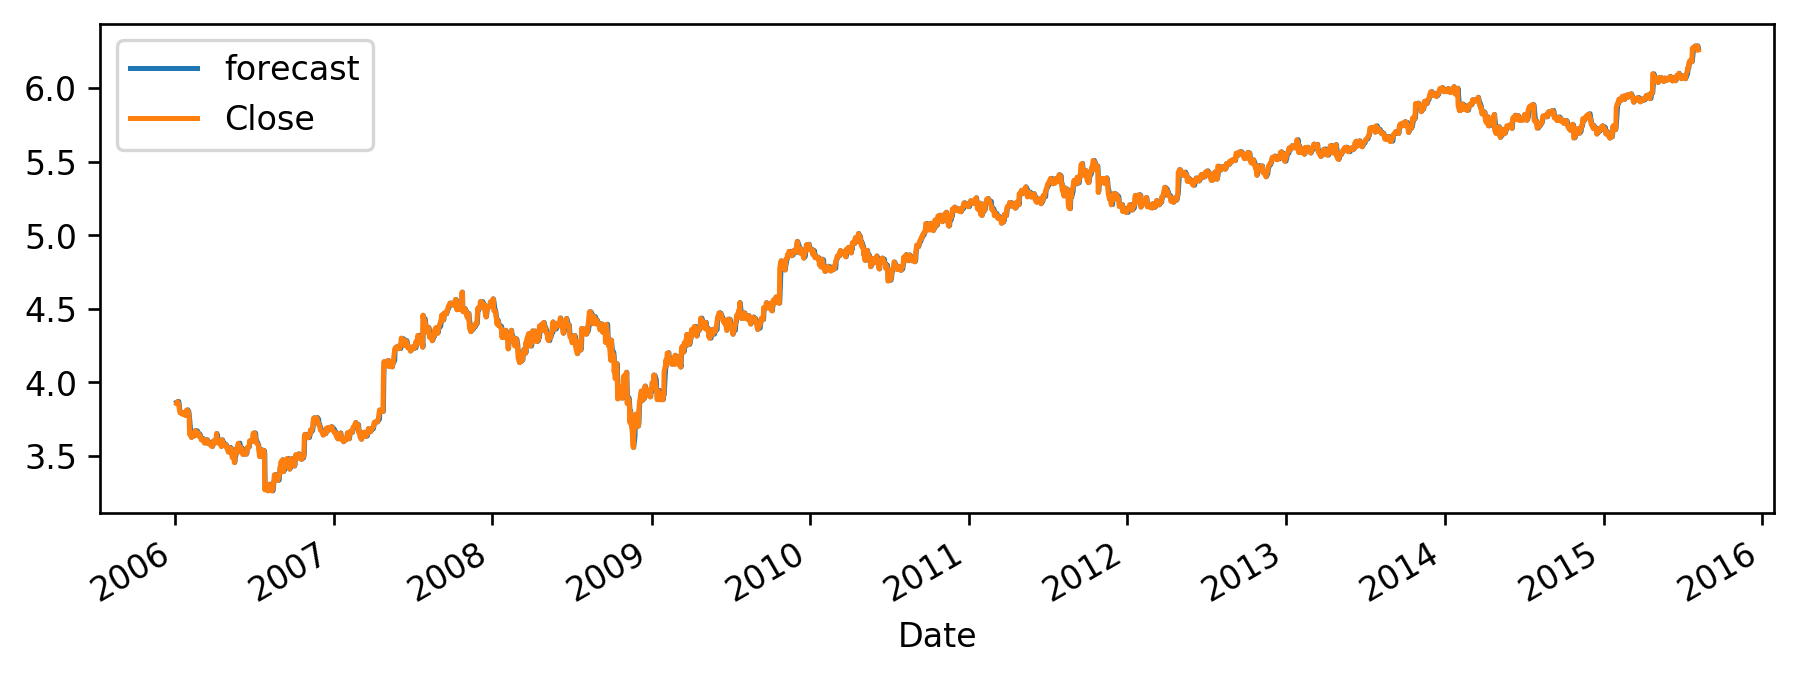

In [154]:
nmodel_fit.plot_predict(dynamic=False)
plt.show()

In [172]:
len(fitted)

3

In [171]:
fitted = nmodel_fit.forecast(len(valid_log))
fitted_series = pd.Series(fitted, index=valid_log.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_log, label='training')
plt.plot(valid_log, label='actual')
plt.plot(fitted_series, label='forecast')

ValueError: Length of passed values is 3, index implies 604.

In [167]:
valid_log.shape, train_log.shape

((604,), (2415,))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [155]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [159]:
forecast_accuracy(fitted, valid_log)

ValueError: could not broadcast input array from shape (604,2) into shape (604)

Try using different data before modeling, the codes above are correct

### Auto Arima

In [174]:
import pmdarima as pm

In [192]:
model = pm.auto_arima(train_log, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=14198.562, BIC=14221.719, Time=0.947 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=14214.259, BIC=14225.837, Time=0.076 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=14197.429, BIC=14214.796, Time=0.274 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=14197.604, BIC=14214.971, Time=0.399 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=14216.813, BIC=14222.602, Time=0.054 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=14199.382, BIC=14222.538, Time=0.554 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=14201.411, BIC=14230.356, Time=1.205 seconds
Total fit time: 3.905 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2415
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5334.236
Date:                Mon, 03 Au

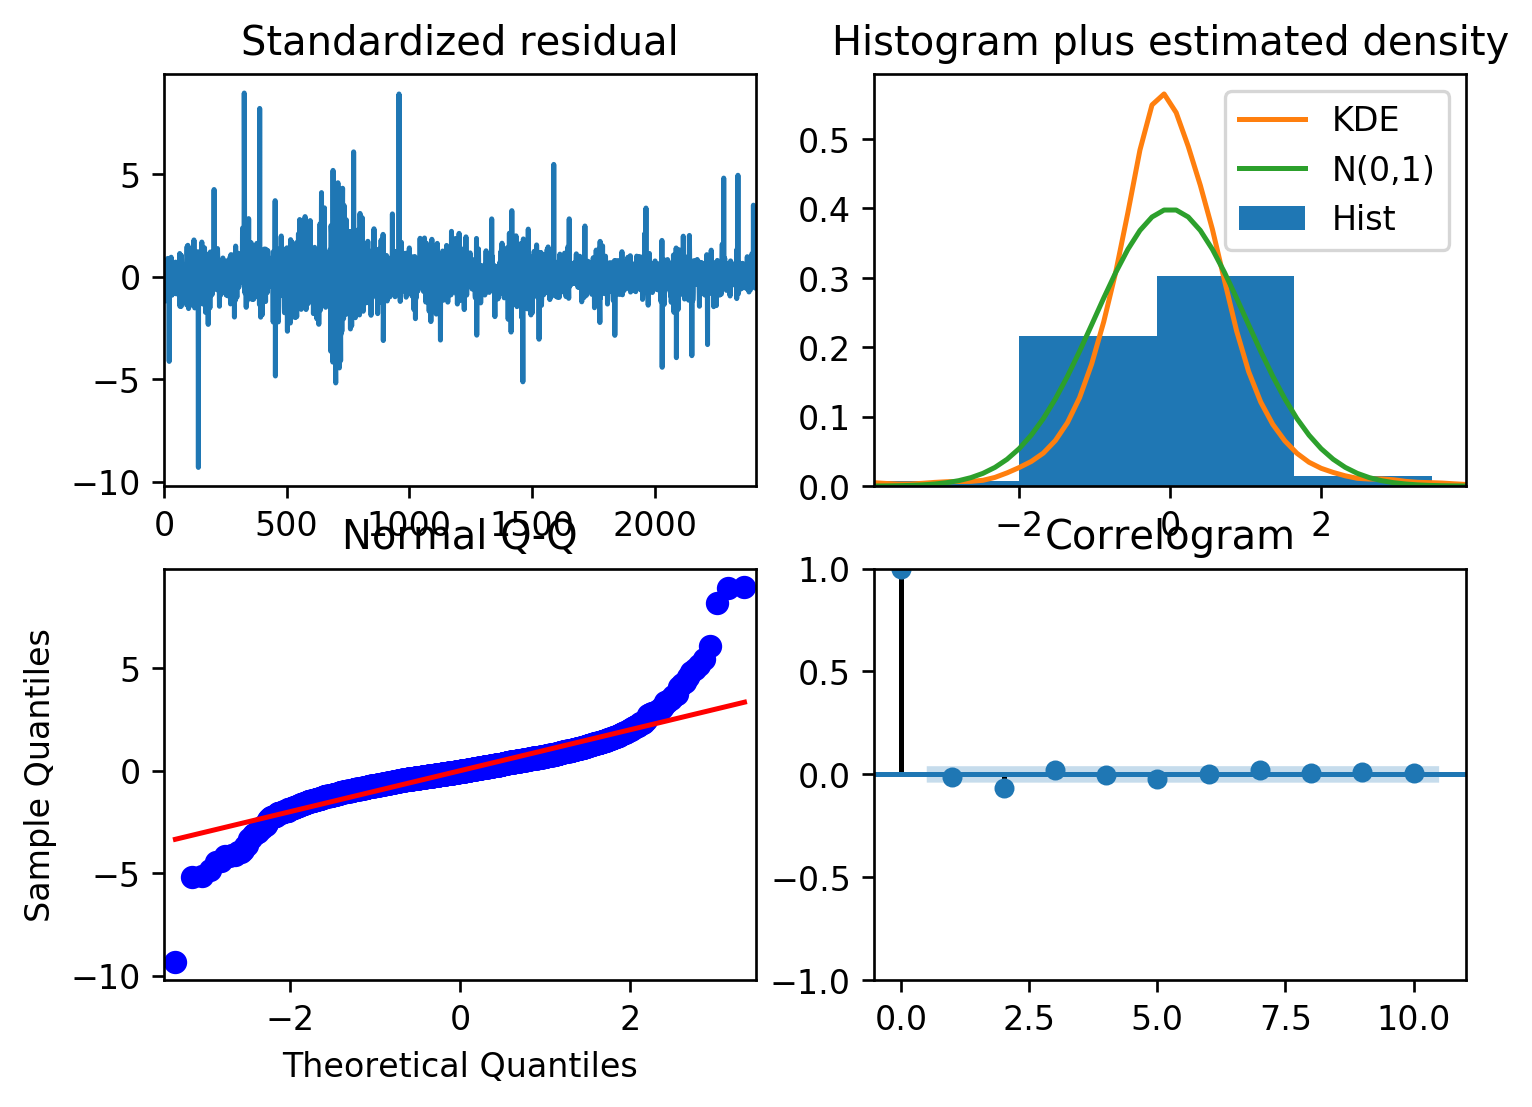

In [193]:
# checking residdual plot
model.plot_diagnostics(figsize=(7,5))
plt.show()

as expected no cause for alarm auto_arima has gone through the stages of hell of arima.

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: density plot suggesting normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [191]:
arima

(array([6.25984735, 6.26084007, 6.2618328 , 6.26282553, 6.26381825,
        6.26481098, 6.2658037 , 6.26679643, 6.26778916, 6.26878188,
        6.26977461, 6.27076733, 6.27176006, 6.27275279, 6.27374551,
        6.27473824, 6.27573096, 6.27672369, 6.27771642, 6.27870914,
        6.27970187, 6.28069459, 6.28168732, 6.28268005, 6.28367277,
        6.2846655 , 6.28565822, 6.28665095, 6.28764367, 6.2886364 ,
        6.28962913, 6.29062185, 6.29161458, 6.2926073 , 6.29360003,
        6.29459276, 6.29558548, 6.29657821, 6.29757093, 6.29856366,
        6.29955639, 6.30054911, 6.30154184, 6.30253456, 6.30352729,
        6.30452002, 6.30551274, 6.30650547, 6.30749819, 6.30849092,
        6.30948365, 6.31047637, 6.3114691 , 6.31246182, 6.31345455,
        6.31444728, 6.31544   , 6.31643273]),
 array([[6.20780622, 6.31188848],
        [6.1872428 , 6.33443734],
        [6.17169492, 6.35197068],
        [6.15874327, 6.36690778],
        [6.14745075, 6.38018575],
        [6.13733677, 6.39228519],
  

In [194]:
n_periods = 58
arima = auto_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_arima = np.arange(len(valid_log), len(valid_log)+n_periods)

arima_series = pd.Series(arima, index=index_of_arima)
plt.plot(train_log)
plt.plot(arima_series, color='darkgreen')

plt.show()

ValueError: Length of passed values is 2, index implies 58.

### SARIMA

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

Here’s some practical advice on building SARIMA model:

As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.


#Please Review the sentences before deploying them they are'nt yours

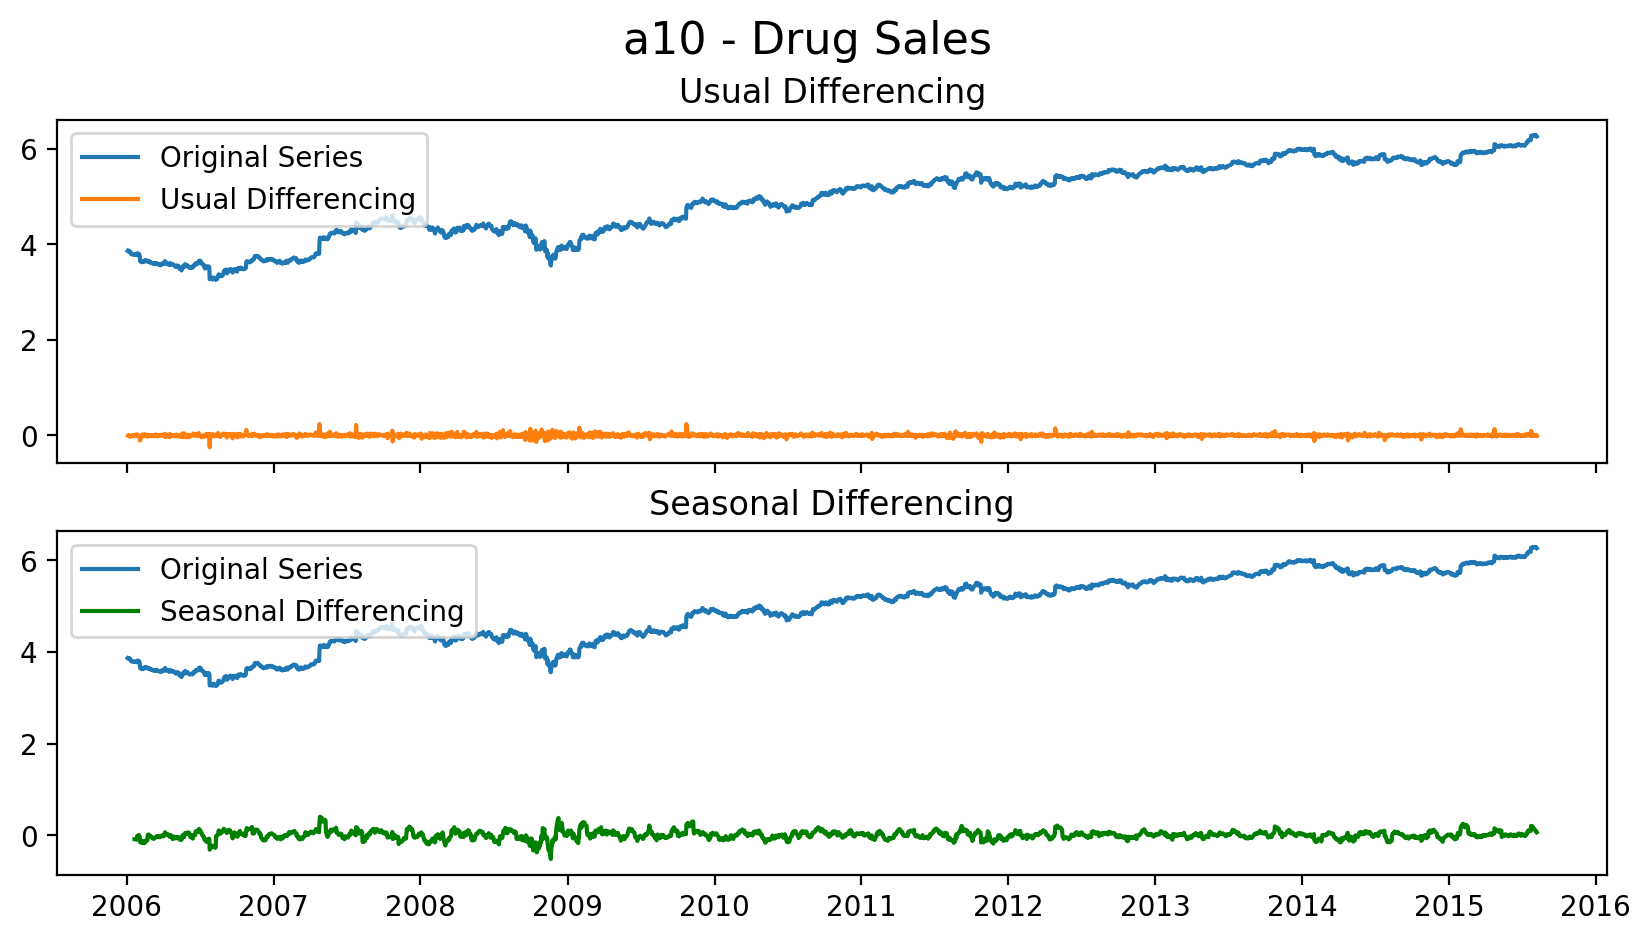

In [195]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(train_log, label='Original Series')
axes[0].plot(train_log.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Diffrencing
axes[1].plot(train_log, label='Original Series')
axes[1].plot(train_log.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

Let’s build the SARIMA model using pmdarima‘s auto_arima(). To do that, you need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.



In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train_log, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=-10559.496, BIC=-10530.573, Time=23.074 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=-4919.563, BIC=-4907.995, Time=0.809 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=-9661.097, BIC=-9637.959, Time=15.377 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=-7072.383, BIC=-7049.245, Time=12.707 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=-4874.602, BIC=-4868.817, Time=0.903 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=-9078.252, BIC=-9055.114, Time=1.907 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=-10564.329, BIC=-10529.622, Time=42.429 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=-10556.793, BIC=-10522.086, Time=92.301 seconds
Near non-invertible roots 

### ...to continue check out this [page](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

In [173]:
import statsmodels.api as sm
y_hat_avg = valid_log.copy()
fit9 = sm.tsa.statespace.SARIMAX(train_log, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit9.predict(start='2014-6-25', end='2014-9-25', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Trian')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

KeyError: 'Count'

<Figure size 1920x960 with 0 Axes>

### Prophet

In [90]:
from fbprophet import Prophet
from scipy import stats
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'

In [91]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

In [92]:
fp_df = pd.DataFrame({'ds':data.index,
                     'y':data.Close})
fp_df.index = range(0,len(fp_df))
fp_df.head()

ds      y
0 2006-01-03  47.58
1 2006-01-04  47.25
2 2006-01-05  47.65
3 2006-01-06  47.87
4 2006-01-09  47.08

In [93]:
fp_train = fp_df[:int(0.8*(len(fp_df)))]
fp_valid = fp_df[int(0.8*(len(fp_df))):]
fp_train.shape, fp_valid.shape, fp_df.shape

((2415, 2), (604, 2), (3019, 2))

In [94]:
test.shape

(43, 4)

In [95]:
model = Prophet(daily_seasonality=True)
model.fit(fp_df)

In [96]:
pred = model.make_future_dataframe(periods=365)
forecast = model.predict(pred)
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2006-01-03  47.585425   17.595322   82.322626    47.585425    47.585425   
1 2006-01-04  47.515806   17.108576   83.102662    47.515806    47.515806   
2 2006-01-05  47.446187   18.081900   85.294151    47.446187    47.446187   
3 2006-01-06  47.376568   15.437782   80.319219    47.376568    47.376568   
4 2006-01-09  47.167711   13.998115   77.192089    47.167711    47.167711   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0        2.847491              2.847491              2.847491  0.831965   
1        2.088060              2.088060              2.088060  0.831965   
2        1.890199              1.890199              1.890199  0.831965   
3        1.131393              1.131393              1.131393  0.831965   
4       -0.515326             -0.515326             -0.515326  0.831965   

   daily_lower  daily_upper    weekly  weekly_lower  weekly_upper    yearly  \
0     0.831965     0.831965 -0.023082     -0.023082     -0.023082  2.038607   
1     0.831965     0.831965 -0.151774     -0.151774     -0.151774  1.407868   
2     0.831965     0.831965  0.257759      0.257759      0.257759  0.800475   
3     0.831965     0.831965  0.082248      0.082248      0.082248  0.217180   
4     0.831965     0.831965  0.042839      0.042839      0.042839 -1.390131   

   yearly_lower  yearly_upper  multiplicative_terms  \
0      2.038607      2.038607                   0.0   
1      1.407868      1.407868                   0.0   
2      0.800475      0.800475                   0.0   
3      0.217180      0.217180                   0.0   
4     -1.390131     -1.390131                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  50.432916  
1                         0.0                         0.0  49.603866  
2                         0.0                         0.0  49.336386  
3                         0.0                         0.0  48.507961  
4                         0.0                         0.0  46.652385

In [97]:
forecast.tail(10)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
3374 2018-12-20  1331.431306  1288.475620  1405.268910  1286.949276   
3375 2018-12-21  1332.115475  1284.609854  1405.994792  1287.322582   
3376 2018-12-22  1332.799644  1286.564446  1406.933077  1287.671046   
3377 2018-12-23  1333.483813  1289.535613  1403.846252  1288.019511   
3378 2018-12-24  1334.167982  1286.056258  1404.239953  1288.376279   
3379 2018-12-25  1334.852150  1289.768592  1406.568194  1288.749044   
3380 2018-12-26  1335.536319  1285.414240  1405.219223  1289.121809   
3381 2018-12-27  1336.220488  1285.654964  1408.534253  1289.494575   
3382 2018-12-28  1336.904657  1284.473890  1407.117083  1289.945682   
3383 2018-12-29  1337.588826  1288.584630  1407.053432  1290.485588   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
3374  1383.706883       12.779509             12.779509             12.779509   
3375  1384.611291       12.027727             12.027727             12.027727   
3376  1385.515698       11.230666             11.230666             11.230666   
3377  1386.420106       10.589469             10.589469             10.589469   
3378  1387.288199       10.069325             10.069325             10.069325   
3379  1388.156184        9.315559              9.315559              9.315559   
3380  1389.024169        8.483282              8.483282              8.483282   
3381  1389.761342        8.178702              8.178702              8.178702   
3382  1390.120929        7.283739              7.283739              7.283739   
3383  1391.092979        6.377744              6.377744              6.377744   

         daily  daily_lower  daily_upper    weekly  weekly_lower  \
3374  0.831965     0.831965     0.831965  0.257759      0.257759   
3375  0.831965     0.831965     0.831965  0.082248      0.082248   
3376  0.831965     0.831965     0.831965 -0.103995     -0.103995   
3377  0.831965     0.831965     0.831965 -0.103995     -0.103995   
3378  0.831965     0.831965     0.831965  0.042839      0.042839   
3379  0.831965     0.831965     0.831965 -0.023082     -0.023082   
3380  0.831965     0.831965     0.831965 -0.151774     -0.151774   
3381  0.831965     0.831965     0.831965  0.257759      0.257759   
3382  0.831965     0.831965     0.831965  0.082248      0.082248   
3383  0.831965     0.831965     0.831965 -0.103995     -0.103995   

      weekly_upper     yearly  yearly_lower  yearly_upper  \
3374      0.257759  11.689785     11.689785     11.689785   
3375      0.082248  11.113514     11.113514     11.113514   
3376     -0.103995  10.502696     10.502696     10.502696   
3377     -0.103995   9.861499      9.861499      9.861499   
3378      0.042839   9.194520      9.194520      9.194520   
3379     -0.023082   8.506676      8.506676      8.506676   
3380     -0.151774   7.803090      7.803090      7.803090   
3381      0.257759   7.088978      7.088978      7.088978   
3382      0.082248   6.369526      6.369526      6.369526   
3383     -0.103995   5.649774      5.649774      5.649774   

      multiplicative_terms  multiplicative_terms_lower  \
3374                   0.0                         0.0   
3375                   0.0                         0.0   
3376                   0.0                         0.0   
3377                   0.0                         0.0   
3378                   0.0                         0.0   
3379                   0.0                         0.0   
3380                   0.0                         0.0   
3381                   0.0                         0.0   
3382                   0.0                         0.0   
3383                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
3374                         0.0  1344.210815  
3375                         0.0  1344.143202  
3376                         0.0  1344.030310  
3377                         0.0  1344.073282  
3378                         0.0  1344.

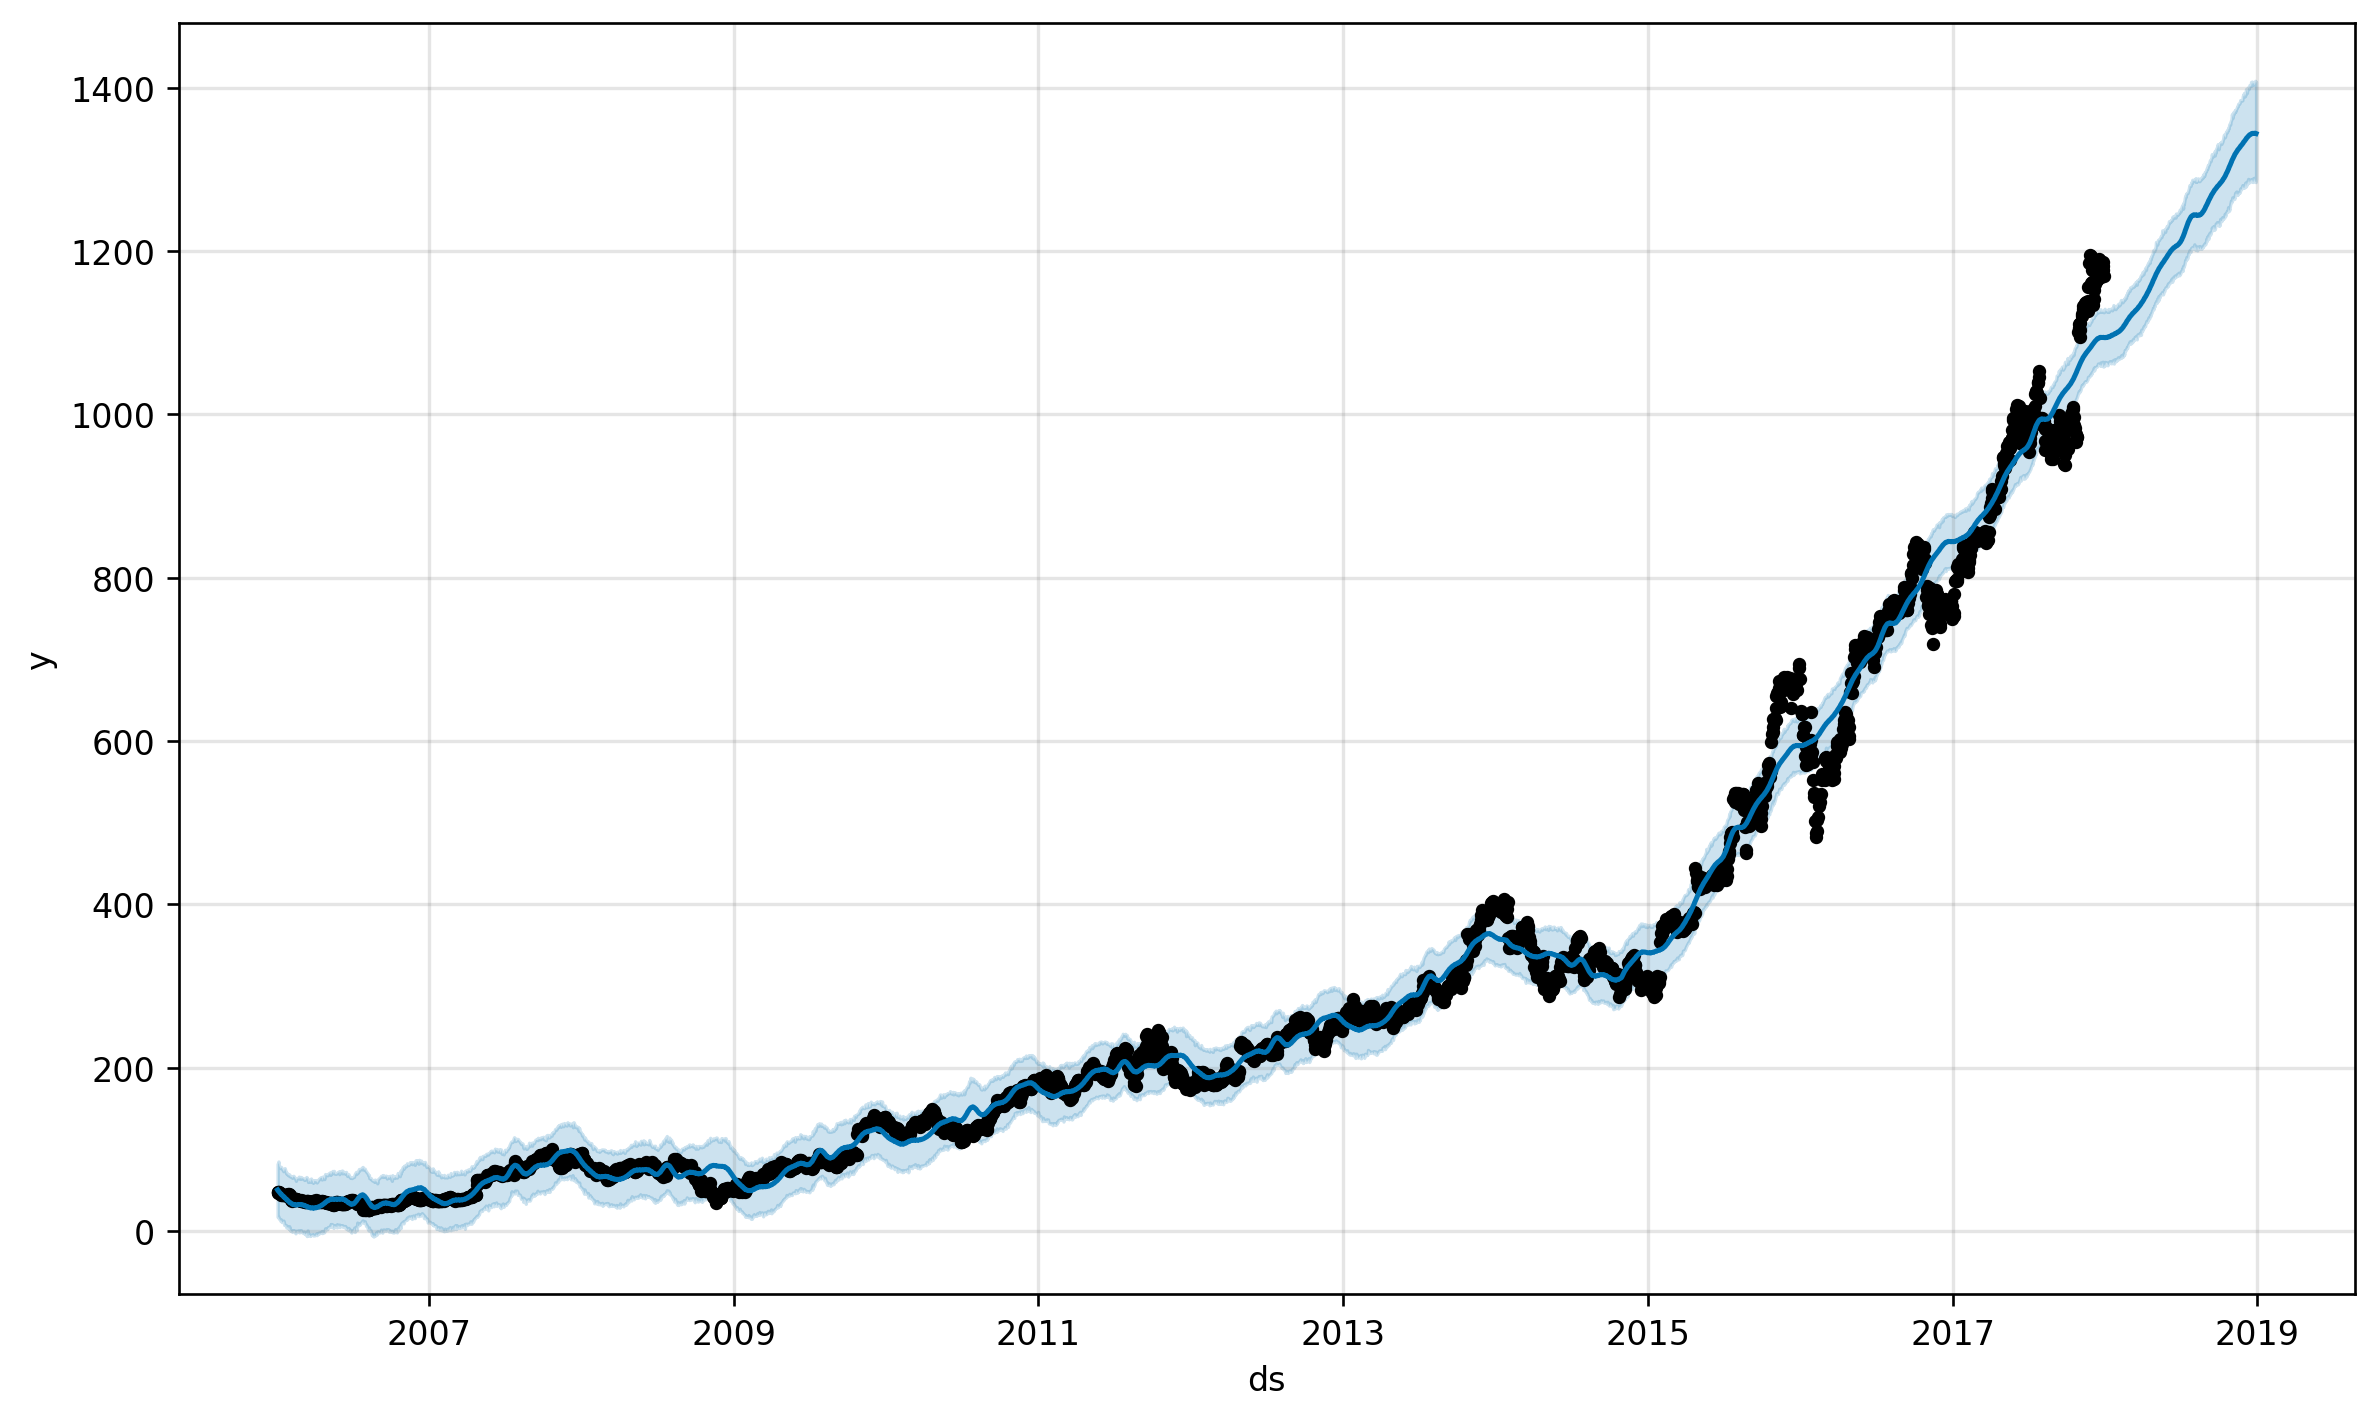

In [98]:
model.plot(forecast);

As expected the trend is suppose to grow since the amazzon stock price grows every year.

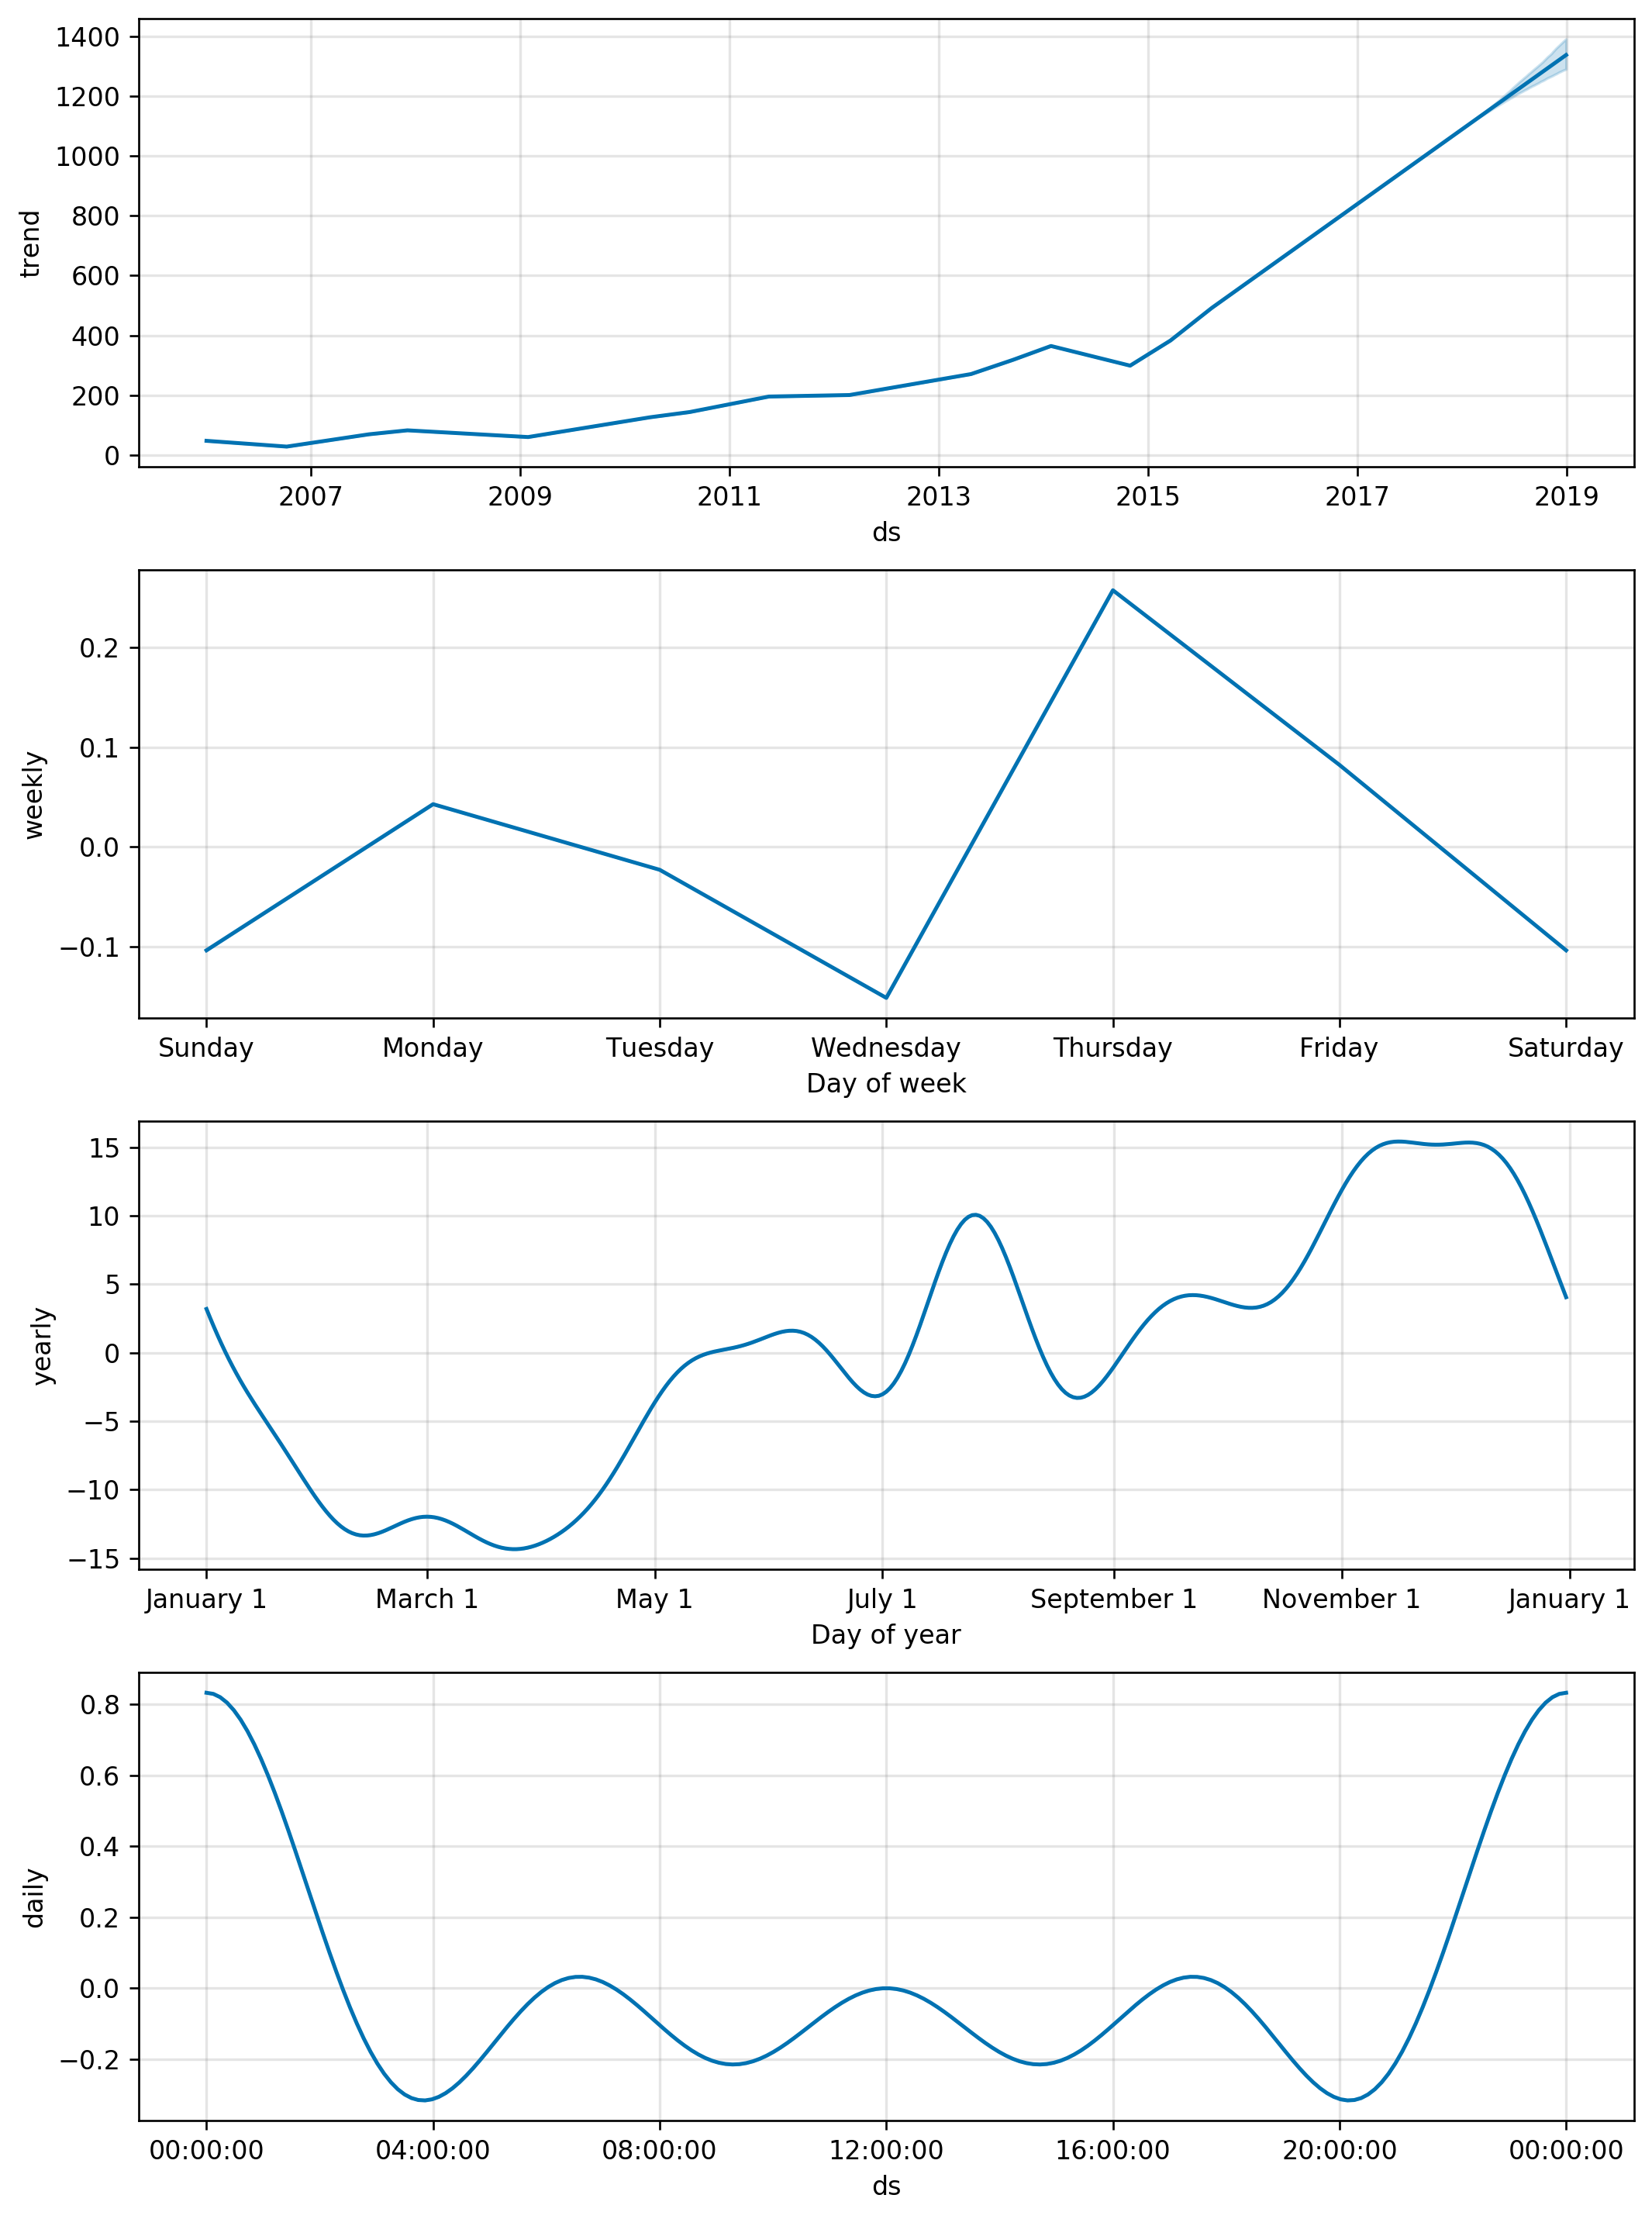

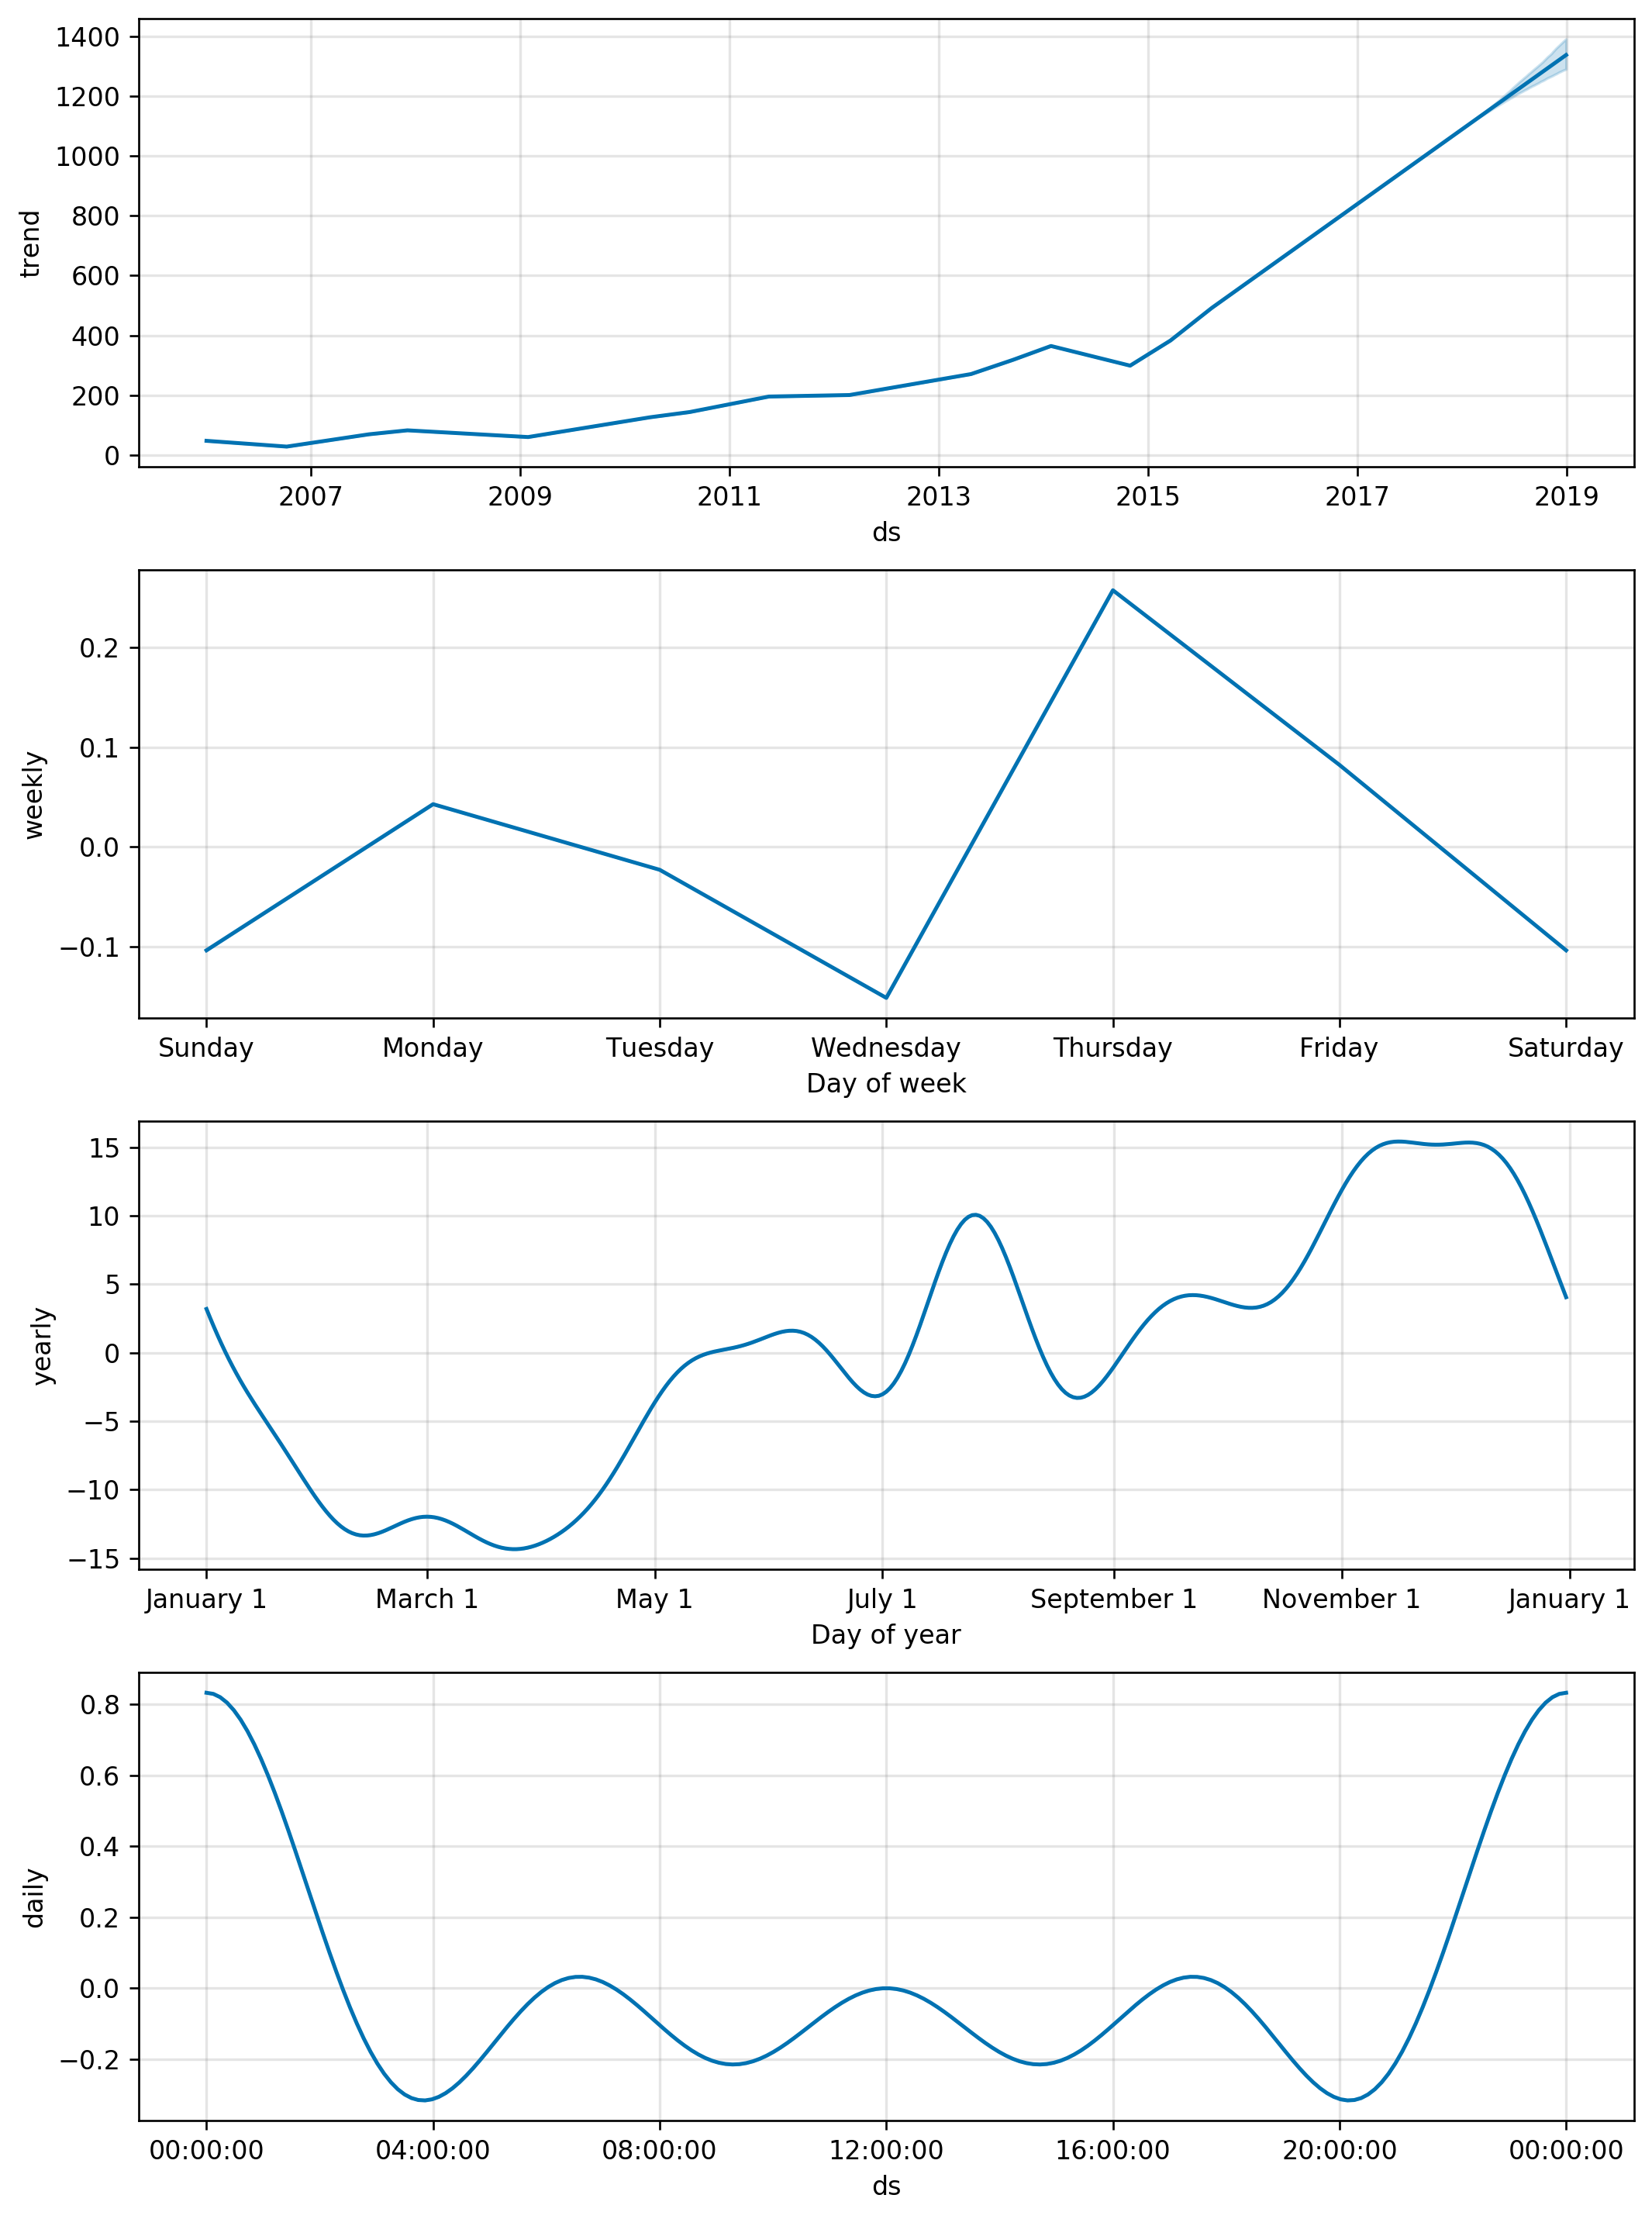

In [99]:
model.plot_components(forecast)

In [100]:
prophet = pd.DataFrame({'yhat':forecast.yhat,
                        'yhat_lower':forecast.yhat_lower,
                        'yhat_upper':forecast.yhat_upper})
prophet.index = forecast.ds
prophet.head()

yhat  yhat_lower  yhat_upper
ds                                           
2006-01-03  50.432916   17.595322   82.322626
2006-01-04  49.603866   17.108576   83.102662
2006-01-05  49.336386   18.081900   85.294151
2006-01-06  48.507961   15.437782   80.319219
2006-01-09  46.652385   13.998115   77.192089

In [101]:
prophet.tail()

yhat   yhat_lower   yhat_upper
ds                                               
2018-12-25  1344.167709  1289.768592  1406.568194
2018-12-26  1344.019601  1285.414240  1405.219223
2018-12-27  1344.399190  1285.654964  1408.534253
2018-12-28  1344.188396  1284.473890  1407.117083
2018-12-29  1343.966571  1288.584630  1407.053432

### Using Linear Regression Model

In [102]:
ldata = data.copy()

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# using time sereis cross validation set 5 folds
tscv = TimeSeriesSplit(n_splits=5)

In [105]:
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_val = X.iloc[test_index:]
    y_val = y.iloc[test_index:]
    
    return X_train, X_val, y_train, y_val

In [106]:
y = data.dropna().Close
X = data.dropna().drop(['Close'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, X_val, y_train, y_val = timeseries_train_test_split(X, y, test_size=0.2)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2415, 10), (604, 10), (2415,), (604,))

In [107]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
def plotmodelResults(model, X_train, X_val, plot_intervals=False, plot_anomalies=False):

    prediction = model.predict(X_val)
    plt.figure(figsize=(20,10))
    plt.plot(prediction, "g", label='prediction', linewidth=2.0)
    plt.plot(y_val.values, label='actual', linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train,cv=tscv,
                            scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label='Upper bond / Lower bond', alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_val))
            anomalies[y_val<lower] = y_val[y_val<lower]
            anomalies[y_val>upper] = y_val[y_val>upper]
            plt.plot(anomalies, 'o', markersize=10, label='Anomalies')
        
        error = mean_absolute_percentage_error(prediction, y_val)
        plt.title("Mean absolute percentage error {0:.2f}%".format(error))
        plt.legend(loc='best')
        plt.tight_layout()
        plt.grid(True);

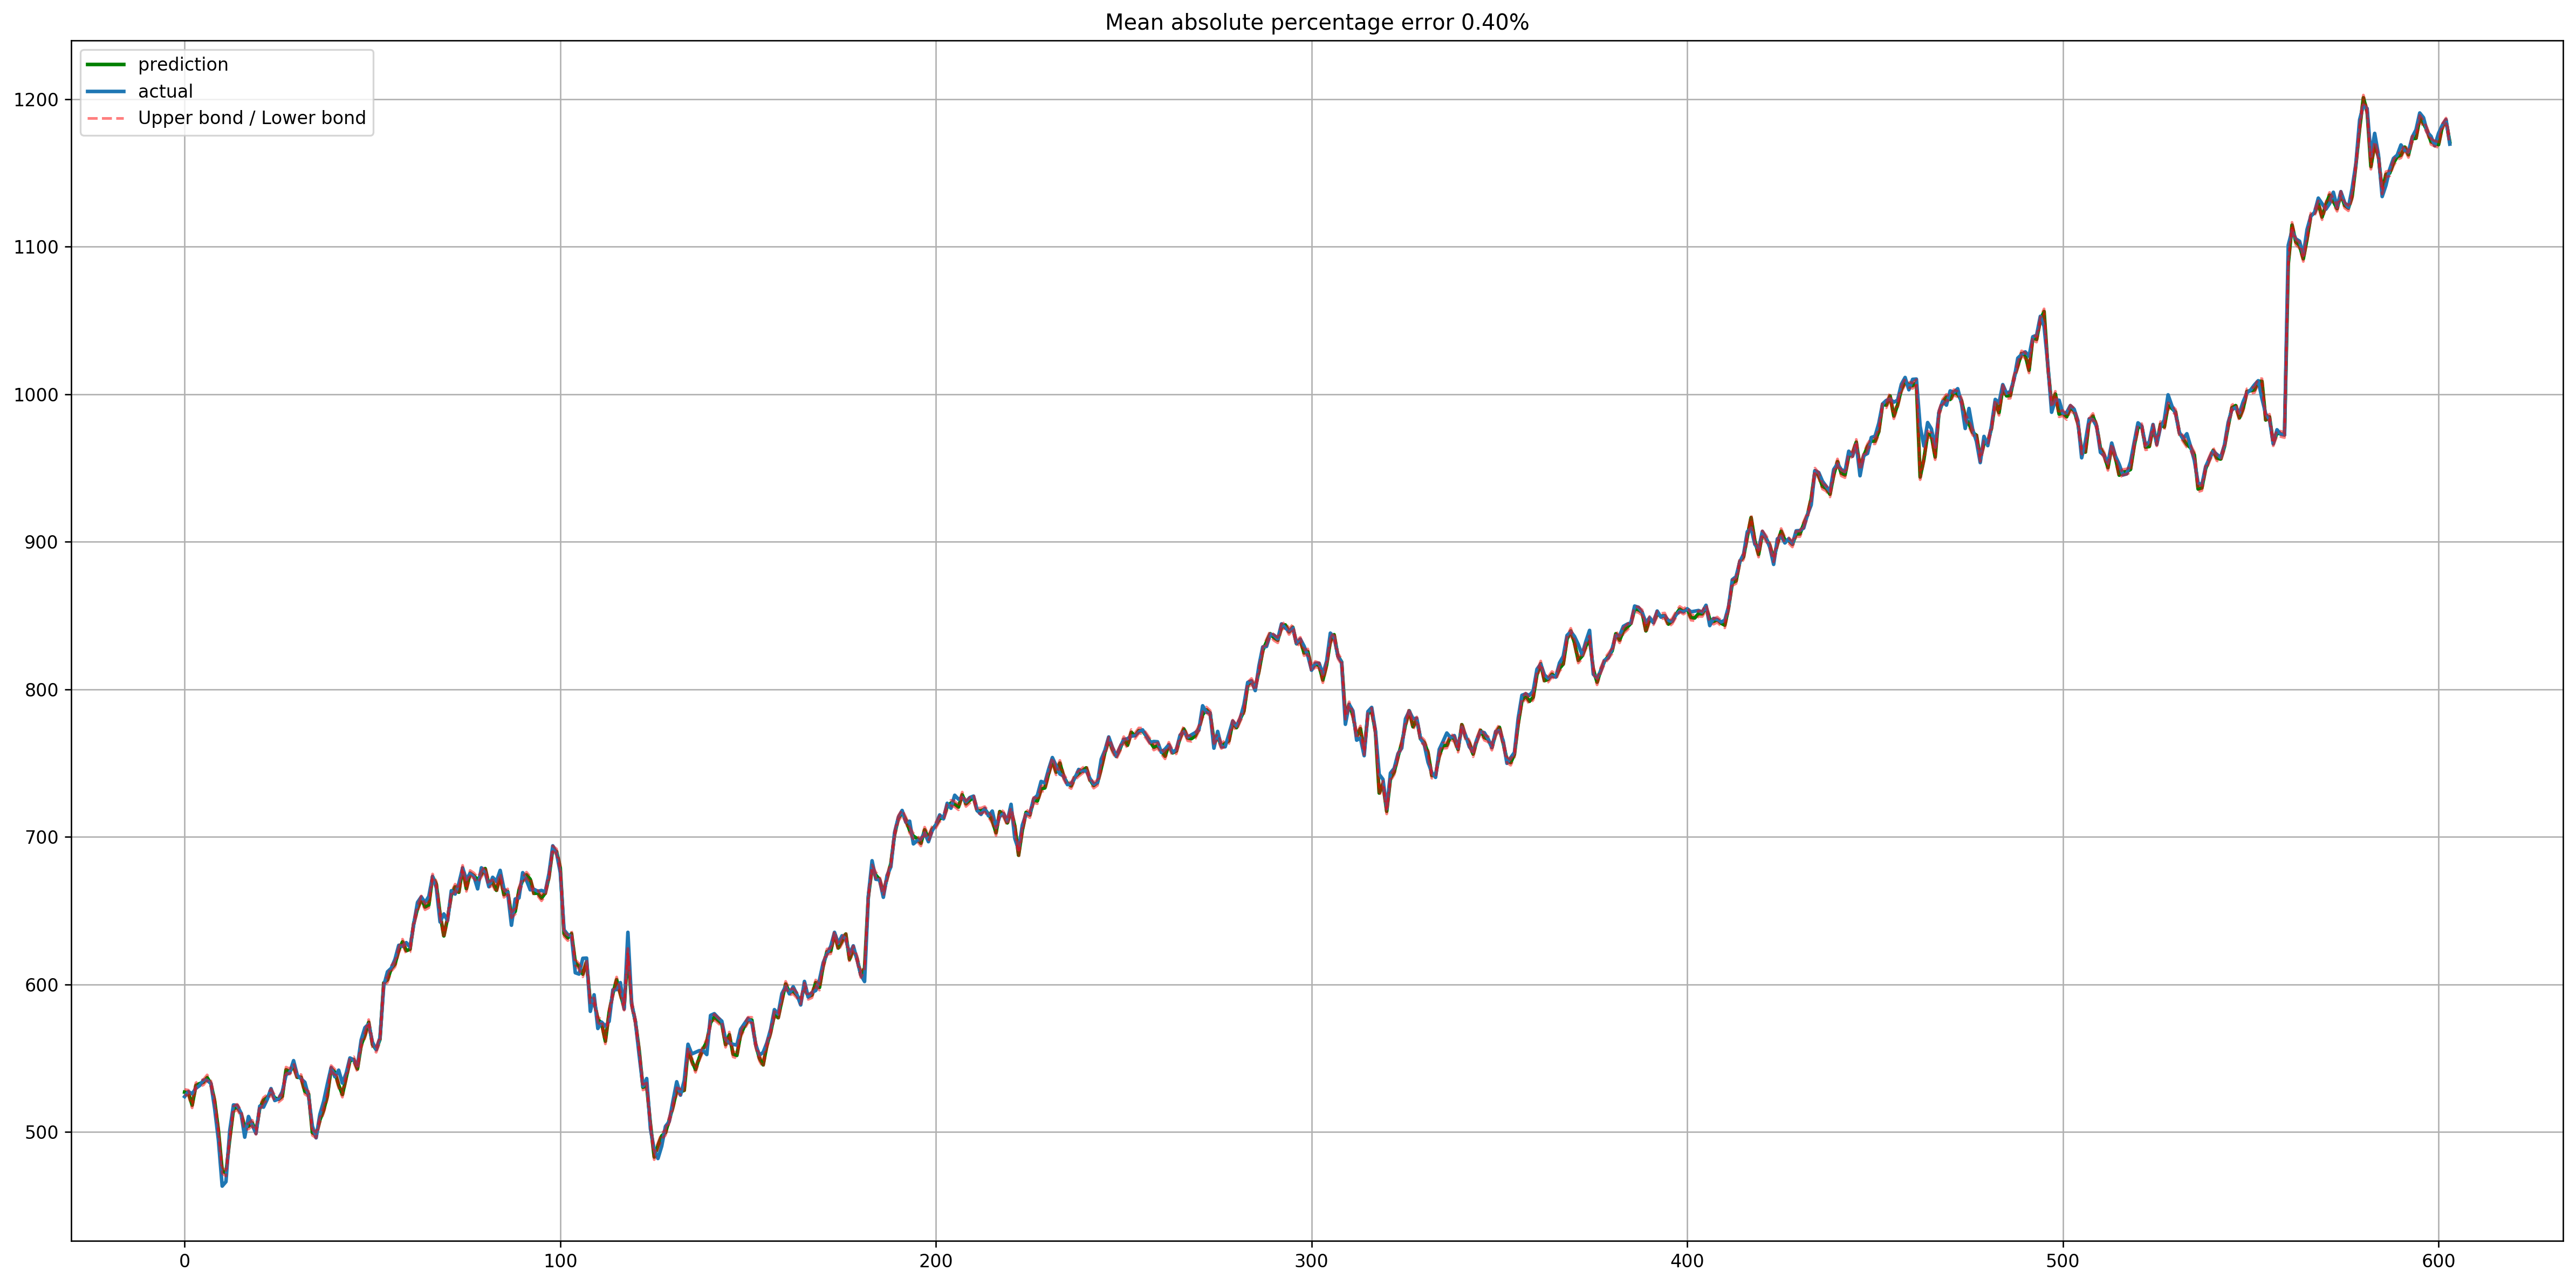

In [109]:
plotmodelResults(lr, X_train, X_val, plot_intervals=True)

In [110]:
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

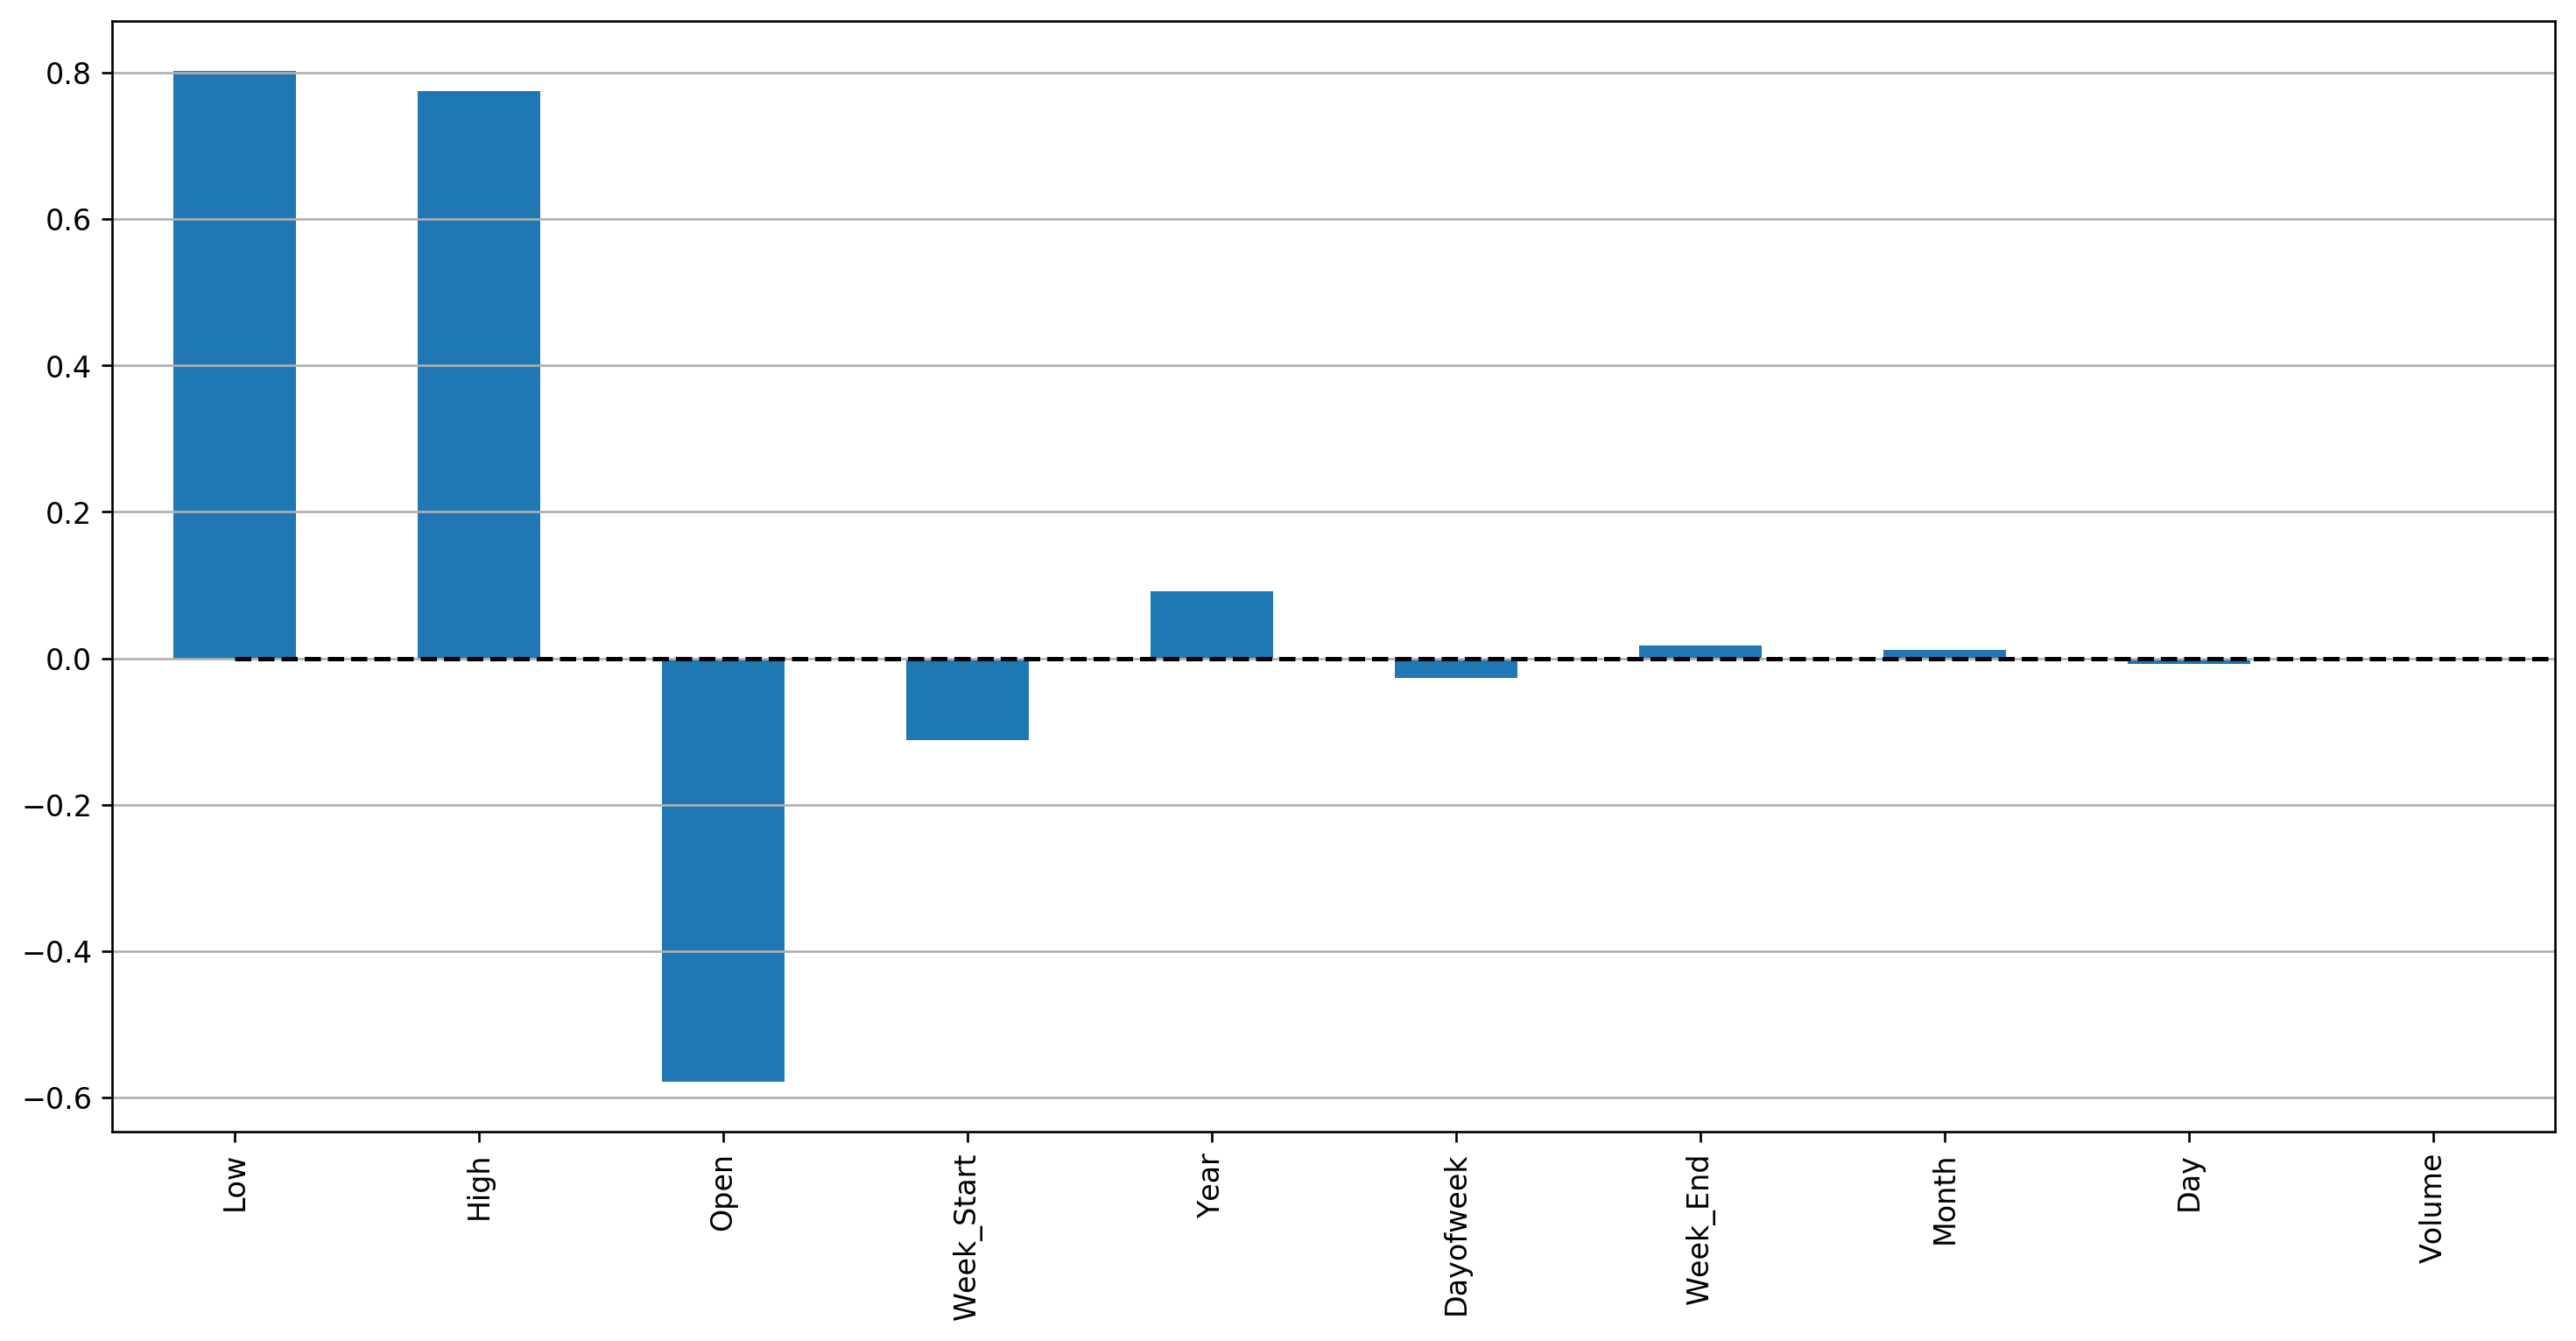

In [111]:
plotCoefficients(lr)

In [113]:
prediction = lr.predict(X_val)
error = mean_absolute_percentage_error(prediction, y_val)
error

0.3994987216867981